# Problem Statement

### Task 1 : Prepare a complete data analysis report on the given data
### Task 2: Explore football skills and cluster football players baesd on their attributes
### Task: Explore the data and attempt all the below asked in a step by step manner:

* Prepare a rank ordered list of top 10 countries with most players.Which countries are producing the most footballers that play at this level?
* Plot the distribution of overall rating vs.age of players. Interpet what is the age after which a player stops imporving?
* Which type of offensive players tend to get paid the most: the striker, the right-winger, or the left-winger?

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/PRCP-1004-Fifa20.zip')

In [3]:
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

# Doamin Analysis

* Name: Name of the player.
* Age: Age of the player.
* Height: Height of the player in inches(transformed to centimeters in preprocessing).
* Overall: General performance quality and value of the player representring the key positional skills and international reputation rated between 1-99.
Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature.The aim of the project is not basically sort and categorize the players using their overall talent and international repution, but to cluster them based on using their whole skillset.
* Potential: Maximum Overall rating expected to be reached by a player in the top of this career rated between 1-99
* PreferredFoot: Right or Left.Label encoder is applied as 0 for left and 1 for right.
* WeakFoot: Represents how well a player uses his weak foot(e.g.left for righties) rated between 1 to 5.
* WorkRate: Degree of the effort the player puts in terms of attack of and defense rated as low,medium and high.This feature is divided into two new features as AttackWorkRate and DefenseWorkRate.Besides,label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
* Postion: Position of the players on the pitch which determines their roles and responsiblities in the team.Forward positons in the football and FIFA 19 can be grouped as striker(ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main reponsibilities are attacking and scoring goals, that's why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls form the others and score assists to the others or goals. In addition to the skills expecteds form strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expections. Wingers are positioned near the touchliness to create chances for strickers and forwards form the right and left side of the field breakthrough and crosses and to score goals. Thery are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages.
* ST: Positional skill. Player's general ability when playing in ST position rated between 1-99.
* RS: Positional skill. Player's general abilitly when playing in RS position rated between 1-99.
* LS: Positional skill.Player's general ablity when playing in CF position rated between 1-99.
* CF: Positional skill. Players's general ability when playing in CF position rated between 1-99.
* RF: Positional skill. Player's general ability when playing in RF position rated between 1-99.
* LF: Positional skill. Player's general ability when playing in LF position rated between 1-99.
* RW: Positional skill. Player's general ability when playing in RW position rated between 1-99.
* LW: Positional skill. Player's general ability when playing in LW position rated between 1-99.
* Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass form wings to center.
* Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
* HeaadingAccuracy: Player's accuracy to pass or shoot by using his head rated between 1-99.
* ShortPassing: Player's accuracy for passes rated between 1-99.
* LongPassing: Player's accuracy for long passes rated between 1-99.
* Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.
* SprintSpeed: Speed rate of the player rated between 1-99.
* Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
*FKAccuracy: Player's accuracy to score free kick goals rated between 1-99.
* BallControl: Player's ability to control the ball rated between 1-99.
* Balance: Player's ability to remain steady while running, carrying and controlling the ball rated between 1-99.
* ShotPower: Player's strength level of shooting the ball rated between 1-99.
* Jumping: Player's jumping skill rated between 1-99.
* Penalities: Player's accuracy to score goals from penalty rated between 1-99.
* Strength: Physical strength of the player rated between 1-99.
* Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99.
* Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
* Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
* Positioning: Player's ability to place himslef in the right position to receive the ball or score goals rated between 1-99.
* Vision: Player's mental awareness about the other player's in the team for passing rated between 1-99.
* Volleys: Player's accuracy of shoots form long distance rated between 1-99.
* Stamina: Player's ability to sustain his stamina level during the match rated between 1-99. Player's with lower stamina get tried fast.
* Composure: Player's ability to control his calmness and frustration during the match rated between 1-99.
* Curve: Player's ability to curve the ball while passing or shooting rated between 1-99.
* Interceptions: Player's ability to intercept the ball while opposite team's players are passing rated between 1-99. It is a defensive skill.
* StandingTackle: Player's ability to perform tackle (take the ball from the opposite player) While standing rated between 1-99. It is a defensive skill.
* SlidingTackle: Player's ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
* Marking: Player's ability to apply strategies to prevent opposing team form taking the ball between 1-99. It is a defensive skill.

# Basic Checks

In [4]:
data.head() # first five rows of the data

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [5]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
data.shape

(18278, 104)

### Observation:
In this dataset we have 18277 rows and 104 columns.

In [8]:
def find_missing(dataframe):
  missing_data_cols=dataframe.columns[dataframe.isnull().sum()>0]
  null=dataframe.isnull().sum()
  null_data=pd.DataFrame(null,columns=['No_of_null_values'])
  null_data=null_data.loc[missing_data_cols]
  if len(null_data)>0:
    return null_data
  else:
    return "There are no null values"

### Exploring the numerical features of our dataset

In [9]:
# splitting the numerical columns
num_cols=data.select_dtypes('number')
num_cols

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0        565000                         5          4            4   
1        405000                         5          4            5   
2        290000                         5          5            5   
3        125000                         3          3            1   
4        470000                         4          4            4   
...         ...                       ...        ...          ...   
18273      2000                         1          3            2   
18274      2000                         1          2            2   
18275      1000                         1          2            2   
18276      1000                         1          2            2   
18277      2000                         1          3            2   

       release_clause_eur  team_jersey_number  contract_valid_until  \
0             195800000.0                10.0                2021.0   
1              96500000.0                 7.0                2022.0   
2             195200000.0                10.0                2022.0   
3             164700000.0                13.0                2023.0   
4             184500000.0                 7.0                2024.0   
...                   ...                 ...                   ...   
18273             70000.0                36.0                2019.0   
18274             72000.0                31.0                2022.0   
18275             70000.0                38.0                2019.0   
18276             70000.0                33.0                2022.0   
18277                 NaN                37.0                2019.0   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                       NaN  87.0      92.0     92.0       96.0       39.0   
1                       7.0  90.0      93.0     82.0       89.0       35.0   
2                      10.0  91.0      85.0     87.0       95.0       32.0   
3                       1.0   NaN       NaN      NaN        NaN        NaN   
4                      10.0  91.0      83.0     86.0       94.0       35.0   
...                     ...   ...       ...      ...        ...        ...   
18273                   NaN  57.0      23.0     28.0       33.0       47.0   
18274                   NaN  58.0      24.0     33.0       35.0       48.0   
18275                   NaN  54.0      35.0     44.0       45.0       48.0   
18276                   NaN  59.0      35.0     47.0       47.0       45.0   
18277                   NaN  60.0      32.0     51.0       45.0       47.0   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0        66.0        NaN          NaN         NaN          NaN       NaN   
1        78.0        NaN          NaN         NaN          NaN       NaN   
2        58.0        NaN          NaN         NaN          NaN       NaN   
3         NaN       87.0         92.0        78.0         89.0      52.0   
4        66.0        NaN          NaN         NaN          NaN       Na

In [10]:
find_missing(num_cols)

No_of_null_values
release_clause_eur                 1298
team_jersey_number                  240
contract_valid_until                240
nation_jersey_number              17152
pace                               2036
shooting                           2036
passing                            2036
dribbling                          2036
defending                          2036
physic                             2036
gk_diving                         16242
gk_handling                       16242
gk_kicking                        16242
gk_reflexes                       16242
gk_speed                          16242
gk_positioning                    16242

In [11]:
# We will impute the missing values of nation_jersey_number with team_jersey_number and rename the column as jersey_number

data["nation_jersey_number"] = data["nation_jersey_number"].fillna(data["team_jersey_number"])
data = data.rename(columns={"nation_jersey_number":"jersey_number"})

# We will impute the release_clause_eur missing values with the median
data['release_clause_eur'] = data['release_clause_eur'].fillna(data['release_clause_eur'].median())

# Imputing missing values of features for goalkeepers from other similiar features

data["pace"] = data["pace"].fillna(data["gk_speed"])
data["shooting"] = data["shooting"].fillna(data["gk_kicking"])
data["physic"] = data["physic"].fillna(data["gk_handling"])
data["defending"] = data["defending"].fillna(data["gk_reflexes"])
data["passing"] = data["passing"].fillna(data["gk_positioning"])
data["dribbling"] = data["dribbling"].fillna(data["gk_diving"])


In [12]:
# we will drop unnecessary columns
data=data.drop(['sofifa_id','contract_valid_until','team_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

In [13]:
num_cols=data.select_dtypes('number')

In [14]:
find_missing(num_cols)

'There are no null values'

In [15]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   wage_eur                    18278 non-null  int64  
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  release_clause_eur          18278 non-null  float64
 11  jersey_number               18278 non-null  float64
 12  pace                        18278 non-null  float64
 13  shooting                    182

In [16]:
num_cols.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur  international_reputation     weak_foot  \
count  1.827800e+04   18278.000000              18278.000000  18278.000000   
mean   2.484038e+06    9456.942773                  1.103184      2.944250   
std    5.585481e+06   21351.714095                  0.378861      0.664656   
min    0.000000e+00       0.000000                  1.000000      1.000000   
25%    3.250000e+05    1000.000000                  1.000000      3.000000   
50%    7.000000e+05    3000.000000                  1.000000      3.000000   
75%    2.100000e+06    8000.000000                  1.000000      3.000000   
max    1.055000e+08  565000.000000                  5.000000      5.000000   

        skill_moves  release_clause_eur  jersey_number          pace  \
count  18278.000000        1.827800e+04   18278.000000  18278.000000   
mean       2.368038        4.489276e+06      19.804464     64.370062   
std        0.765038        1.066997e+07      16.354764     14.646484   
min        1.000000        1.300000e+04       1.000000     12.000000   
25%        2.000000        5.960000e+05       8.000000     57.000000   
50%        2.000000        1.200000e+06      17.000000     67.000000   
75%        3.000000        3.200000e+06      26.000000     74.000000   
max        5.000000        1.958000e+08      99.000000     96.000000   

           shooting       passing     dribbling     defending        physic  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      53.360324     57.917825     62.853594     53.206204     64.683937   
std       13.790503     10.389200     10.074109     16.393964      9.528282   
min       15.000000     24.000000     23.000000     15.000000     27.000000   
25%       44.000000     51.000000     58.000000     39.000000     59.000000   
50%       56.000000     59.000000     64.000000     58.000000     66.000000   
75%       64.000000     65.000000     69.000000     66.000000     72.000000   
max       93.000000     92.000000     96.000000     92.000000     92.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000         18278.000000                18278.000000   
mean            49.718405            45.590218                   52.221468   
std             18.325403            19.594609                   17.428429   
min              5.000000             2.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   56.000000   
75%             64.000000            62.000000                   64.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             18278.000000       18278.000000     18278.000000   
mean                 58.748003          42.809388        55.596509   
std                  14.679653          17.701815        18.929118   
min                   7.000000           3.000000         4.000000   
25%                  54.000000          30.000000        50.000000   
50%                  62.000000          44.000000        61.000000   
75%                  68.000000          56.0000

### Exploring the categorical features

In [17]:
cat_cols=data.select_dtypes('object')
find_missing(cat_cols)

No_of_null_values
player_tags                  16779
team_position                  240
loaned_from                  17230
joined                        1288
nation_position              17152
player_traits                10712
ls                            2036
st                            2036
rs                            2036
lw                            2036
lf                            2036
cf                            2036
rf                            2036
rw                            2036
lam                           2036
cam                           2036
ram                           2036
lm                            2036
lcm                           2036
cm                            2036
rcm                           2036
rm                            2036
lwb                           2036
ldm                           2036
cdm                           2036
rdm                           2036
rwb                           2036
lb                            2036
lcb                           2036
cb                            2036
rcb                           2036
rb                            2036

In [18]:
# impute the null values of nation_position feature from team_postition feature
data['team_position'].fillna(data['nation_position'],inplace=True)

In [19]:
# drop the unncessary columns
data=data.drop(['player_tags','loaned_from','joined','nation_position','player_traits'],axis =1)

In [20]:
positions=["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"]

for i in positions:
  data[i]=data[i].fillna(0)

In [21]:
cat_cols=data.select_dtypes('object')
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  team_position     18278 non-null  object
 12  ls                18278 non-null  object
 13  st                18278 non-null  object
 14  rs                18278 non-null  object
 15  lw                18278 non-null  object
 16  lf                18278 non-null  object
 17  cf          

In [22]:
find_missing(cat_cols)

'There are no null values'

In [23]:
cat_cols.describe()

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face team_position     ls  \
count           18278          18278     18278     18278         18278  18278   
unique              2              9        10         2            29     95   
top             Right  Medium/Medium    Normal        No           SUB      0   
freq            13960           9875     10750     16310          7955   2036   

           st     rs     lw     lf     cf     rf     rw    lam    cam    ram  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique     95     95    108    104    104    104    108    104    104    104   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm    rwb  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique    101     89     89     89    101     99     99     99     99     99   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lb    lcb     cb    rcb     rb  
count   18278  18278  18278  18278  18278  
unique     97    111    111    111     97  
top         0      0      0      0      0  
freq     2036   2036   2036   2036   2036

# Exploratory Data Analysis (EDA)

We have to analyze into three ways metioned below
* Univariate
* Bivariate
* Miltivariate

#### Univariate
* For numerical column we will use hisplot
* For categorical column we will use countplot

### Visualizing the numerical columns

In [24]:
num_cols.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

   jersey_number  pace  shooting  passing  dribbling  defending  physic  \
0           10.0  87.0      92.0     92.0       96.0       39.0    66.0   
1            7.0  90.0      93.0     82.0       89.0       35.0    78.0   
2           10.0  91.0      85.0     87.0       95.0       32.0    58.0   
3            1.0  52.0      78.0     90.0       87.0       89.0    92.0   
4           10.0  91.0      83.0     86.0       94.0       35.0    66.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_interceptions  

#### Visualizing the distribution of common features of players


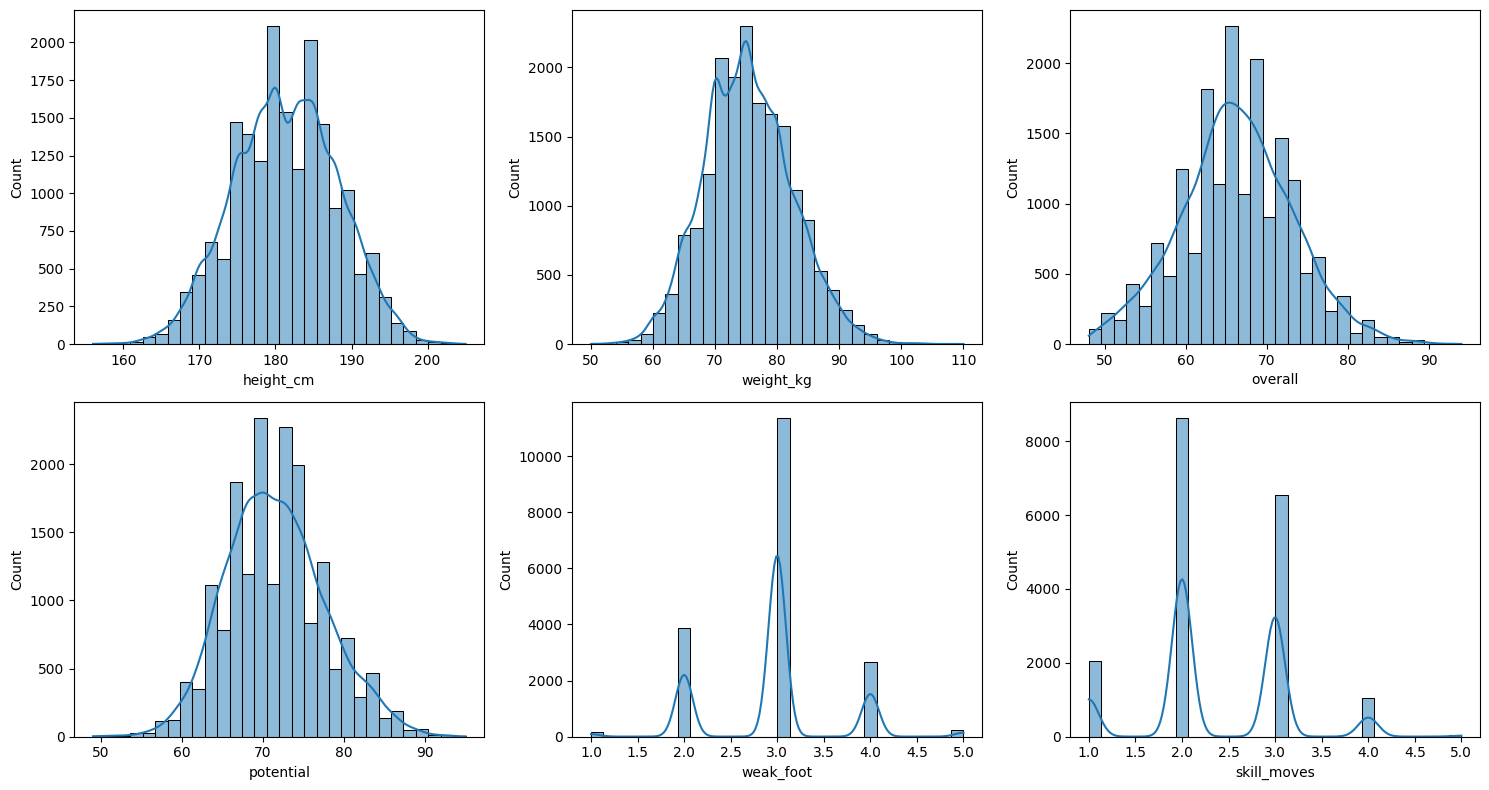

In [25]:
cols = ['height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'skill_moves']

# create a new dataframe with only the selected columns
data_selected = data[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(data_selected.columns):
    sns.histplot(data=data_selected, x=col, bins=30, ax=axs[i],kde =True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### Visualizing the distribution of ages of players in our dataset

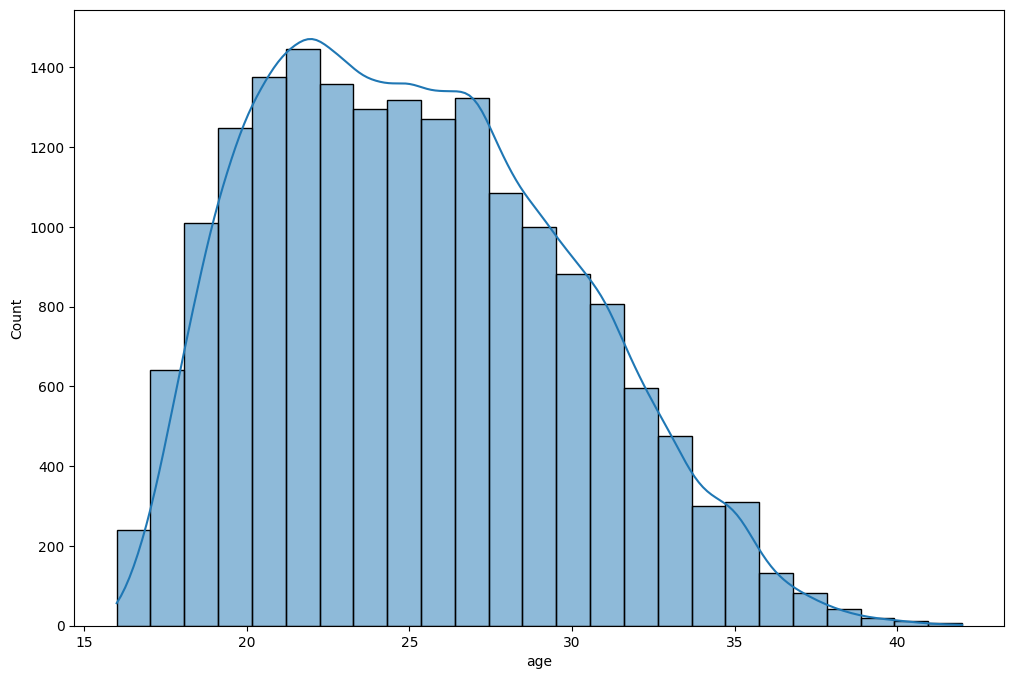

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data['age'],bins=25,kde=True);

#### Visualizing the distribution of income of players

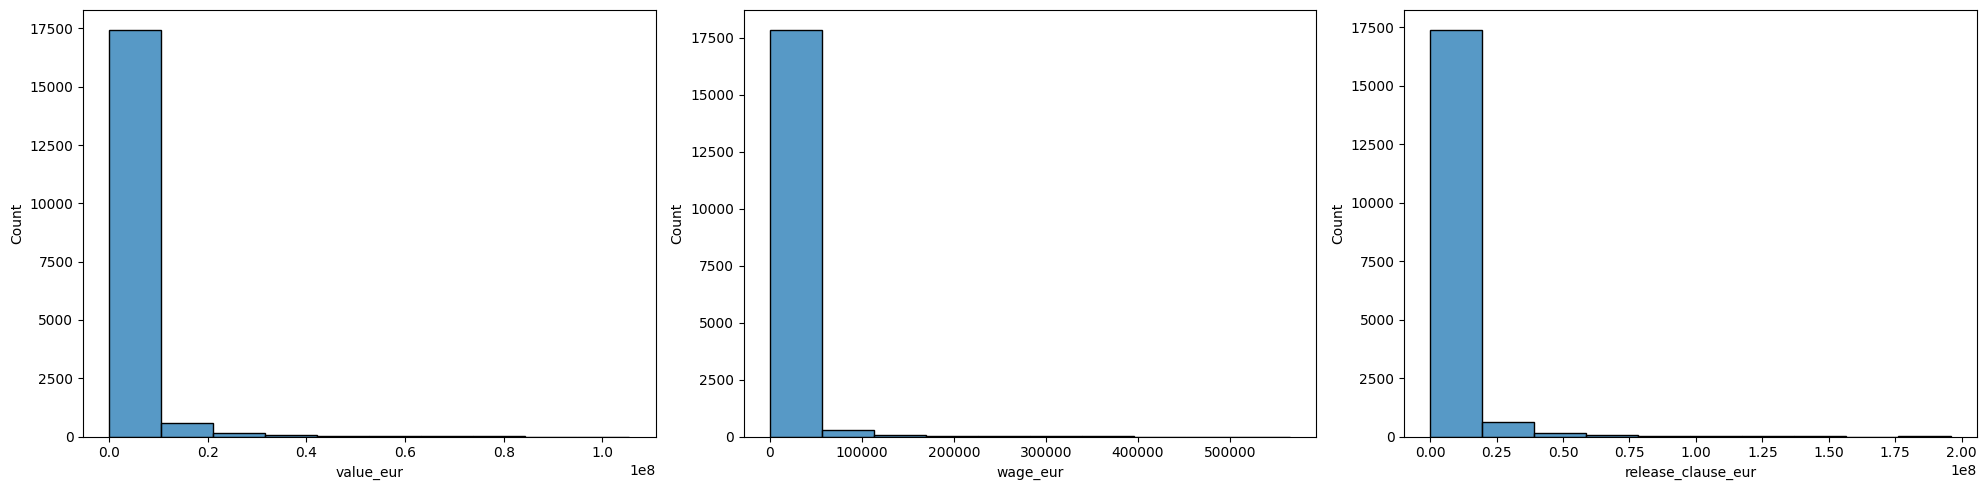

In [27]:
cols =['value_eur','wage_eur','release_clause_eur']

# create a new dataframe with only the selected columns
data_selected = data[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(data_selected.columns):
    sns.histplot(data=data_selected, x=col,bins = 10, ax=axs[i])
    axs[i].set_xlabel(col)


plt.tight_layout()
plt.show()


#### Visualizing the distribution of skills of players

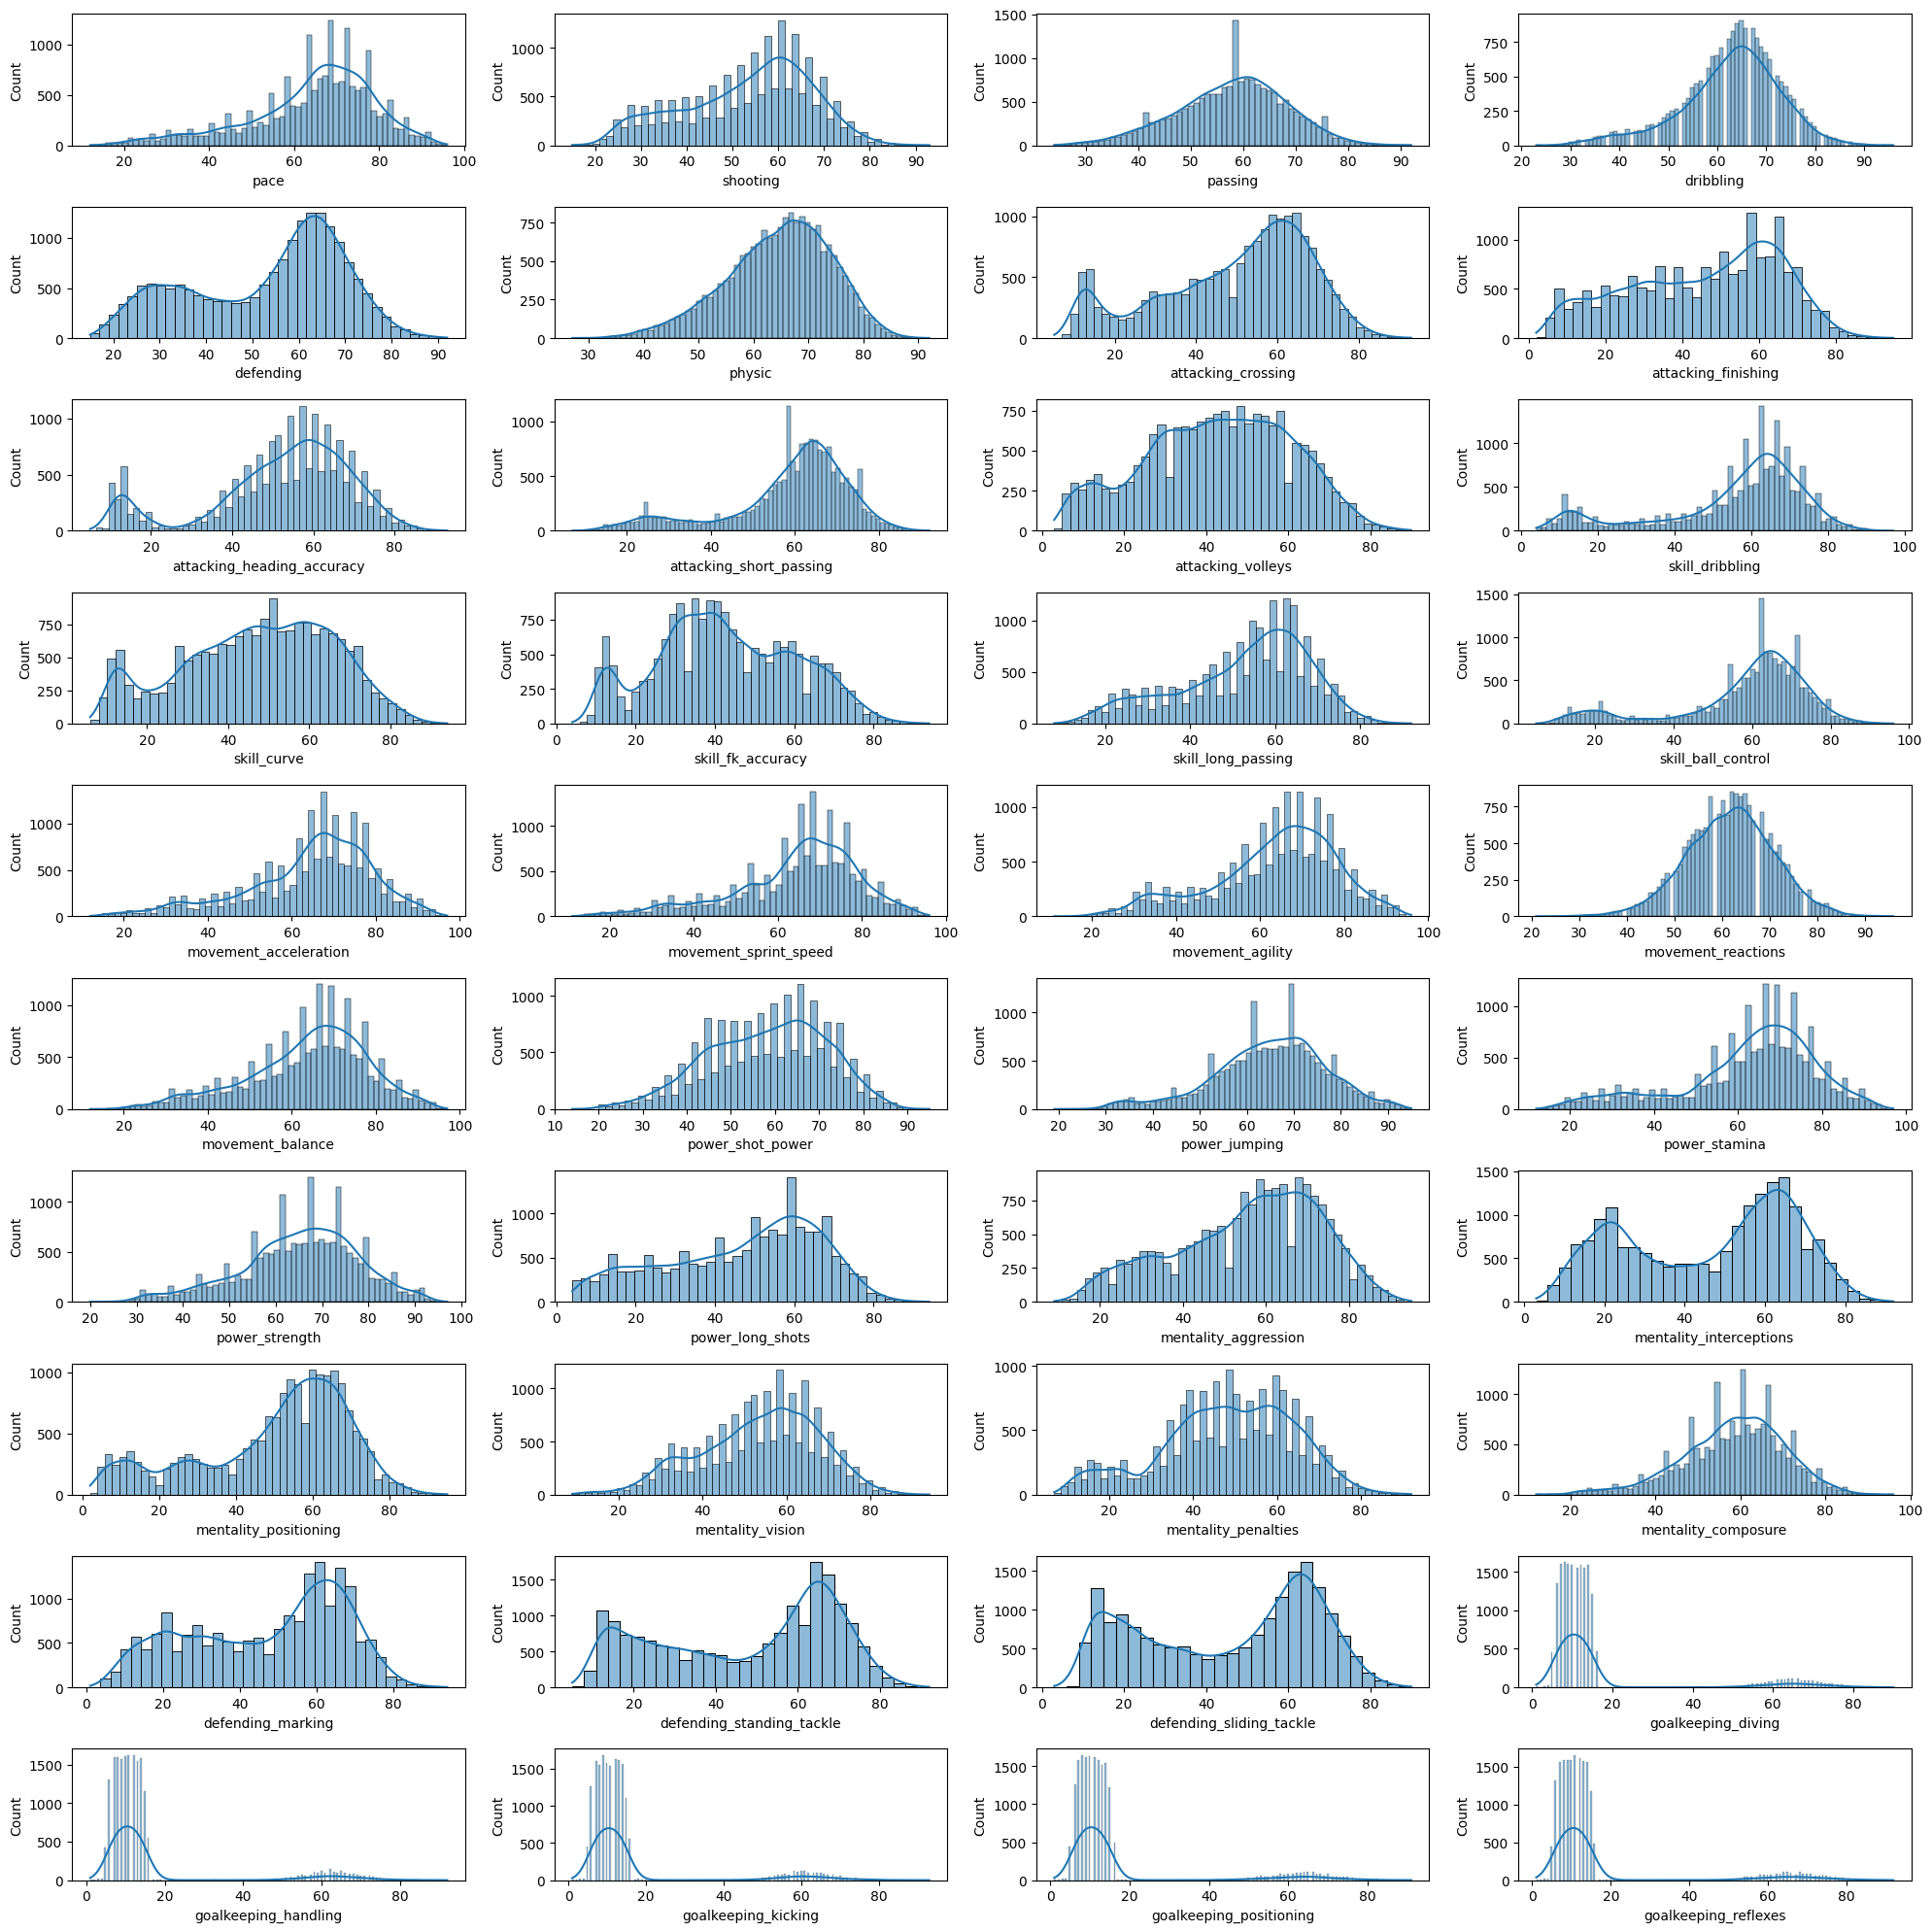

In [28]:
skills_cols = num_cols.iloc[:, 12:]

skills = skills_cols.columns.tolist()

data_selected = data[skills]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(data_selected.columns):
    sns.histplot(data=data_selected, x=col, ax=axs[i], kde=True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

####Visualizing the categorical columns

In [29]:
cat_cols.head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3  https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4  https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   

                             long_name         dob nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2        Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                            Jan Oblak  1993-01-07    Slovenia   
4                          Eden Hazard  1991-01-07     Belgium   

                  club player_positions preferred_foot      work_rate  \
0         FC Barcelona       RW, CF, ST           Left     Medium/Low   
1             Juventus           ST, LW          Right       High/Low   
2  Paris Saint-Germain          LW, CAM          Right    High/Medium   
3      Atlético Madrid               GK          Right  Medium/Medium   
4          Real Madrid           LW, CF          Right    High/Medium   

    body_type real_face team_position    ls    st    rs    lw    lf    cf  \
0       Messi       Yes            RW  89+2  89+2  89+2  93+2  93+2  93+2   
1  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3  90+3  90+3   
2      Neymar       Yes           CAM  84+3  84+3  84+3  90+3  89+3  89+3   
3      Normal       Yes            GK     0     0     0     0     0     0   
4      Normal       Yes            LW  83+3  83+3  83+3  89+3  88+3  88+3   

     rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm  \
0  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3  66+3  61+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3     0     0     0     0     0     0     0     0  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3

In [30]:
uni_cat_col1 = data[['preferred_foot','work_rate','body_type','real_face']]
uni_cat_col = uni_cat_col1[(uni_cat_col1['body_type']=='Normal')|(uni_cat_col1['body_type']=='Lean')|(uni_cat_col1['body_type']=='Stocky')]
uni_cat_col.head()

preferred_foot      work_rate body_type real_face
3          Right  Medium/Medium    Normal       Yes
4          Right    High/Medium    Normal       Yes
5          Right      High/High    Normal       Yes
6          Right  Medium/Medium    Normal       Yes
7          Right  Medium/Medium    Normal       Yes

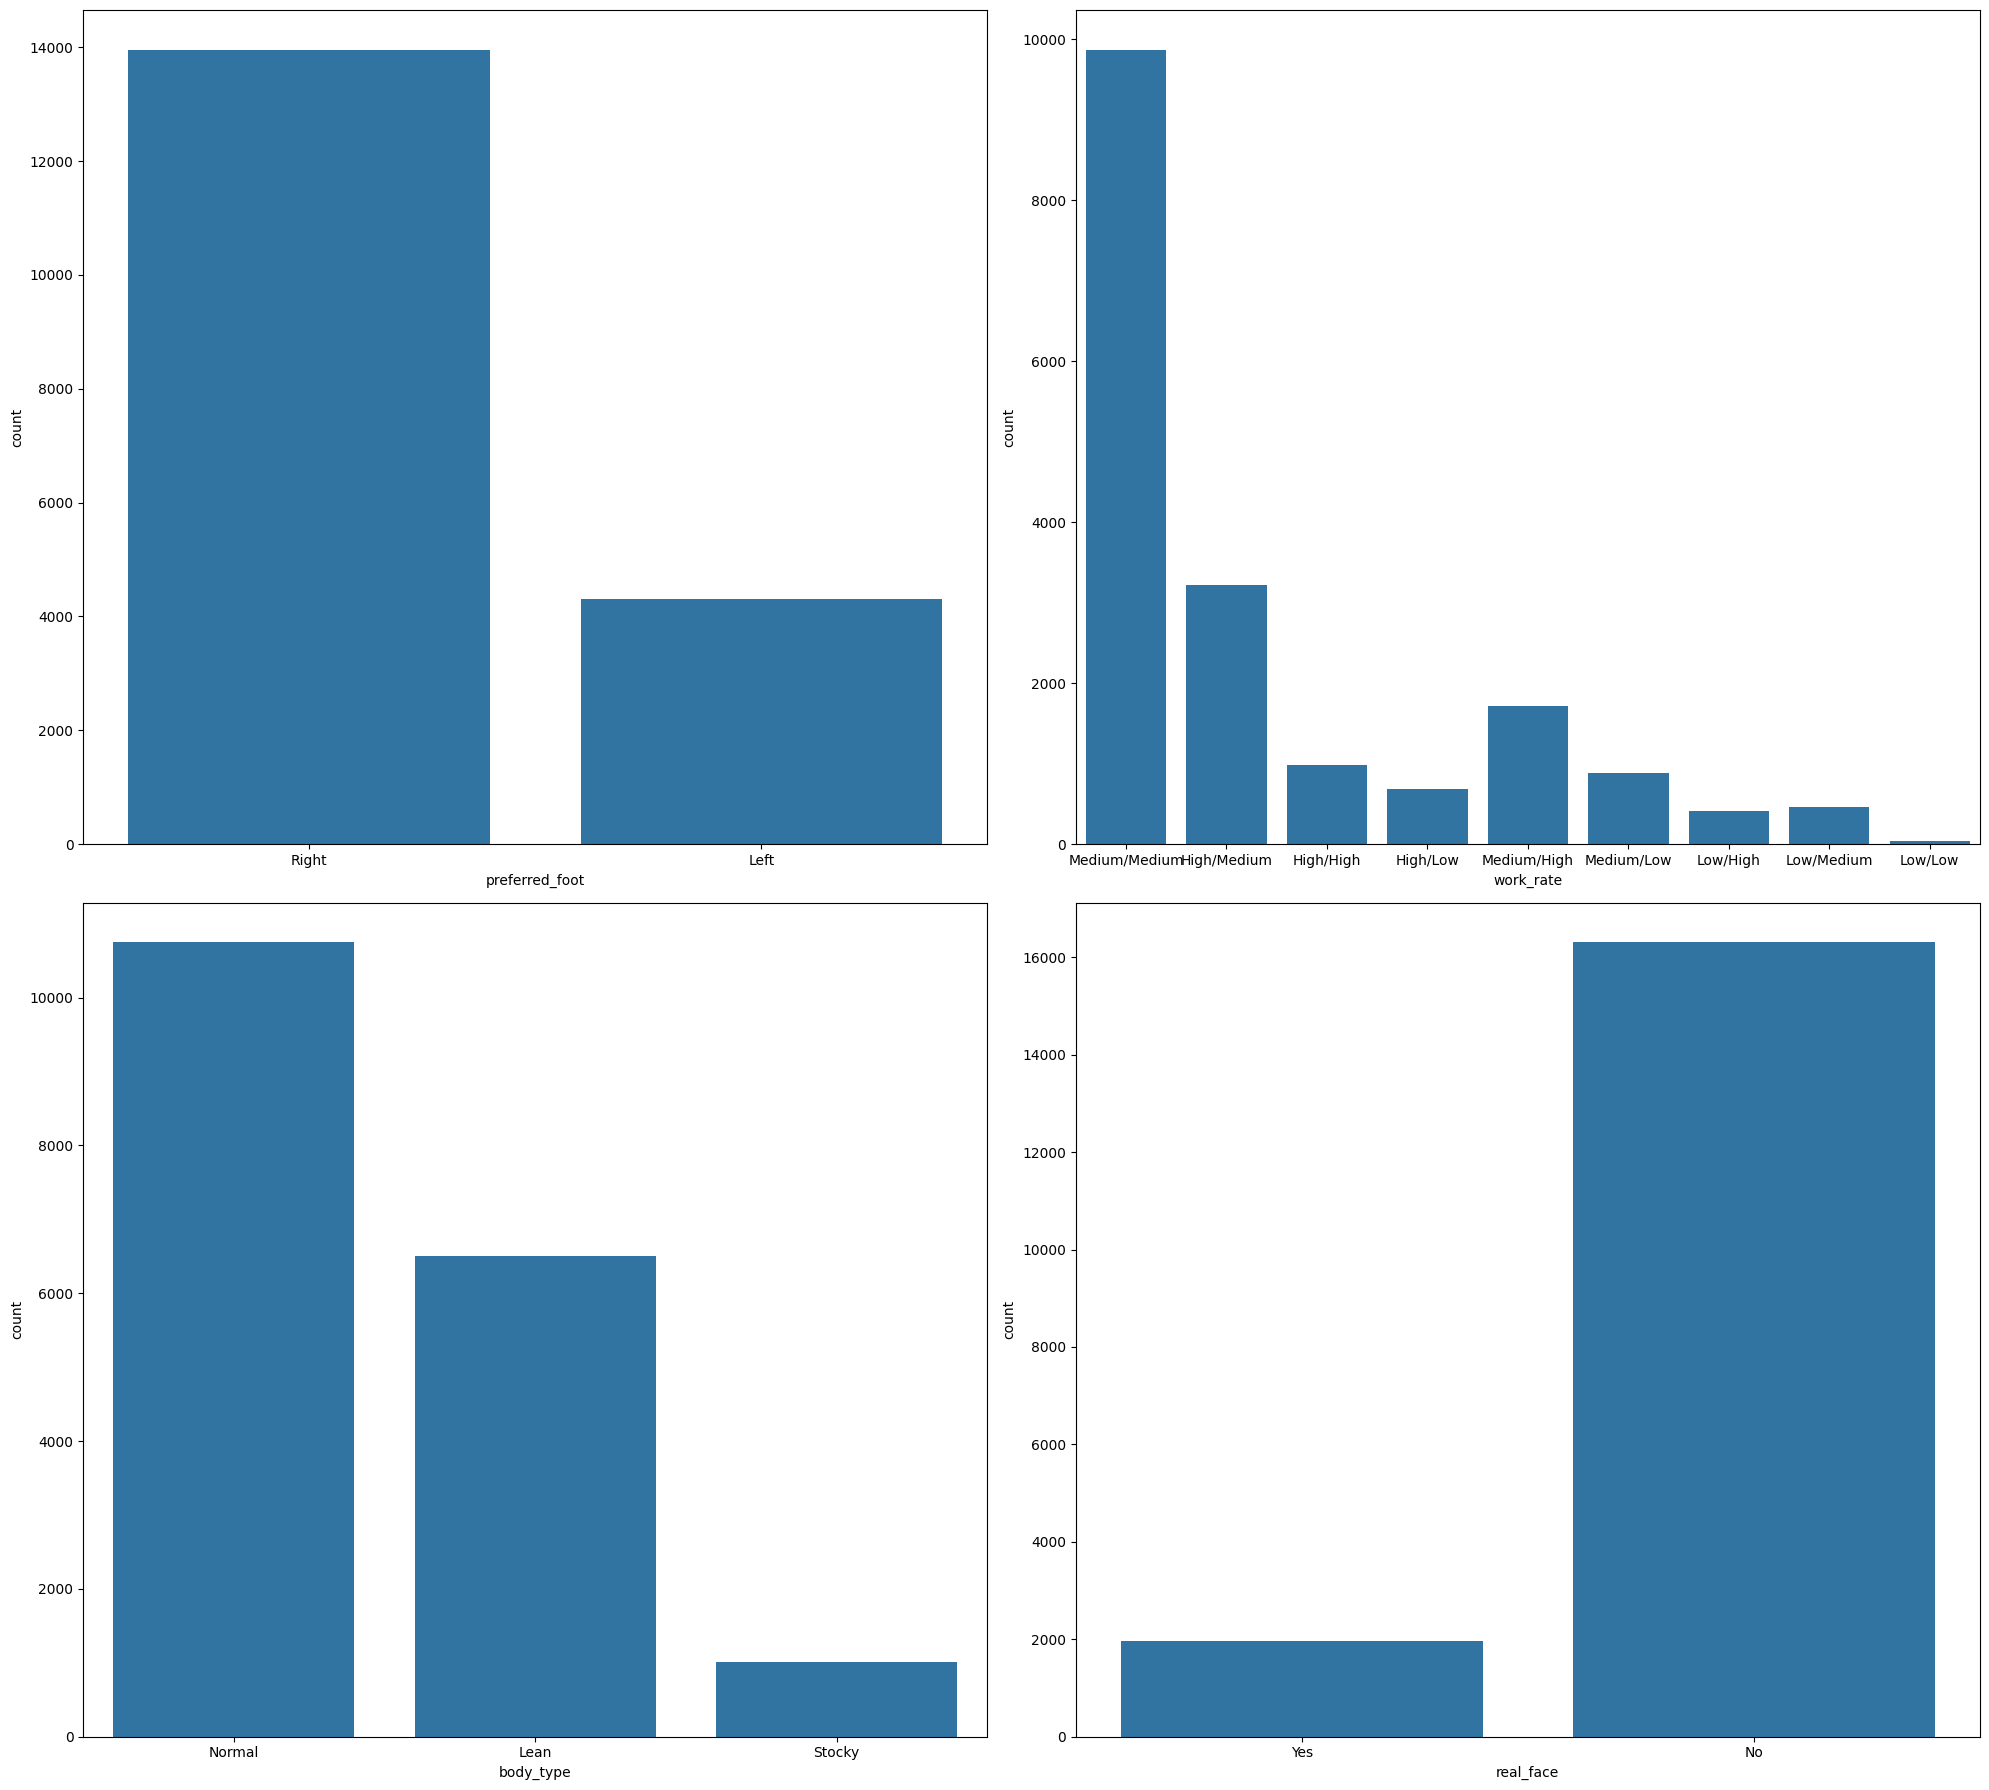

In [31]:
uni_cat_col1 = uni_cat_col.columns.to_list()

df_selected = uni_cat_col[uni_cat_col1]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axs = axs.flatten()

# plot countplot for each feature
for i, col in enumerate(df_selected.columns):
    sns.countplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Finding top ten players in the dataset

In [32]:
top_ten=data.sort_values(by='overall',ascending=False)[:10]
ranking=[i for i in range(1,11)]
players_game=top_ten['short_name'].values.tolist()

top_10_players=pd.DataFrame({'Ranking': ranking,'player':players_game})
top_10_players=top_10_players.set_index('player')
top_10_players

Ranking
player                    
L. Messi                 1
Cristiano Ronaldo        2
Neymar Jr                3
J. Oblak                 4
E. Hazard                5
K. De Bruyne             6
M. ter Stegen            7
V. van Dijk              8
L. Modrić                9
M. Salah                10

#### Finding which nation are producing the top ten players

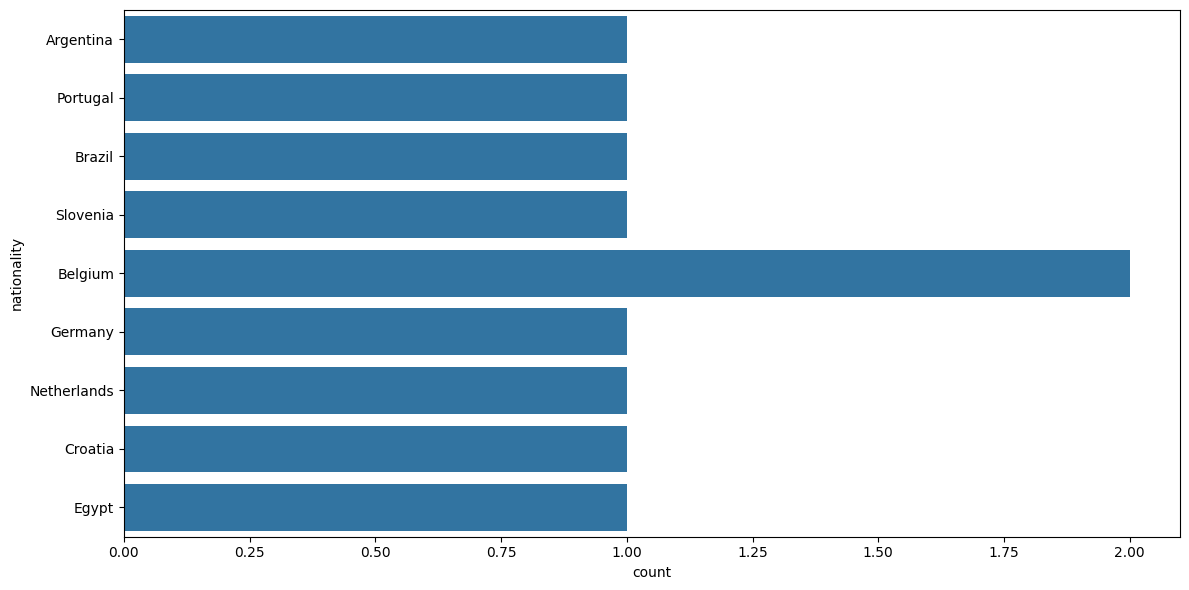

In [33]:
plt.figure(figsize = (12,6))
sns.countplot(top_ten['nationality'])

plt.tight_layout()

#### Finding out the income of top ten players

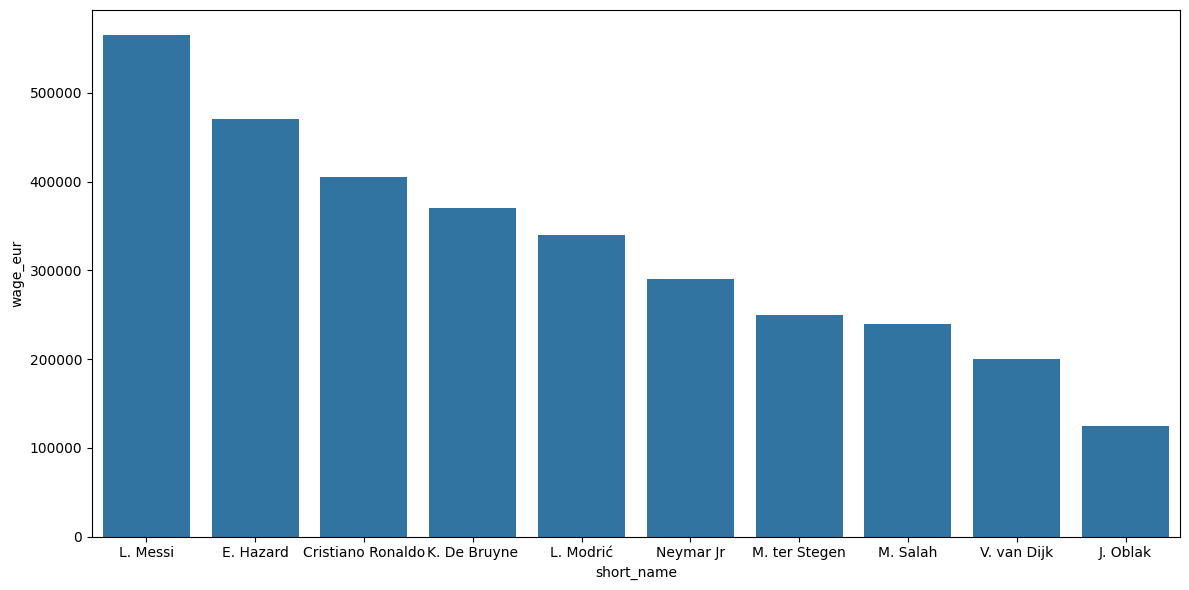

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='wage_eur',ascending=False),x = 'short_name',y = 'wage_eur')
plt.tight_layout()

#### Visualizing the top ten players with most overall rating and potential rating

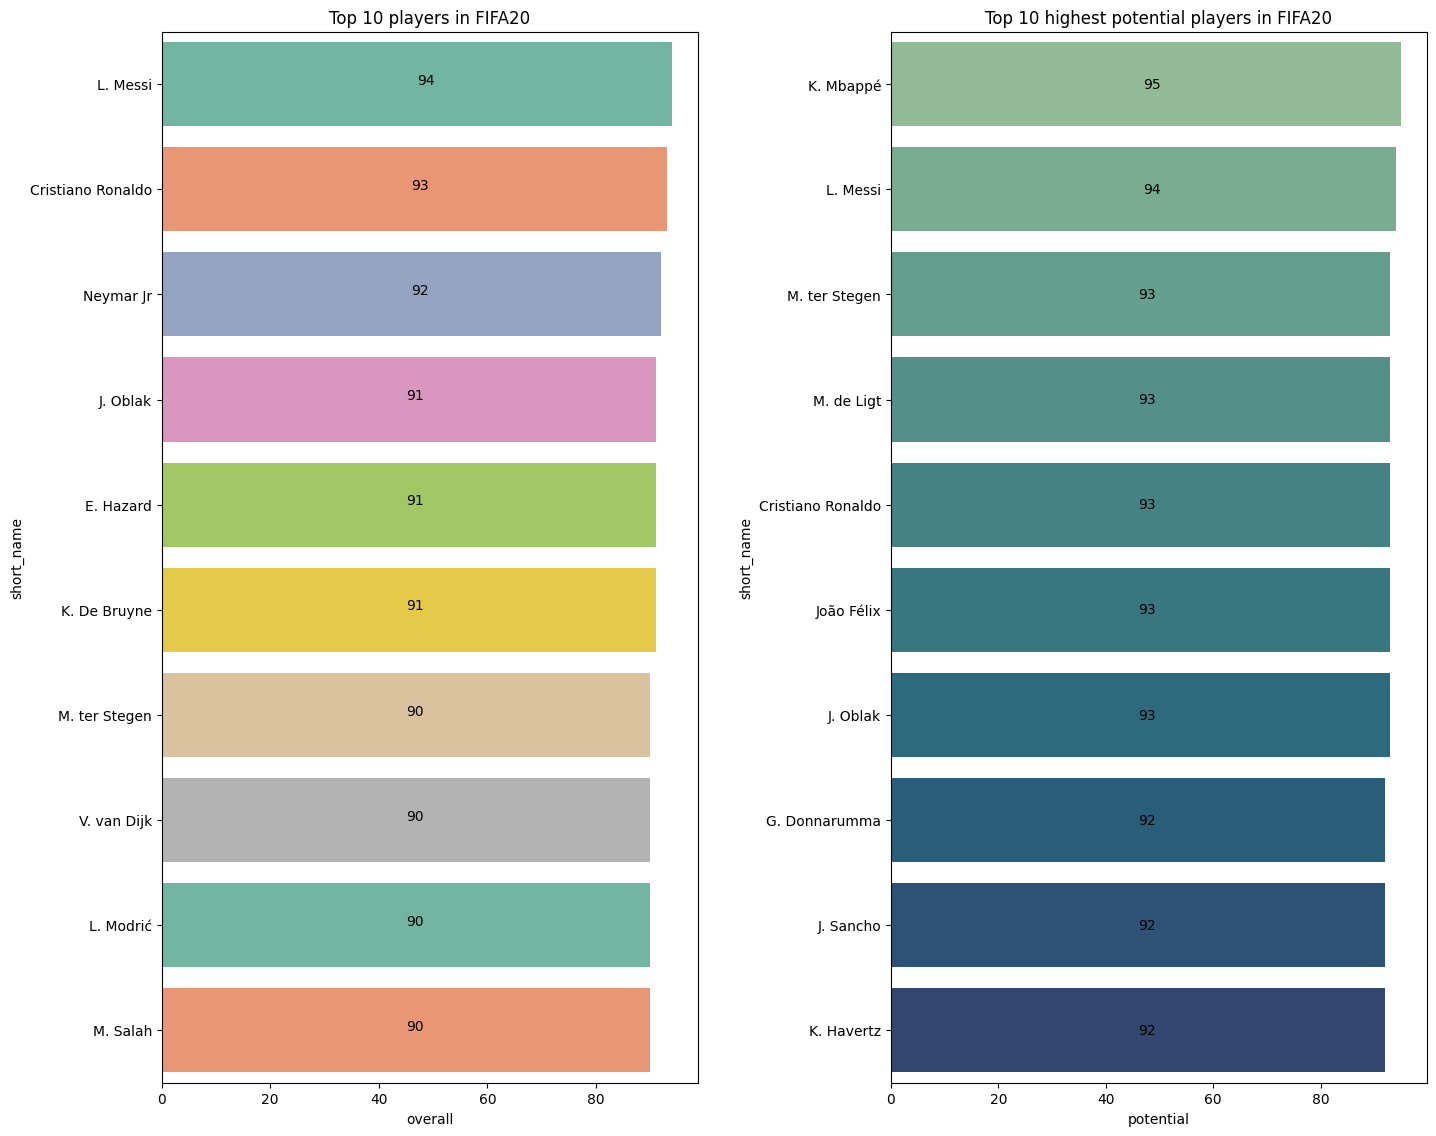

In [35]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_players = data[['short_name', 'overall']][:10]
plt.title("Top 10 players in FIFA20")
sns.barplot(y = top_players.short_name, x = top_players.overall, palette="Set2")
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))

plt.subplot(122)
def plot_top20(dataframe, metric):
    metric_df = data[['short_name', metric]].sort_values(by = [metric], ascending = False)[:10]
    plt.title(f"Top 10 highest {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_top20(data, 'potential')

plt.tight_layout(pad=3.0)

#### Finding the shooting capabilities of top ten players

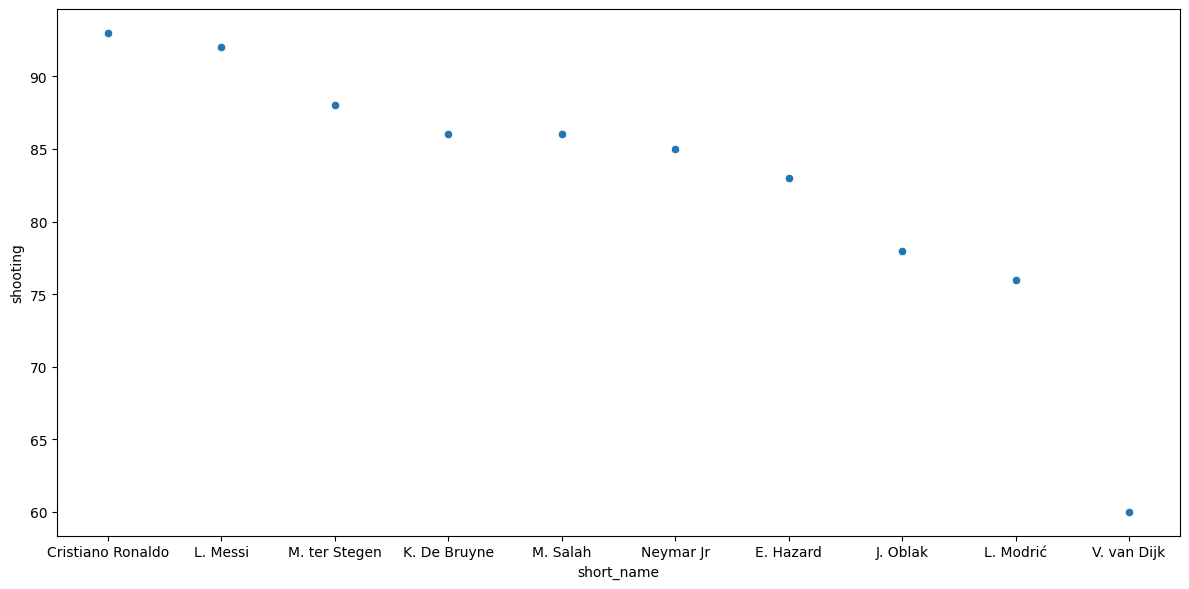

In [36]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = top_ten.sort_values(by='shooting',ascending=False),x = 'short_name',y = 'shooting')
plt.tight_layout()

#### Finding the dribbling capabilites of our top ten players

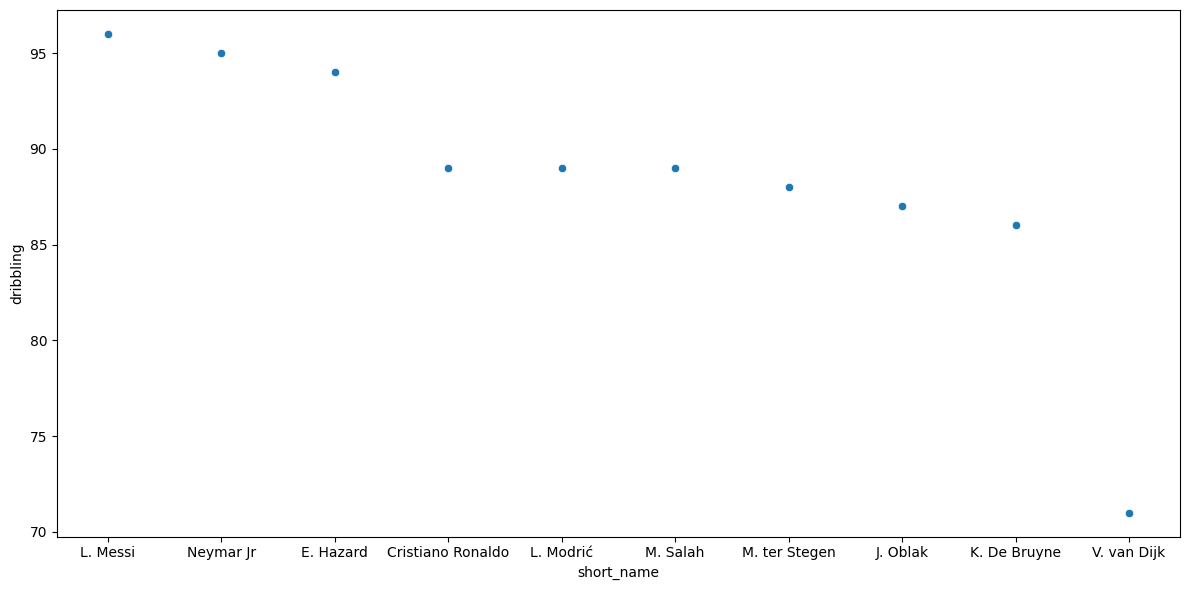

In [37]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = top_ten.sort_values(by='dribbling',ascending=False),x = 'short_name',y = 'dribbling')
plt.tight_layout()

### Finding the highest paid offensive players

In [38]:
fifa_df = data.copy()
fifa_df = fifa_df.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
def find_most_earnings_player(position):
    forwards_df = fifa_df[(data["team_position"] == 'LW') | (fifa_df["team_position"] == 'RW')| (fifa_df["team_position"] == 'ST')]
    name = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][2]
    wage = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][12]
    if position == 'LW':
        position = 'left winger'
    elif position == 'ST':
        position = 'striker'
    else:
        position = 'right winger'
    print(f'{name} is highest paid {position} with a wage of {wage} euros')


In [39]:
find_most_earnings_player('LW')

Eden Hazard is highest paid left winger with a wage of 470000 euros


In [40]:
find_most_earnings_player('RW')

Lionel Andrés Messi Cuccittini is highest paid right winger with a wage of 565000 euros


In [41]:
find_most_earnings_player('ST')

Luis Alberto Suárez Díaz is highest paid striker with a wage of 355000 euros


#### Finding the relationship betweeen overall & potential rating of the player with respect to how much they earn

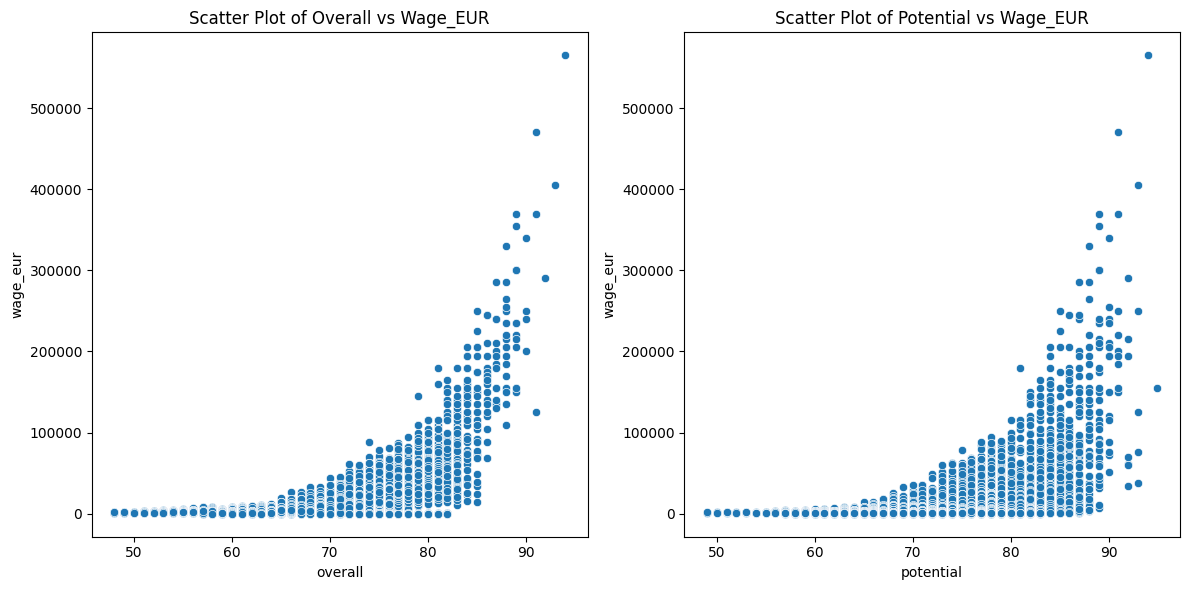

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data =data,x = 'overall', y = 'wage_eur', ax=ax1)
ax1.set_title("Scatter Plot of Overall vs Wage_EUR")

sns.scatterplot(data =data,x = 'potential', y = 'wage_eur', ax=ax2)
ax2.set_title("Scatter Plot of Potential vs Wage_EUR")
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

#### Finding the top ten clubs and top ten countries with respect to overall ratings of the players

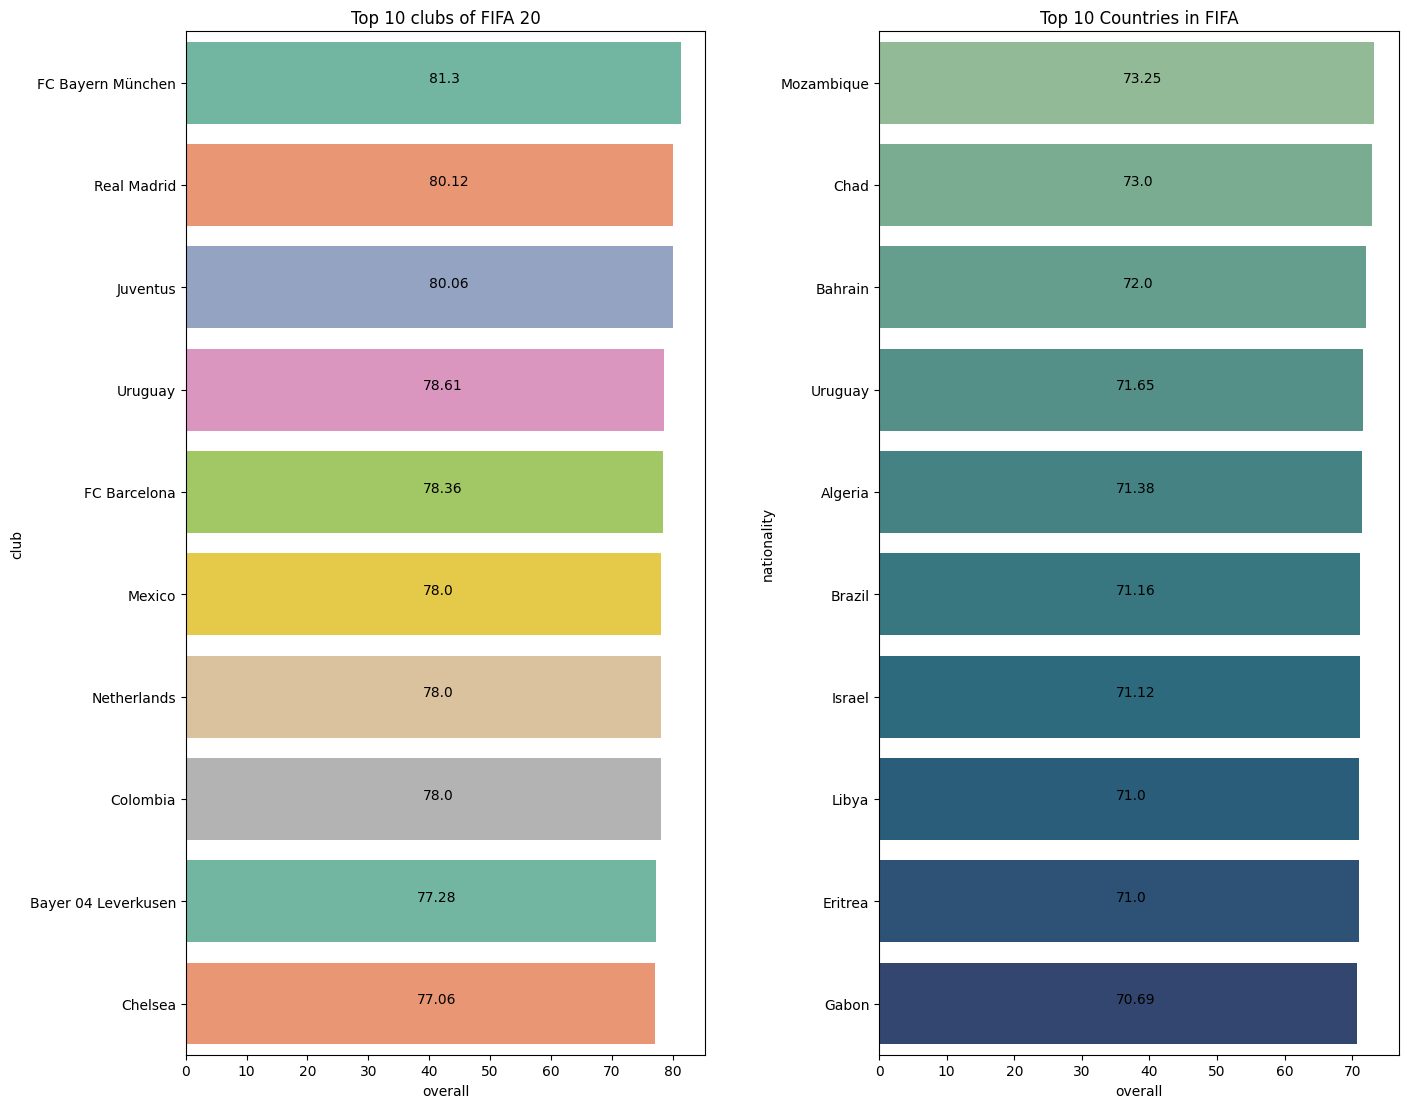

In [43]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_club=data.groupby(['club']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 clubs of FIFA 20')
sns.barplot(x=top_club,y=top_club.index,palette='Set2')
for index,value in enumerate(top_club):
    plt.text(value//2, index, str(round(value,2)))

plt.subplot(122)

top_country=data.groupby(['nationality']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 Countries in FIFA')
sns.barplot(y=top_country.index,x=top_country,palette='crest')
for index, value in enumerate(top_country):
    plt.text(value//2,index,str(round(value,2)))


plt.tight_layout(pad=4.0)

#### Visualizing the relationship of a player's international reputation vs their overall rating

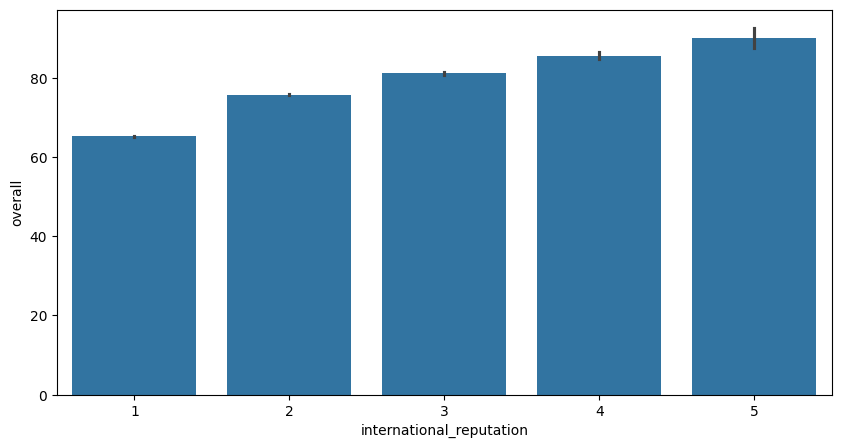

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='international_reputation',y='overall')
plt.show()

In [45]:
IR=data.groupby(['international_reputation']).overall.mean()
IR

international_reputation
1    65.273133
2    75.835965
3    81.157534
4    85.586957
5    90.166667
Name: overall, dtype: float64

#### Visualizing the ralationship of a players preferred foot vs their overall rating

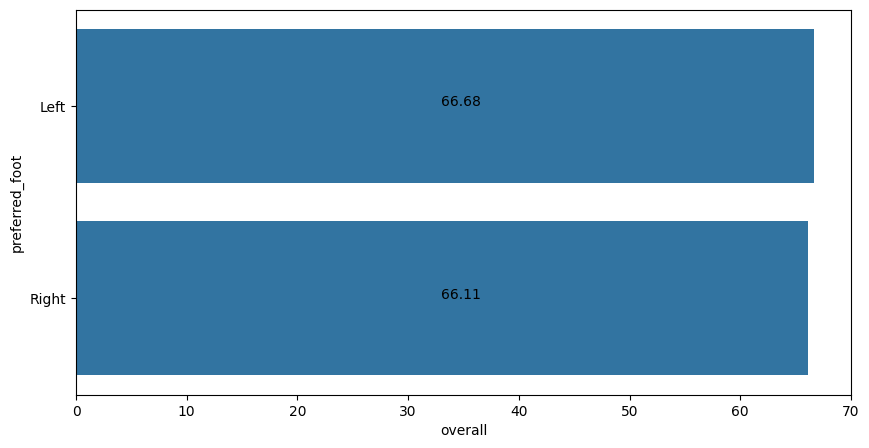

In [46]:
plt.figure(figsize=(10,5))
pf=data.groupby(['preferred_foot']).overall.mean()
sns.barplot(x=pf,y=pf.index)
for index,value in enumerate(pf):
    plt.text(value//2, index,str(round(value,2)))
plt.show()

#### Comparing Lionel Messi and Cristiano Ronaldo capabilities

In [47]:
messi_ronaldo_df = data[(data['short_name']=='L. Messi') | (data['short_name']=='Cristiano Ronaldo')]
messi_ronaldo_df

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   

                             long_name  age         dob  height_cm  weight_kg  \
0       Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   
1  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05        187         83   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   
1    Portugal      Juventus       93         93   58500000    405000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   

   skill_moves   work_rate   body_type real_face  release_clause_eur  \
0            4  Medium/Low       Messi       Yes         195800000.0   
1            5    High/Low  C. Ronaldo       Yes          96500000.0   

  team_position  jersey_number  pace  shooting  passing  dribbling  defending  \
0            RW           10.0  87.0      92.0     92.0       96.0       39.0   
1            LW            7.0  90.0      93.0     82.0       89.0       35.0   

   physic  attacking_crossing  attacking_finishing  \
0    66.0                  88                   95   
1    78.0                  84                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
0                       14                     8  89+2  89+2  89+2  93+2   
1                       14                    11  91+3  91+3  91+3  89+3   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   
1  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  68+2  

#### Visualizing the capabilities of Messi and Ronaldo

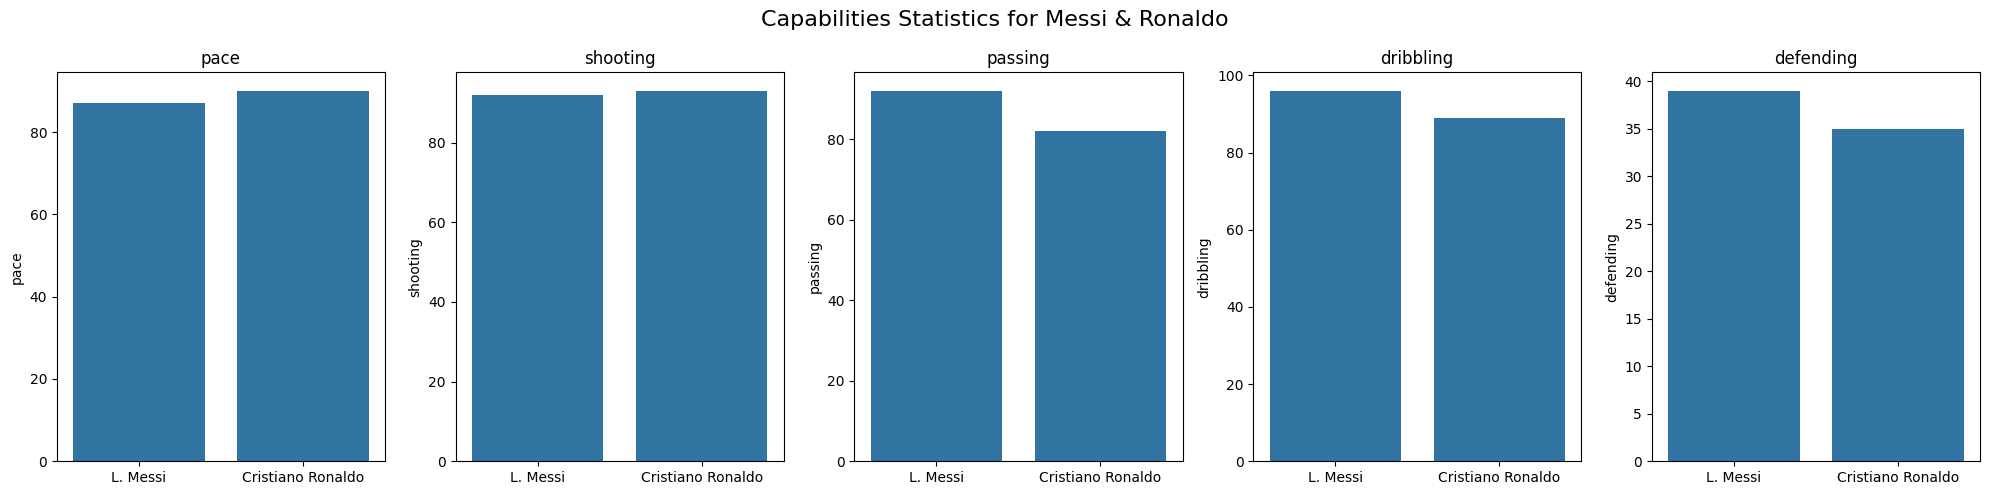

In [48]:
capabilities = ['pace', 'shooting', 'passing', 'dribbling', 'defending']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, capability in enumerate(capabilities):
    sns.barplot(data = messi_ronaldo_df, x = messi_ronaldo_df['short_name'], y = messi_ronaldo_df[capability], ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(capability)
    ax[i].set_title(capability)
plt.suptitle("Capabilities Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

#### Visualizing the attacking capabilities of Messi and Ronaldo

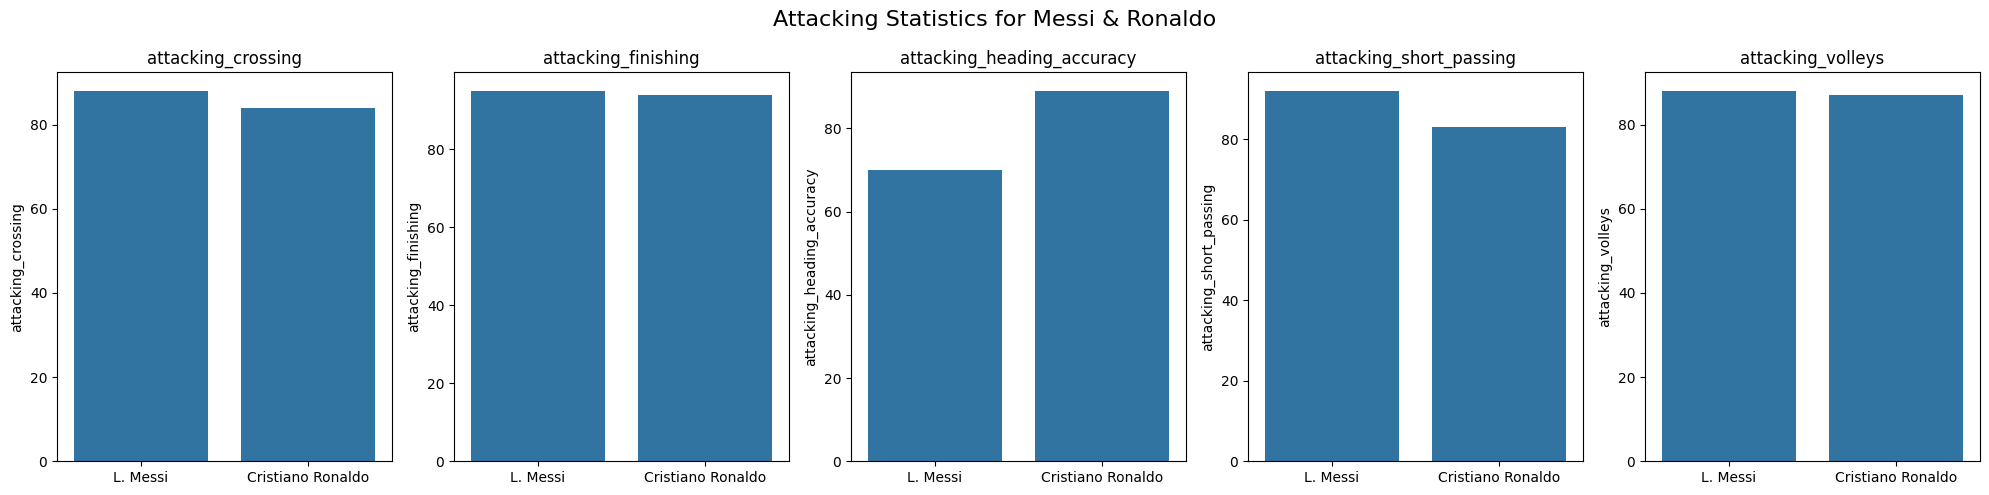

In [49]:
attacking_stats = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                   'attacking_short_passing','attacking_volleys']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(attacking_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Attacking Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

#### Visualizing the skills of Messi & Ronaldo

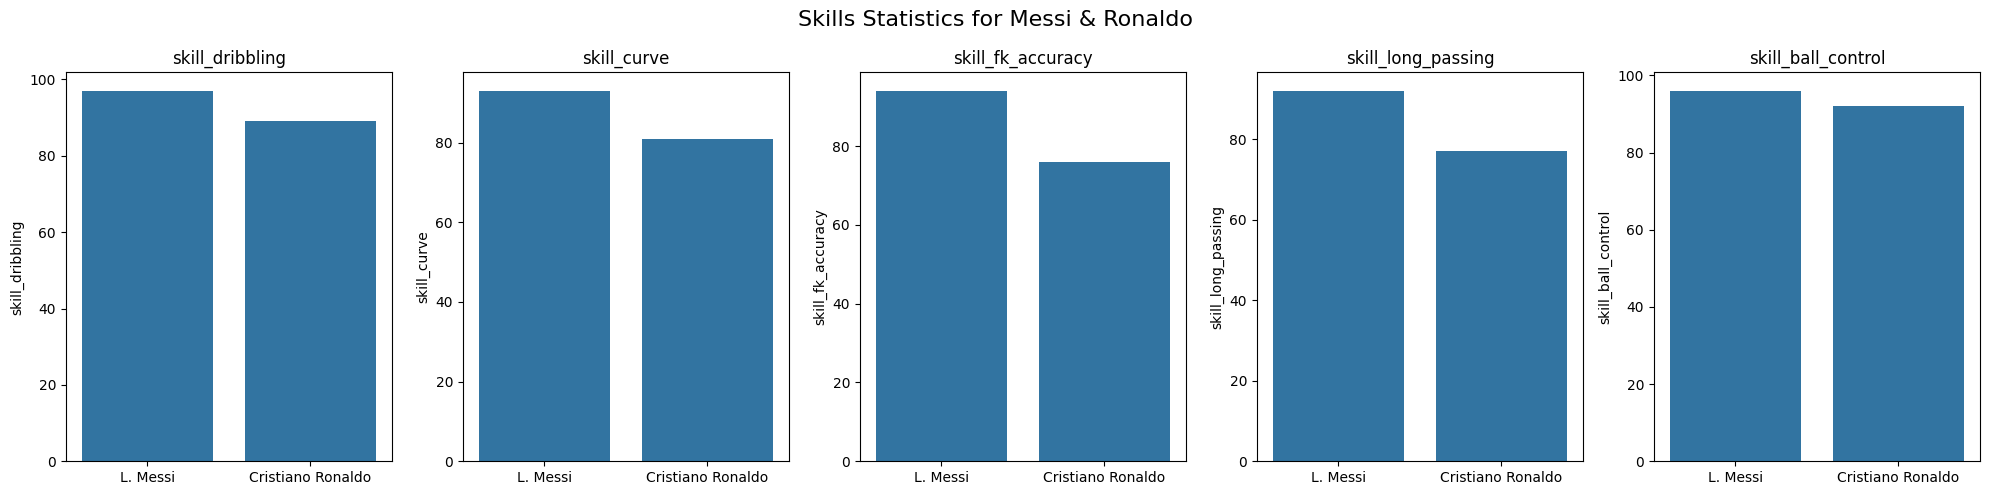

In [50]:
skill_stats = ['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(skill_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Skills Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

#### Visualizing the power capabilities of Messi & Ronaldo

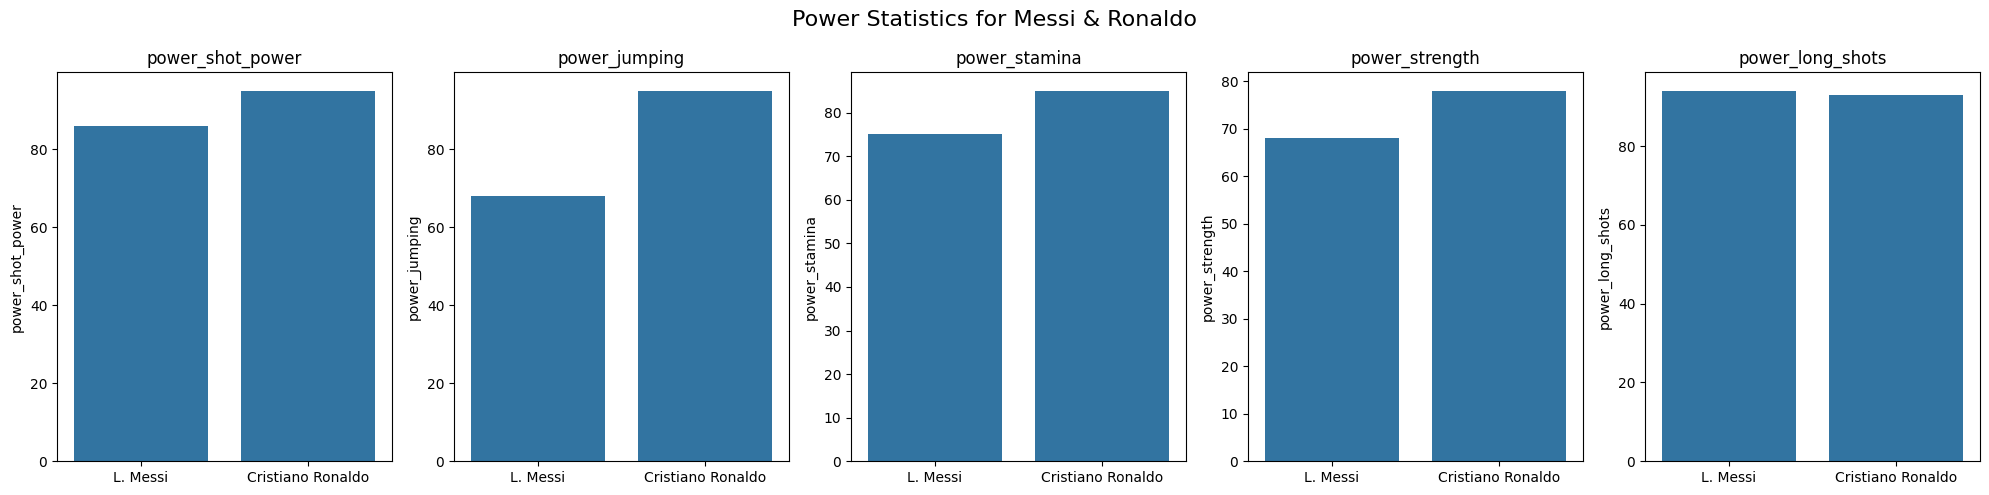

In [51]:
power_stats = ['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(power_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Power Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()


#### Finding the important features in our dataset

#####Numerical Columns important features

In [52]:
num_cols.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

   jersey_number  pace  shooting  passing  dribbling  defending  physic  \
0           10.0  87.0      92.0     92.0       96.0       39.0    66.0   
1            7.0  90.0      93.0     82.0       89.0       35.0    78.0   
2           10.0  91.0      85.0     87.0       95.0       32.0    58.0   
3            1.0  52.0      78.0     90.0       87.0       89.0    92.0   
4           10.0  91.0      83.0     86.0       94.0       35.0    66.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_interceptions  

In [53]:
imp_feats = num_cols.corr()["overall"].sort_values()[40:-1].index.tolist()
imp_feat_df = data[imp_feats]
num_imp_feat_df = pd.concat([imp_feat_df,data['overall']],axis =1)
num_imp_feat_df.head()


mentality_vision  physic  power_shot_power  wage_eur  release_clause_eur  \
0                94    66.0                86    565000         195800000.0   
1                82    78.0                95    405000          96500000.0   
2                90    58.0                80    290000         195200000.0   
3                65    92.0                59    125000         164700000.0   
4                89    66.0                82    470000         184500000.0   

   dribbling  value_eur  potential  passing  mentality_composure  \
0       96.0   95500000         94     92.0                   96   
1       89.0   58500000         93     82.0                   95   
2       95.0  105500000         92     87.0                   94   
3       87.0   77500000         93     90.0                   68   
4       94.0   90000000         91     86.0                   91   

   movement_reactions  overall  
0                  95       94  
1                  96       93  
2                  92       92  
3                  88       91  
4                  90       91

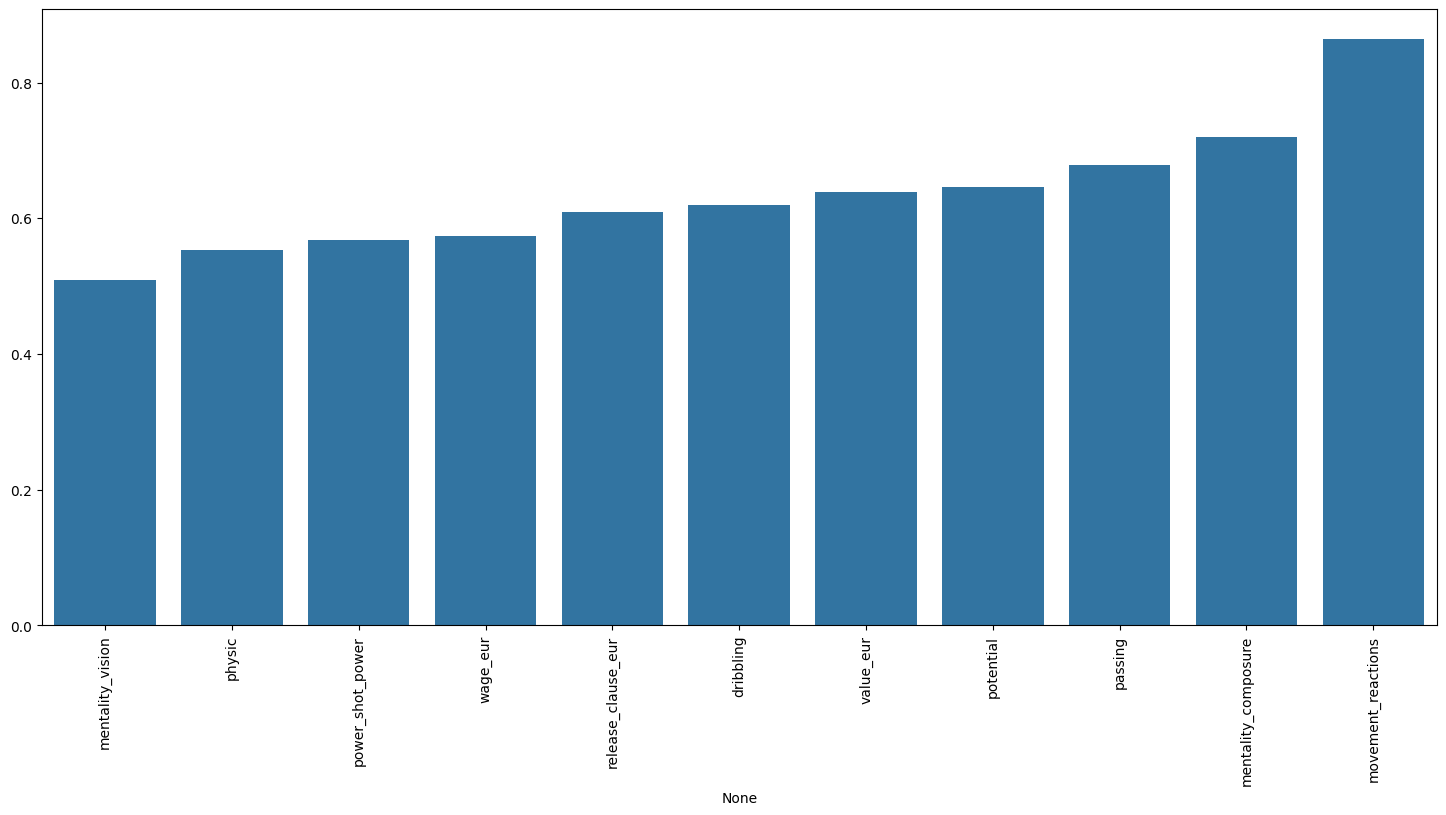

In [54]:
plt.figure(figsize=(18,8))
sns.barplot(x= num_cols.corr()["overall"].sort_values()[40:-1].index,y = num_cols.corr()["overall"].sort_values()[40:-1].values)
plt.xticks(rotation = 90);

# Data Preprocessing

Processing Numerical data first

In [55]:
num_cols.shape

(18278, 52)

Removing the highly corelated column that is more than 90%

In [56]:
cor_matrix = num_cols.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
num_col = num_cols.drop(to_drop, axis=1,inplace=True)

In [57]:
num_cols.shape

(18278, 40)

Handling Outliers

In [58]:
cols = num_cols.columns.tolist()

data_selected = data[cols]

In [59]:
data_selected

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0       32        170         72       94         94   95500000    565000   
1       34        187         83       93         93   58500000    405000   
2       27        175         68       92         92  105500000    290000   
3       26        188         87       91         93   77500000    125000   
4       28        175         74       91         91   90000000    470000   
...    ...        ...        ...      ...        ...        ...       ...   
18273   22        186         79       48         56      40000      2000   
18274   22        177         66       48         56      40000      2000   
18275   19        186         75       48         56      40000      1000   
18276   18        185         74       48         54      40000      1000   
18277   26        182         78       48         51      40000      2000   

       international_reputation  weak_foot  skill_moves  jersey_number  pace  \
0                             5          4            4           10.0  87.0   
1                             5          4            5            7.0  90.0   
2                             5          5            5           10.0  91.0   
3                             3          3            1            1.0  52.0   
4                             4          4            4           10.0  91.0   
...                         ...        ...          ...            ...   ...   
18273                         1          3            2           36.0  57.0   
18274                         1          2            2           31.0  58.0   
18275                         1          2            2           38.0  54.0   
18276                         1          2            2           33.0  59.0   
18277                         1          3            2           37.0  60.0   

       shooting  passing  dribbling  defending  physic  attacking_crossing  \
0          92.0     92.0       96.0       39.0    66.0                  88   
1          93.0     82.0       89.0       35.0    78.0                  84   
2          85.0     87.0       95.0       32.0    58.0                  87   
3          78.0     90.0       87.0       89.0    92.0                  13   
4          83.0     86.0       94.0       35.0    66.0                  81   
...         ...      ...        ...        ...     ...                 ...   
18273      23.0     28.0       33.0       47.0    51.0                  21   
18274      24.0     33.0       35.0       48.0    48.0                  24   
18275      35.0     44.0       45.0       48.0    51.0                  32   
18276      35.0     47.0       47.0       45.0    52.0                  39   
18277      32.0     51.0       45.0       47.0    55.0                  44   

       attacking_finishing  attacking_heading_accuracy  \
0                       95                          70   
1                       94                          89   
2                       87                          62   
3                       11                          15   
4                       84                          61   
...                    ...                         ...   
18273                   17                          40   
18274                   20                          42   
18275                   33                          49   
18276                   34                          47   
18277                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                           92                 88               97   
1                           83                 87               89   
2                           87                 87               96   
3                           43                 13               12   
4                           89                 83               95   
...                        ...                ...              ... 

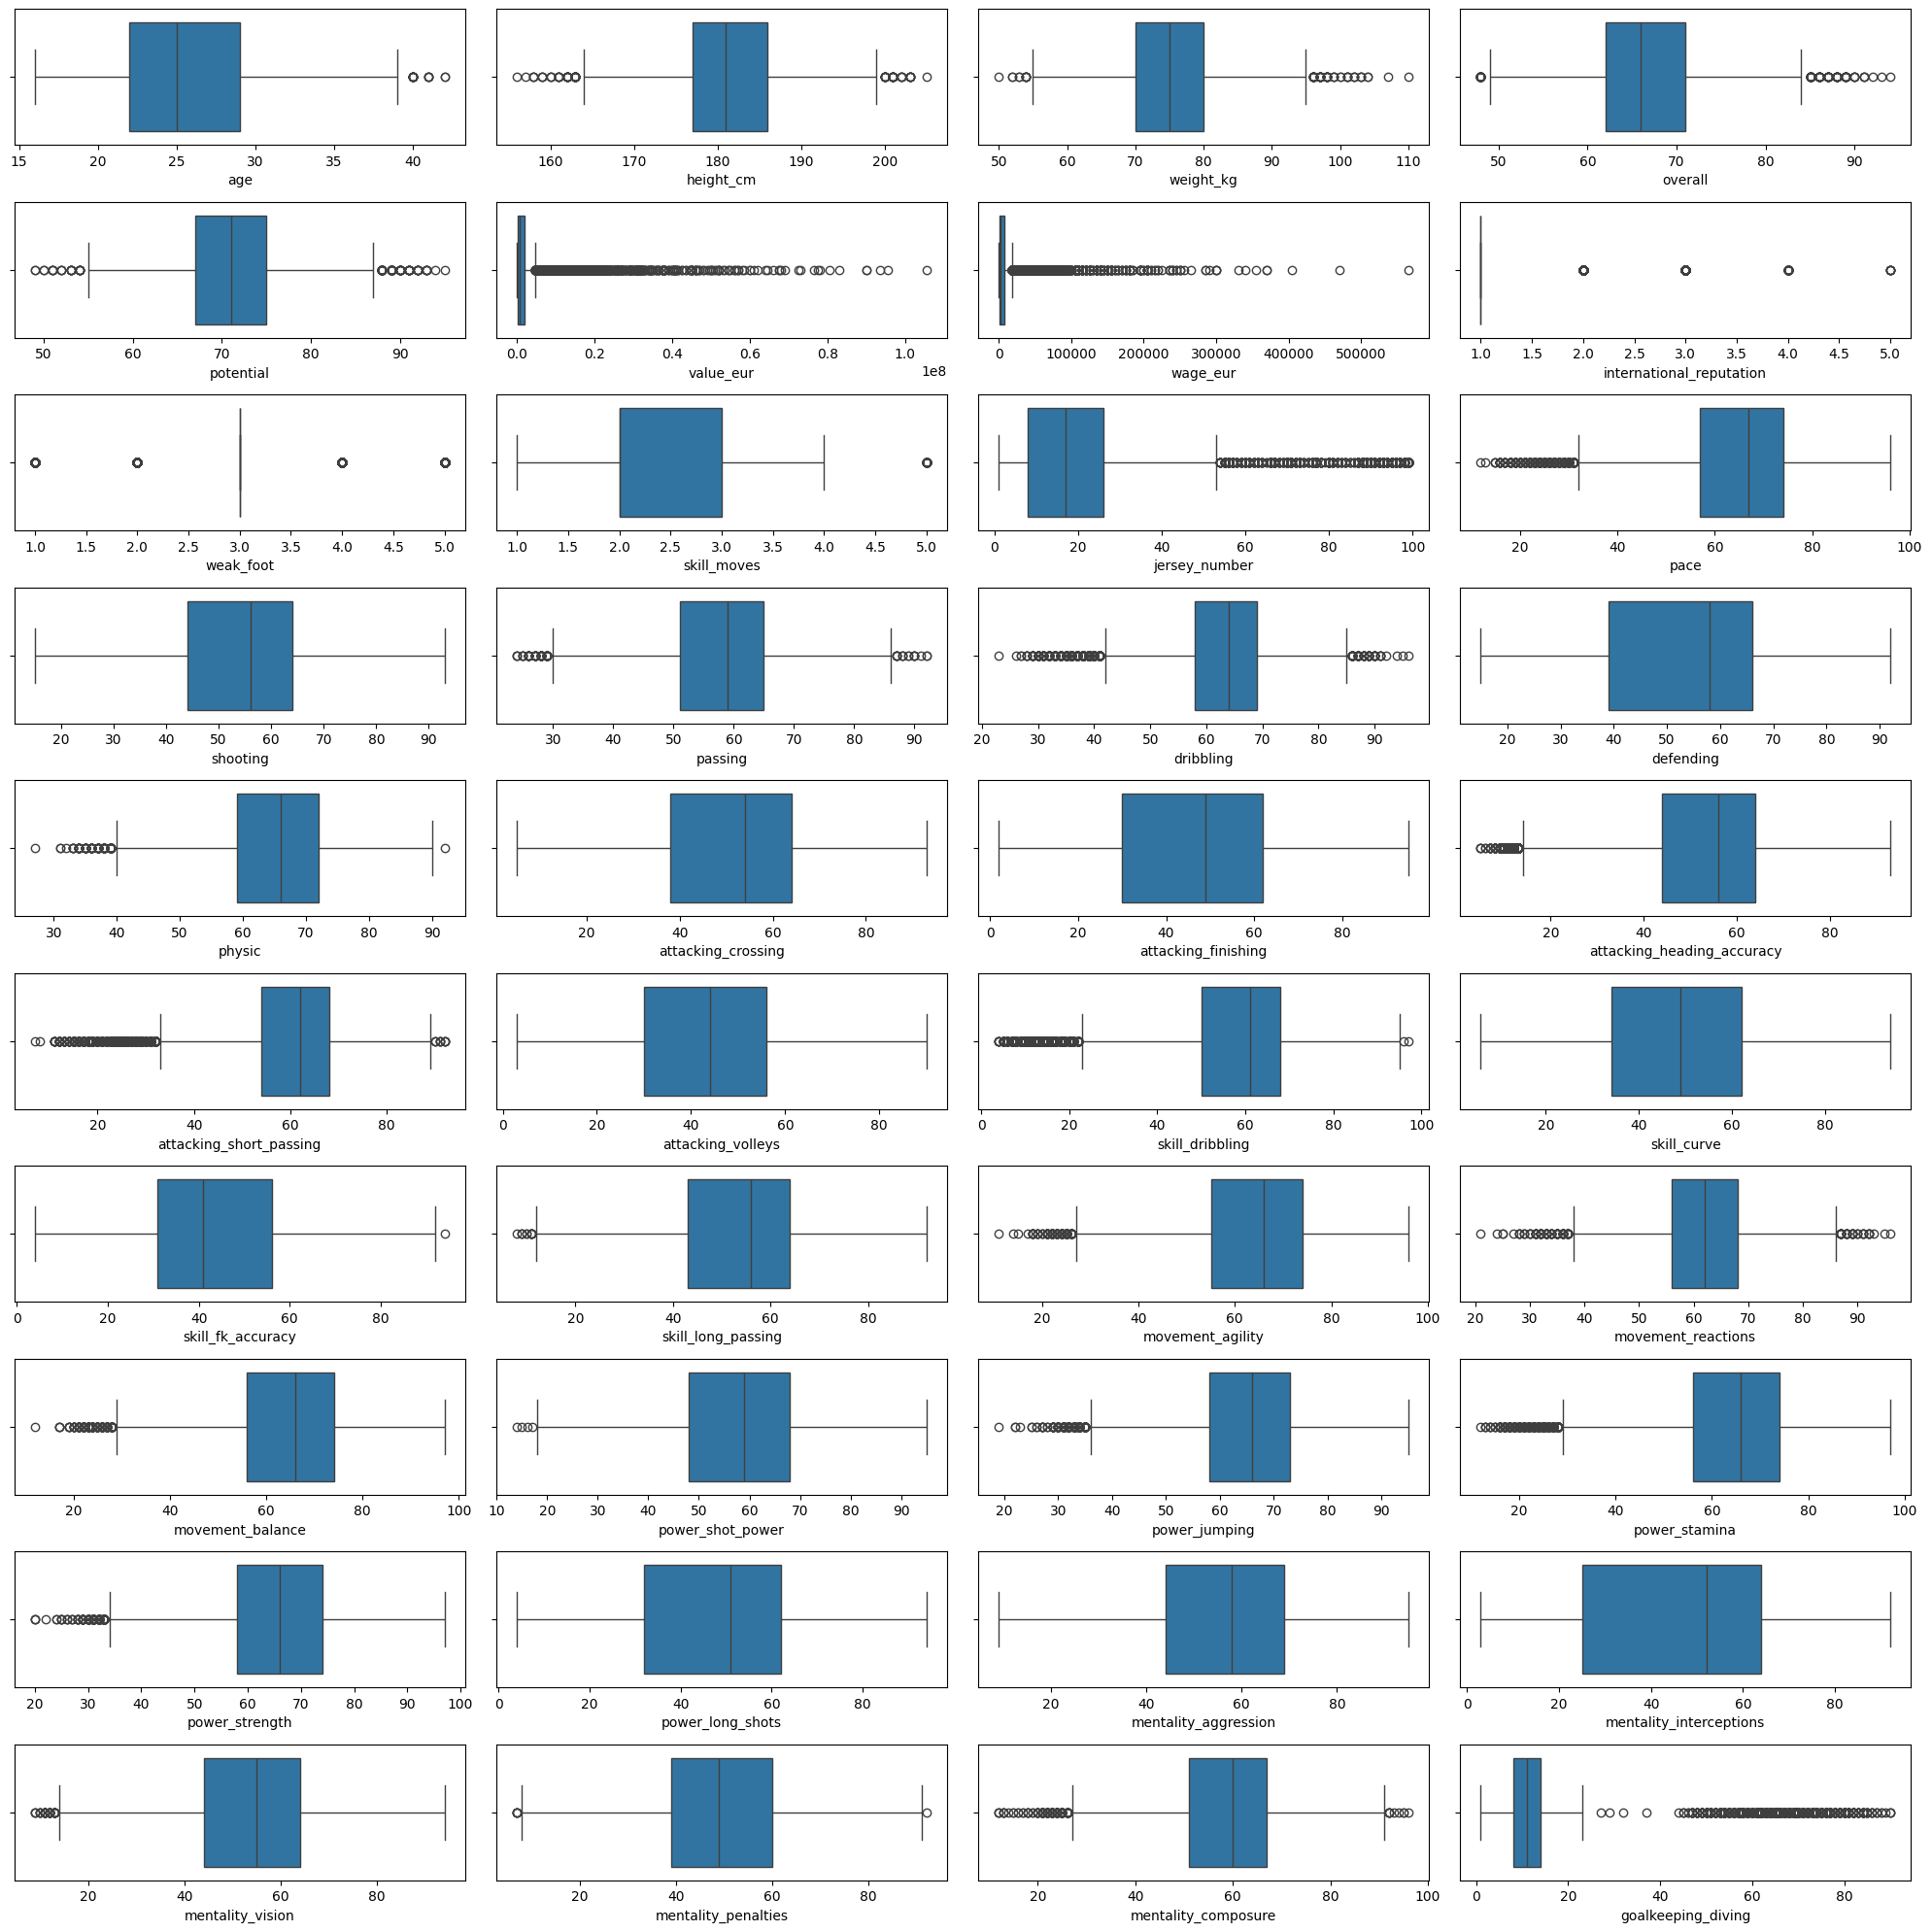

In [60]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(data_selected.columns):
    sns.boxplot(data=data_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [61]:
# Creating a function to fix outliers
def handle_outliers(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])
    return data

In [62]:
data2 = handle_outliers(num_cols)

After handling outliers we will plot the boxplot again

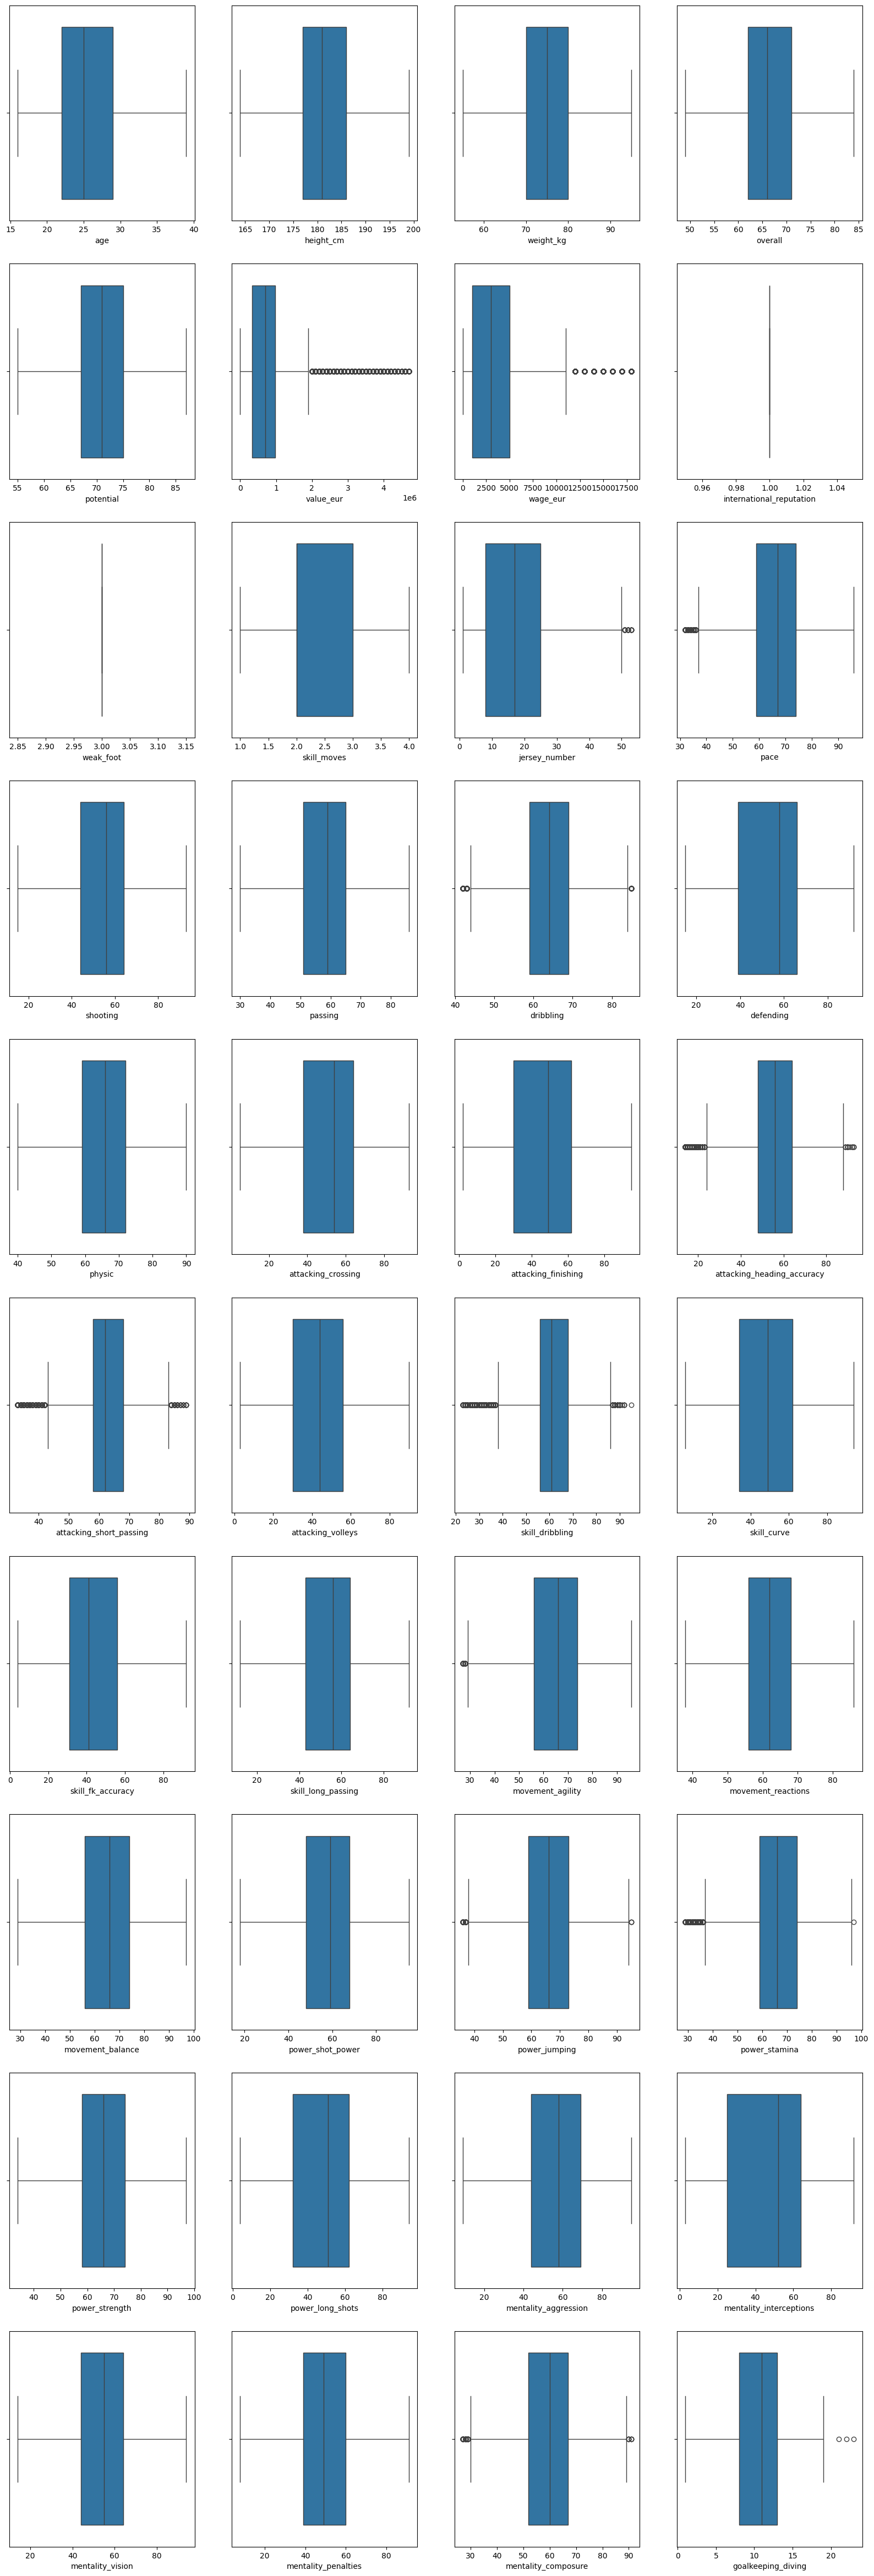

In [63]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for columns in data2:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(x=columns,data=data2)
        plotnumber+=1
plt.show()

categorical columns important features

In [64]:
cat_cols1 = cat_cols.iloc[:, 4:]
cat_cols1=pd.concat([cat_cols1,num_cols['overall']],axis=1)
cat_cols1.head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type real_face team_position    ls    st    rs    lw  \
0     Medium/Low       Messi       Yes            RW  89+2  89+2  89+2  93+2   
1       High/Low  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3   
2    High/Medium      Neymar       Yes           CAM  84+3  84+3  84+3  90+3   
3  Medium/Medium      Normal       Yes            GK     0     0     0     0   
4    High/Medium      Normal       Yes            LW  83+3  83+3  83+3  89+3   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   
1  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3   
2  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  overall  
0  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2     66.0  
1  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3     66.0  
2  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3     66.0  
3     0     0     0     0     0     0     0     0     0     0     66.0  
4  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3     66.0

Our Stategies to handle the categorical features:

We will rename the short form columns like 'ls', 'st' to their full form for our better understanding.

We see that in these various postions columns the values given are for example 89+2. Here 89 is the overall rating and 89+2=91 is the potential rating.

We will derive the values as the first part of the value as overall and the second part of the value after '+' sign as potential value.

In [65]:
positions = {'ls': 'Left Striker',
                    'st': 'Striker',
                    'rs': 'Right Striker',
                    'lw': 'Left Winger',
                    'lf': 'Left Forward',
                    'cf': 'Center Forward',
                    'rf': 'Right Forward',
                    'rw': 'Right Winger',
                    'lam': 'Left Attacking Midfielder',
                    'cam': 'Center Attacking Midfielder',
                    'ram': 'Right Attacking Midfielder',
                    'lm': 'Left Midfielder',
                    'lcm': 'Left Center Midfielder',
                    'cm': 'Center Midfielder',
                    'rcm': 'Right Center Midfielder',
                    'rm': 'Right Midfielder',
                    'lwb': 'Left Wing Back',
                    'ldm': 'Left Defensive Midfielder',
                    'cdm': 'Center Defensive Midfielder',
                    'rdm': 'Right Defensive Midfielder',
                    'rwb': 'Right Wing Back',
                    'lb': 'Left Back',
                    'lcb': 'Left Center Back',
                    'cb': 'Center Back',
                    'rcb': 'Right Center Back',
                    'rb': 'Right Back'}

cat_cols1 = cat_cols1.rename(columns=positions)

Handing the various postions columns with its overall + potential rating in our dataset

In [66]:
# Define the position columns to split
pos_cols = ['Left Striker', 'Striker', 'Right Striker', 'Left Winger', 'Left Forward','Center Forward', 'Right Forward',
             'Right Winger', 'Left Attacking Midfielder','Center Attacking Midfielder', 'Right Attacking Midfielder',
             'Left Midfielder','Left Center Midfielder', 'Center Midfielder', 'Right Center Midfielder',
             'Right Midfielder', 'Left Wing Back', 'Left Defensive Midfielder','Center Defensive Midfielder',
             'Right Defensive Midfielder', 'Right Wing Back','Left Back', 'Left Center Back', 'Center Back',
             'Right Center Back', 'Right Back']

# Split the position columns into separate columns for overall and potential ratings
for col in pos_cols:
    cat_cols1[[col+'_overall', col+'_potential']] = cat_cols1[col].str.split('+', expand=True)

    # Convert the new columns to numeric data types
    cat_cols1[col+'_overall'] = pd.to_numeric(cat_cols1[col+'_overall'])
    cat_cols1[col+'_potential'] = pd.to_numeric(cat_cols1[col+'_potential'])
    cat_cols1[col+'_potential'] = cat_cols1[col+'_overall'] + cat_cols1[col+'_potential']

# Drop the original position columns
cat_cols1.drop(pos_cols, axis=1, inplace=True)

In [67]:
cat_cols1.head(2)

nationality          club player_positions preferred_foot   work_rate  \
0   Argentina  FC Barcelona       RW, CF, ST           Left  Medium/Low   
1    Portugal      Juventus           ST, LW          Right    High/Low   

    body_type real_face team_position  overall  Left Striker_overall  \
0       Messi       Yes            RW     66.0                  89.0   
1  C. Ronaldo       Yes            LW     66.0                  91.0   

   Left Striker_potential  Striker_overall  Striker_potential  \
0                    91.0             89.0               91.0   
1                    94.0             91.0               94.0   

   Right Striker_overall  Right Striker_potential  Left Winger_overall  \
0                   89.0                     91.0                 93.0   
1                   91.0                     94.0                 89.0   

   Left Winger_potential  Left Forward_overall  Left Forward_potential  \
0                   95.0                  93.0                    95.0   
1                   92.0                  90.0                    93.0   

   Center Forward_overall  Center Forward_potential  Right Forward_overall  \
0                    93.0                      95.0                   93.0   
1                    90.0                      93.0                   90.0   

   Right Forward_potential  Right Winger_overall  Right Winger_potential  \
0                     95.0                  93.0                    95.0   
1                     93.0                  89.0                    92.0   

   Left Attacking Midfielder_overall  Left Attacking Midfielder_potential  \
0                               93.0                                 95.0   
1                               88.0                                 91.0   

   Center Attacking Midfielder_overall  Center Attacking Midfielder_potential  \
0                                 93.0                                   95.0   
1                                 88.0                                   91.0   

   Right Attacking Midfielder_overall  Right Attacking Midfielder_potential  \
0                                93.0                                  95.0   
1                                88.0                                  91.0   

   Left Midfielder_overall  Left Midfielder_potential  \
0                     92.0                       94.0   
1                     88.0                       91.0   

   Left Center Midfielder_overall  Left Center Midfielder_potential  \
0                            87.0                              89.0   
1                            81.0                              84.0   

   Center Midfielder_overall  Center Midfielder_potential  \
0                       87.0                         89.0   
1                       81.0                         84.0   

   Right Center Midfielder_overall  Right Center Midfielder_potential  \
0                             87.0                               89.0   
1                             81.0                               84.0   

   Right Midfielder_overall  Right Midfielder_potential  \
0                      92.0                        94.0   
1                      88.0                        91.0   

   Left Wing Back_overall  Left Wing Back_potential  \
0                    68.0                      70.0   
1                    65.0                      68.0   

   Left Defensive Midfielder_overall  Left Defensive Midfielder_potential  \
0                               66.0                                 68.0   
1                               61.0                                 64.0   

   Center Defensive Midfielder_overall  Center Defensive Midfielder_potential  \
0                                 66.0                                   68.0   
1                                 61.0                                   64.0   

   Right Defensive Midfielder_overall  Right Defensive Midfielder_potential  \
0                                66.0             

We will fill the missing values with median of overall rating and median of potential rating

In [68]:
for i in cat_cols1:
    if 'overall' in i:
        cat_cols1[i] = cat_cols1[i].fillna(data['overall'].median())
    elif 'potential' in i:
        cat_cols1[i] = cat_cols1[i].fillna(data['potential'].median())

In [69]:
cat_cols1.body_type.value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: body_type, dtype: int64

Fixing the body_type feature in our dataset

In [70]:
list1 = ['Normal','Lean','Stocky']

for i in cat_cols1['body_type']:
    if i not in list1:
        cat_cols1['body_type'] = cat_cols1['body_type'].replace(i,cat_cols1.body_type.mode().values[0])

In [71]:
find_missing(cat_cols1)

'There are no null values'

In [72]:
cat_cols_le = cat_cols1.copy()

Encoding the categorical columns with label encoder to convert to numeric

In [73]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to label encode
le_cols = ['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position']

# Loop through the categorical columns and apply label encoding
for col in le_cols:
    le = LabelEncoder()
    cat_cols_le[col] = le.fit_transform(cat_cols_le[col].astype(str))

cat_cols_le.head(2)

nationality  club  player_positions  preferred_foot  work_rate  body_type  \
0            5   224               544               0          7          1   
1          121   350               620               1          1          1   

   real_face  team_position  overall  Left Striker_overall  \
0          1             25     66.0                  89.0   
1          1             14     66.0                  91.0   

   Left Striker_potential  Striker_overall  Striker_potential  \
0                    91.0             89.0               91.0   
1                    94.0             91.0               94.0   

   Right Striker_overall  Right Striker_potential  Left Winger_overall  \
0                   89.0                     91.0                 93.0   
1                   91.0                     94.0                 89.0   

   Left Winger_potential  Left Forward_overall  Left Forward_potential  \
0                   95.0                  93.0                    95.0   
1                   92.0                  90.0                    93.0   

   Center Forward_overall  Center Forward_potential  Right Forward_overall  \
0                    93.0                      95.0                   93.0   
1                    90.0                      93.0                   90.0   

   Right Forward_potential  Right Winger_overall  Right Winger_potential  \
0                     95.0                  93.0                    95.0   
1                     93.0                  89.0                    92.0   

   Left Attacking Midfielder_overall  Left Attacking Midfielder_potential  \
0                               93.0                                 95.0   
1                               88.0                                 91.0   

   Center Attacking Midfielder_overall  Center Attacking Midfielder_potential  \
0                                 93.0                                   95.0   
1                                 88.0                                   91.0   

   Right Attacking Midfielder_overall  Right Attacking Midfielder_potential  \
0                                93.0                                  95.0   
1                                88.0                                  91.0   

   Left Midfielder_overall  Left Midfielder_potential  \
0                     92.0                       94.0   
1                     88.0                       91.0   

   Left Center Midfielder_overall  Left Center Midfielder_potential  \
0                            87.0                              89.0   
1                            81.0                              84.0   

   Center Midfielder_overall  Center Midfielder_potential  \
0                       87.0                         89.0   
1                       81.0                         84.0   

   Right Center Midfielder_overall  Right Center Midfielder_potential  \
0                             87.0                               89.0   
1                             81.0                               84.0   

   Right Midfielder_overall  Right Midfielder_potential  \
0                      92.0                        94.0   
1                      88.0                        91.0   

   Left Wing Back_overall  Left Wing Back_potential  \
0                    68.0                      70.0   
1                    65.0                      68.0   

   Left Defensive Midfielder_overall  Left Defensive Midfielder_potential  \
0                               66.0                                 68.0   
1                               61.0                                 64.0   

   Center Defensive Midfielder_overall  Center Defensive Midfielder_potential  \
0                                 66.0                                   68.0   
1                                 61.0                                   64.0   

   Right Defensive Midfielder_overall  Right Defensive Midfielder_potential  \
0                                66.0                             

In [74]:
cat_cols_le.corr()["overall"].sort_values()[45:-1]

Right Forward_overall                  0.553702
Left Striker_overall                   0.566713
Striker_overall                        0.566713
Right Striker_overall                  0.566713
Center Attacking Midfielder_overall    0.568854
Right Attacking Midfielder_overall     0.568854
Left Attacking Midfielder_overall      0.568854
Right Midfielder_overall               0.572928
Left Midfielder_overall                0.572928
Left Center Midfielder_potential       0.624681
Center Midfielder_potential            0.624681
Right Center Midfielder_potential      0.624681
Left Center Midfielder_overall         0.654892
Center Midfielder_overall              0.654892
Right Center Midfielder_overall        0.654892
Name: overall, dtype: float64

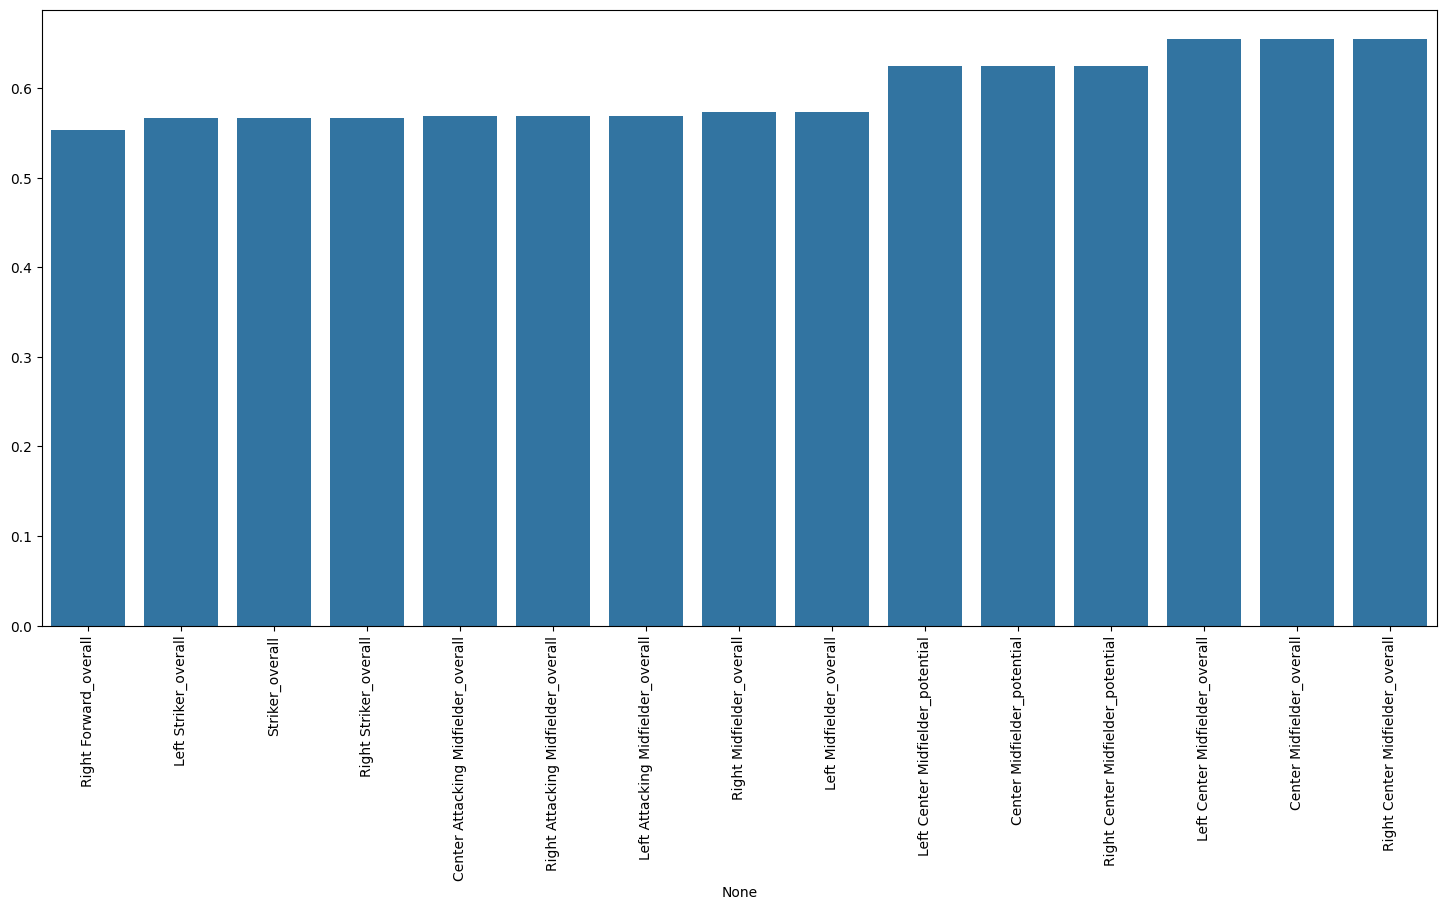

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(x= cat_cols_le.corr()["overall"].sort_values()[45:-1].index,y = cat_cols_le.corr()["overall"].sort_values()[45:-1].values)
plt.xticks(rotation = 90);

Our Insights:

Here we have captured that the features like 'Right Center Midfielder and Center Midfielder are highly correlated with overall rating of the players.

We need to take into account these important features when we are building our team

Removing Highly correlated data for categorical features

In [76]:
cor_matrix = cat_cols1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cat_cols2 = cat_cols1.drop(to_drop, axis=1)

In [77]:
cat_cols2.shape

(18278, 14)

Handling Outliers of Categorical features

In [78]:
cat_cols2

nationality                           club player_positions  \
0       Argentina                   FC Barcelona       RW, CF, ST   
1        Portugal                       Juventus           ST, LW   
2          Brazil            Paris Saint-Germain          LW, CAM   
3        Slovenia                Atlético Madrid               GK   
4         Belgium                    Real Madrid           LW, CF   
...           ...                            ...              ...   
18273    China PR               Beijing Renhe FC               CB   
18274    China PR               Shanghai SIPG FC               CB   
18275    China PR         Hebei China Fortune FC               CM   
18276    China PR  Shanghai Greenland Shenhua FC               CM   
18277    China PR         Hebei China Fortune FC               CM   

      preferred_foot      work_rate body_type real_face team_position  \
0               Left     Medium/Low    Normal       Yes            RW   
1              Right       High/Low    Normal       Yes            LW   
2              Right    High/Medium    Normal       Yes           CAM   
3              Right  Medium/Medium    Normal       Yes            GK   
4              Right    High/Medium    Normal       Yes            LW   
...              ...            ...       ...       ...           ...   
18273          Right    Medium/High    Normal        No           RES   
18274          Right  Medium/Medium    Normal        No           SUB   
18275          Right     Low/Medium      Lean        No           SUB   
18276          Right        Low/Low      Lean        No           SUB   
18277          Right  Medium/Medium    Normal        No           SUB   

       overall  Left Striker_overall  Left Winger_overall  \
0         66.0                  89.0                 93.0   
1         66.0                  91.0                 89.0   
2         66.0                  84.0                 90.0   
3         66.0                  66.0                 66.0   
4         66.0                  83.0                 89.0   
...        ...                   ...                  ...   
18273     66.0                  32.0                 31.0   
18274     66.0                  33.0                 33.0   
18275     66.0                  43.0                 43.0   
18276     66.0                  43.0                 45.0   
18277     66.0                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                87.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            33.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 14 columns]

In [79]:
CR = cat_cols2.drop(['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate',
                      'body_type', 'real_face', 'team_position','overall'],axis =1)

CR

Left Striker_overall  Left Winger_overall  \
0                      89.0                 93.0   
1                      91.0                 89.0   
2                      84.0                 90.0   
3                      66.0                 66.0   
4                      83.0                 89.0   
...                     ...                  ...   
18273                  32.0                 31.0   
18274                  33.0                 33.0   
18275                  43.0                 43.0   
18276                  43.0                 45.0   
18277                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                87.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            33.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 5 columns]

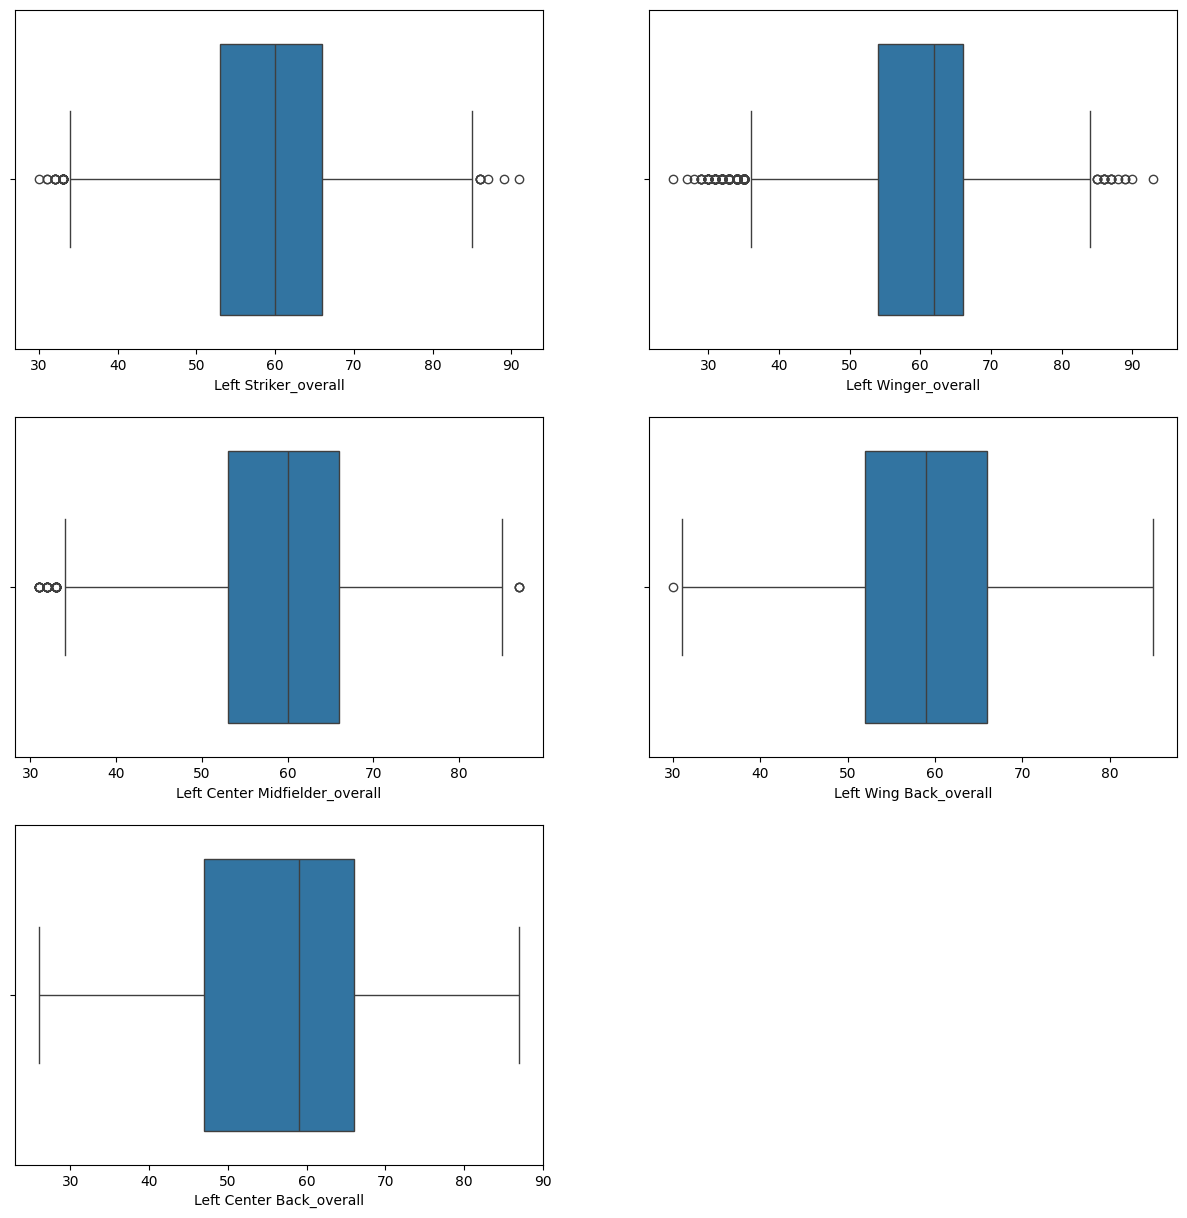

In [80]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
  if plotnumber<=5:
    ax=plt.subplot(3,2,plotnumber)
    sns.boxplot(x=columns, data=CR)
    plotnumber+=1
plt.show()

In [81]:
handle_outliers(CR)

Left Striker_overall  Left Winger_overall  \
0                      60.0                 62.0   
1                      60.0                 62.0   
2                      84.0                 62.0   
3                      66.0                 66.0   
4                      83.0                 62.0   
...                     ...                  ...   
18273                  60.0                 62.0   
18274                  60.0                 62.0   
18275                  43.0                 43.0   
18276                  43.0                 45.0   
18277                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                60.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            60.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 5 columns]

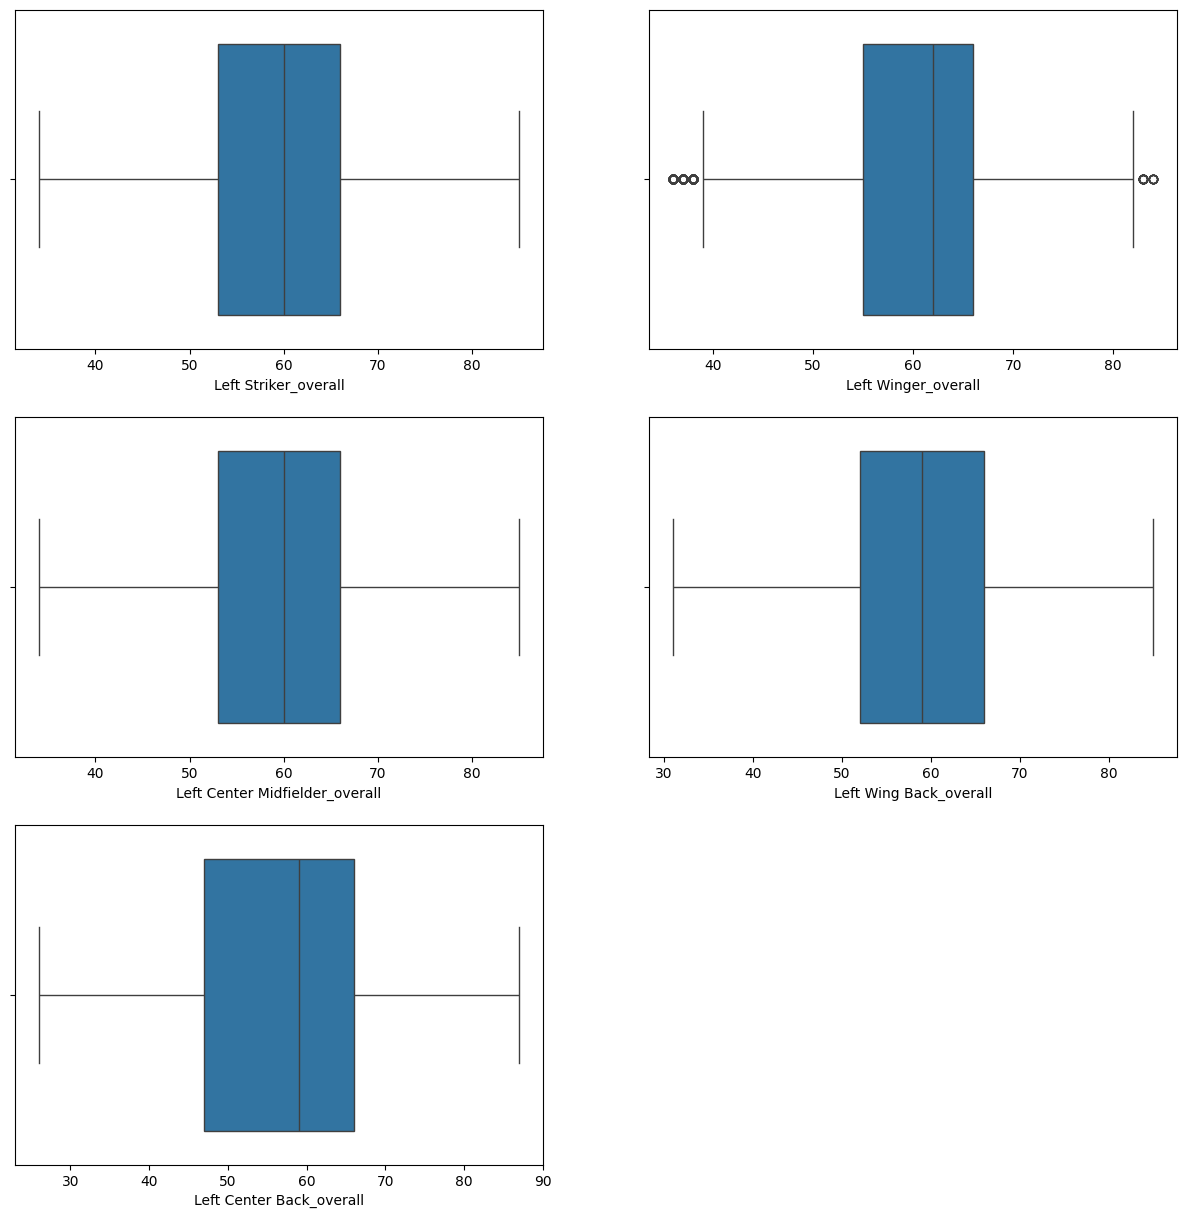

In [82]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
  if plotnumber<=5:
    ax=plt.subplot(3,2,plotnumber)
    sns.boxplot(x=columns, data=CR)
    plotnumber+=1
plt.show()

In [83]:
cat_cols2 = cat_cols2[le_cols]

### One Hot Encoding

In [84]:
cat_cols2=pd.get_dummies(cat_cols2,drop_first=True)

In [85]:
data2.shape

(18278, 40)

In [86]:
cat_cols2.shape

(18278, 1540)

In [87]:
CR.shape

(18278, 5)

In [88]:
final_data2 = pd.concat([data2,cat_cols2,CR],axis=1)
final_data2.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  32.0      170.0       72.0     66.0       71.0   700000.0    3000.0   
1  34.0      187.0       83.0     66.0       71.0   700000.0    3000.0   
2  27.0      175.0       68.0     66.0       71.0   700000.0    3000.0   
3  26.0      188.0       87.0     66.0       71.0   700000.0    3000.0   
4  28.0      175.0       74.0     66.0       71.0   700000.0    3000.0   

   international_reputation  weak_foot  skill_moves  jersey_number  pace  \
0                       1.0        3.0          4.0           10.0  87.0   
1                       1.0        3.0          2.0            7.0  90.0   
2                       1.0        3.0          2.0           10.0  91.0   
3                       1.0        3.0          1.0            1.0  52.0   
4                       1.0        3.0          4.0           10.0  91.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     59.0       64.0       39.0    66.0                88.0   
1      93.0     82.0       64.0       35.0    78.0                84.0   
2      85.0     59.0       64.0       32.0    58.0                87.0   
3      78.0     59.0       64.0       89.0    66.0                13.0   
4      83.0     86.0       64.0       35.0    66.0                81.0   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                 95.0                        70.0                     62.0   
1                 94.0                        89.0                     83.0   
2                 87.0                        62.0                     87.0   
3                 11.0                        15.0                     43.0   
4                 84.0                        61.0                     89.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0               88.0             61.0         93.0               41.0   
1               87.0             89.0         81.0               76.0   
2               87.0             61.0         88.0               87.0   
3               13.0             61.0         13.0               14.0   
4               83.0             95.0         83.0               79.0   

   skill_long_passing  movement_agility  movement_reactions  movement_balance  \
0                92.0              93.0                62.0              95.0   
1                77.0              87.0                62.0              71.0   
2                81.0              96.0                62.0              84.0   
3                40.0              67.0                62.0              49.0   
4                83.0              95.0                62.0              94.0   

   power_shot_power  power_jumping  power_stamina  power_strength  \
0              86.0           68.0           75.0            68.0   
1              95.0           95.0           85.0            78.0   
2              80.0           61.0           81.0            49.0   
3              59.0           78.0           41.0            78.0   
4              82.0           56.0           84.0            63.0   

   power_long_shots  mentality_aggression  mentality_interceptions  \
0              94.0                  48.0                     40.0   
1              93.0                  63.0                     29.0   
2              84.0                  51.0                     36.0   
3              12.0                  34.0                     19.0   
4              80.0                  54.0                     41.0   

   mentality_vision  mentality_penalties  mentality_composure  \
0              94.0                 75.0                 60.0   
1              82.0                 85.0                 60.0   
2              90.0                 90.0                 60.0   
3              65.0                 11.0                 68.0   
4              89.0                 88.0                 91.0   

   goalkeeping_diving  nation

In [89]:
final_data2.shape

(18278, 1585)

We have now converted our dataset into features with only numerical data, so that it can be ready to be fed into a machine learning model.

However since we will be doing distance based algorithms like K-Means Clustering so it is a must to scale our data.

### Scaling Our Data

In [90]:
from sklearn.preprocessing import MinMaxScaler
SC= MinMaxScaler()
scaled_data=pd.DataFrame(SC.fit_transform(final_data2),columns= final_data2.columns)

In [91]:
scaled_data

age  height_cm  weight_kg   overall  potential  value_eur  \
0      0.695652   0.171429      0.425  0.485714    0.50000   0.148936   
1      0.782609   0.657143      0.700  0.485714    0.50000   0.148936   
2      0.478261   0.314286      0.325  0.485714    0.50000   0.148936   
3      0.434783   0.685714      0.800  0.485714    0.50000   0.148936   
4      0.521739   0.314286      0.475  0.485714    0.50000   0.148936   
...         ...        ...        ...       ...        ...        ...   
18273  0.260870   0.628571      0.600  0.485714    0.03125   0.008511   
18274  0.260870   0.371429      0.275  0.485714    0.03125   0.008511   
18275  0.130435   0.628571      0.500  0.485714    0.03125   0.008511   
18276  0.086957   0.600000      0.475  0.485714    0.50000   0.008511   
18277  0.434783   0.514286      0.575  0.485714    0.50000   0.008511   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0      0.166667                       0.0        0.0     1.000000   
1      0.166667                       0.0        0.0     0.333333   
2      0.166667                       0.0        0.0     0.333333   
3      0.166667                       0.0        0.0     0.000000   
4      0.166667                       0.0        0.0     1.000000   
...         ...                       ...        ...          ...   
18273  0.111111                       0.0        0.0     0.333333   
18274  0.111111                       0.0        0.0     0.333333   
18275  0.055556                       0.0        0.0     0.333333   
18276  0.055556                       0.0        0.0     0.333333   
18277  0.111111                       0.0        0.0     0.333333   

       jersey_number      pace  shooting   passing  dribbling  defending  \
0           0.173077  0.859375  0.987179  0.517857   0.511628   0.311688   
1           0.115385  0.906250  1.000000  0.928571   0.511628   0.259740   
2           0.173077  0.921875  0.897436  0.517857   0.511628   0.220779   
3           0.000000  0.312500  0.807692  0.517857   0.511628   0.961039   
4           0.173077  0.921875  0.871795  1.000000   0.511628   0.259740   
...              ...       ...       ...       ...        ...        ...   
18273       0.673077  0.390625  0.102564  0.517857   0.511628   0.415584   
18274       0.576923  0.406250  0.115385  0.053571   0.511628   0.428571   
18275       0.711538  0.343750  0.256410  0.250000   0.069767   0.428571   
18276       0.615385  0.421875  0.256410  0.303571   0.116279   0.389610   
18277       0.692308  0.437500  0.217949  0.375000   0.069767   0.415584   

       physic  attacking_crossing  attacking_finishing  \
0        0.52            0.943182             1.000000   
1        0.76            0.897727             0.989247   
2        0.36            0.931818             0.913978   
3        0.52            0.090909             0.096774   
4        0.52            0.863636             0.881720   
...       ...                 ...                  ...   
18273    0.22            0.181818             0.161290   
18274    0.16            0.215909             0.193548   
18275    0.22            0.306818             0.333333   
18276    0.24            0.386364             0.344086   
18277    0.30            0.443182             0.301075   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                        0.708861                 0.517857           0.977011   
1                        0.949367                 0.892857           0.965517   
2                        0.607595                 0.964286           0.965517   
3                        0.012658                 0.178571           0.114943   
4                        0.594937                 1.000000           0.919540   
...                           ...                      ...                ...   
18273                    0.329114                 0.035714           0.275862   
18274                    0.354430               

### Principal Component Analysis

Since we've got 1585 columns after one hot encoding, we need to reduce that by doing principal component analysis.

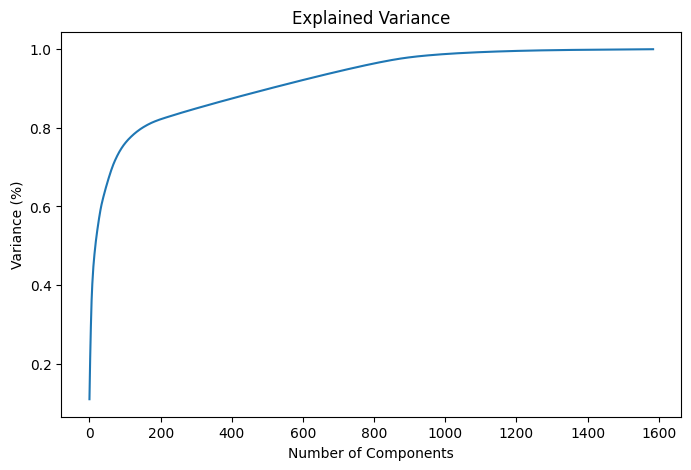

In [92]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [93]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# find the number of components that add up to 95% of the explained variance ratio
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

print("Components more than 95% of the explained variance ratio: ", n_components)

Components more than 95% of the explained variance ratio:  732


In [94]:
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(final_data2)

In [95]:
pca_df = pd.DataFrame(new_data, columns=["PC{}".format(i+1) for i in range (n_components)])
pca_df

PC1          PC2         PC3        PC4        PC5  \
0     -207258.107200  -483.813059 -125.799226 -17.455282  -1.230137   
1     -207258.106732  -483.746359 -135.325281  -8.087171  17.233450   
2     -207258.107104  -483.801720 -135.426985 -26.970312   8.853055   
3     -207258.110232  -484.182823   82.598881 -13.922529  62.714797   
4     -207258.106807  -483.759214 -138.424226 -17.211171  31.048601   
...              ...          ...         ...        ...        ...   
18273 -867258.818371  -227.356563   69.442998 -11.812267 -24.604448   
18274 -867258.818400  -227.363823   63.793709 -13.169559 -37.705848   
18275 -867260.722317 -1227.294493   40.723217  -3.497571 -30.613916   
18276 -867260.722117 -1227.269106   31.255213  -0.762938 -28.525008   
18277 -867258.817735  -227.274347   34.137000   1.376478 -29.594247   

             PC6        PC7        PC8        PC9       PC10       PC11  \
0       6.289115 -10.743917  -4.083092   3.457554  -3.736491  17.921789   
1      41.044264 -23.477669   0.661150  -6.141907  -8.532200 -10.985165   
2      -3.893450   2.970682   2.171609  -9.991104  -7.780302   3.956862   
3       2.714999  -9.764465 -32.737078   5.483988  22.701722   1.277800   
4      -2.625768  -5.984960   2.657970  -7.428825 -11.306032  10.636744   
...          ...        ...        ...        ...        ...        ...   
18273 -16.604558   2.098985   1.167463  12.699570  13.390634  -7.091133   
18274 -23.755079   6.049802  -3.634656  14.881458   7.879256  -4.613694   
18275  -6.514631  23.056979  10.404156  11.894486   4.468336   3.281381   
18276 -10.288748  23.074018   4.139448  11.792808   2.063643  -2.199036   
18277 -14.728244  22.003634   3.694537  15.865528   1.362919  -2.220473   

            PC12       PC13       PC14       PC15       PC16       PC17  \
0      -0.251718   0.296452  29.717255 -13.931117  -2.057447  18.411080   
1     -11.423820 -15.705772  10.268158 -25.791770  -7.717621   3.066190   
2     -20.716293  -6.285879   2.112912  -6.676707   5.270814  -3.806440   
3      20.516795  -8.744527  12.586911  -5.919254  16.212382  -5.734933   
4      -3.335522 -13.605631  -4.339230   6.905057   9.157657   8.806132   
...          ...        ...        ...        ...        ...        ...   
18273 -12.983149   0.958930  -4.489246  13.156040  -6.994499  -1.156062   
18274 -19.351999   4.453425  -1.762553   6.422057  -7.542755  -1.139578   
18275  -2.893808  -4.667704   0.844078  -6.750232   0.206008  -3.612464   
18276   7.400105  -2.154846  -3.334660  -7.649262   2.844421  -7.110008   
18277  10.669194 -11.011210  -0.187500  -5.948107  -0.663451   6.129343   

            PC18      PC19      PC20      PC21       PC22       PC23  \
0     -10.064604  2.004798  0.086580  7.132268  32.014725  13.019284   
1      12.704799  3.880862 -8.269860 -7.646666   9.994127   9.082507   
2      10.644885  5.427886 -5.068720 -7.540635  12.071455  16.427910   
3      -7.210179  7.997313  8.564962  4.997727   5.550271  10.252148   
4       8.015101 -1.902177 -5.160578 -7.205282   3.713598   8.741771   
...          ...       ...       ...       ...        ...        ...   
18273   0.838743 -5.608956 -1.047838  3.478699   5.348937   9.936899   
18274   3.313133 -8.688405 -6.697631  4.071260  -2.976364   5.346182   
18275  -1.415055 -2.940756  0.470273 -6.835929   2.619075   6.610803   
18276   2.171659  1.356306 -0.098788  4.734058  -0.047905   1.420882   
18277   7.011319 -0.105824 -1.811666  8.561647   0.065577   4.924243   

            PC24       PC25       PC26       PC27       PC28      PC29  \
0      -2.586452 -17.374093  -3.371431  -7.176769 -14.805740 -2.137243   
1      -2.324629   0.870459   0.327349   5.661142  -7.908363 -8.122753   
2      -5.069137 -11.010245 -13.524761  10.292573  -9.214861 -4.691702   
3      -6.436207  -3.286891  16.549149   6.294334  -6.155404 -5.302524   
4     -21.559606   0.247743   6.319115  10.697864  -6.503173 -7.866625   
...          ...        ...        ...        ...    

# Model Building

### K-Means Clustering using Elbow Method
Using elbow method we will first find out the optimal number of n_cluster for our K-Means Clustering algorithoms

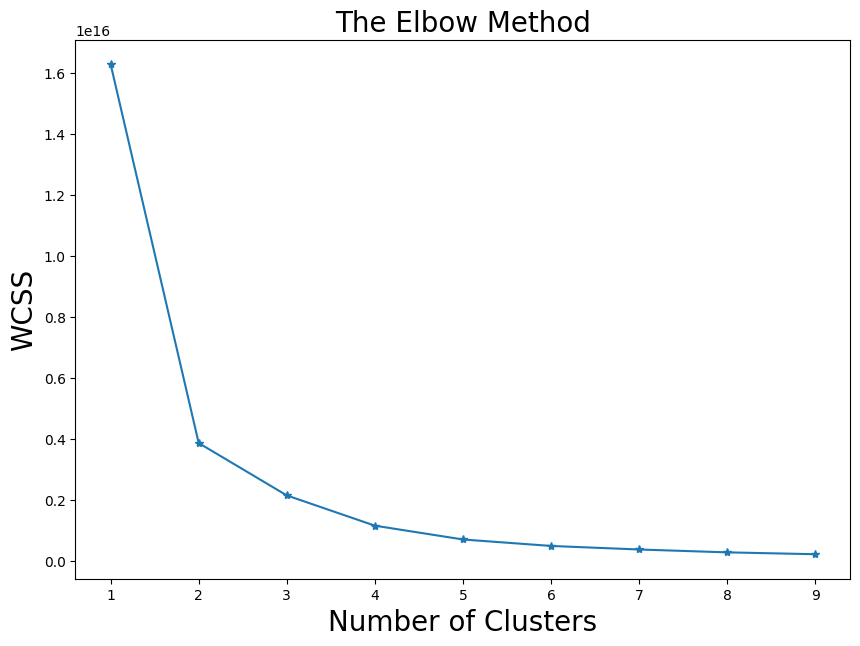

In [96]:
from sklearn.cluster import KMeans

X = pca_df
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,7))
plt.plot(range(1,10), wcss, marker = '*')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)
plt.show()

### K-Means Clustering using Silhouette score

In [97]:
from sklearn.metrics import silhouette_score

for i in range(2,6):
  model = KMeans(n_clusters = i, random_state = 42)
  model.fit(X)
  label = model.labels_
  label

  score = silhouette_score(X, label)
  print('for cluster {}, Silhouette score is = {}'.format(i, round(score,2)))

for cluster 2, Silhouette score is = 0.79
for cluster 3, Silhouette score is = 0.65
for cluster 4, Silhouette score is = 0.59
for cluster 5, Silhouette score is = 0.62


### K-Means Clustering using Davis Bouldin Score

In [98]:
from sklearn.metrics import davies_bouldin_score

for i in range(2,6):
  model = KMeans(n_clusters = i)
  model.fit(X)
  labels = model.labels_
  score = davies_bouldin_score(X, labels)
  print('for cluster {}, Devin Bouldin score is = {}'.format(i, round(score,2)))

for cluster 2, Devin Bouldin score is = 0.4
for cluster 3, Devin Bouldin score is = 0.51
for cluster 4, Devin Bouldin score is = 0.52
for cluster 5, Devin Bouldin score is = 0.47


we select n_cluster = 2 based on the results from elbow method, silhoutte score and davies bouldin score

In [99]:
final_kmeans_model = KMeans(n_clusters=2, random_state=42)
cluster_labels = final_kmeans_model.fit_predict(X)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [100]:
# count the number of data points in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()

print(cluster_counts)

0    15976
1     2302
dtype: int64


Here we can see two labels, which are 0 and 1

so we put the clusters in our dataset

In [101]:
final_data2['Cluster'] = cluster_labels
final_data2[final_data2['Cluster'] == 1]

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
200   25.0      192.0       92.0     83.0       83.0  2600000.0    3000.0   
201   38.0      185.0       84.0     83.0       83.0  2600000.0   11000.0   
286   36.0      188.0       92.0     82.0       82.0  3700000.0    3000.0   
489   35.0      188.0       83.0     80.0       80.0  4000000.0   17000.0   
491   35.0      174.0       73.0     80.0       80.0  4700000.0   13000.0   
...    ...        ...        ...      ...        ...        ...       ...   
6639  19.0      180.0       70.0     68.0       83.0  1900000.0    2000.0   
6643  21.0      180.0       73.0     68.0       82.0  2000000.0   12000.0   
6646  19.0      178.0       74.0     68.0       82.0  1900000.0    1000.0   
6648  20.0      173.0       63.0     68.0       82.0  2000000.0    3000.0   
6651  19.0      176.0       70.0     68.0       82.0  1900000.0    7000.0   

      international_reputation  weak_foot  skill_moves  jersey_number  pace  \
200                        1.0        3.0          1.0           17.0  33.0   
201                        1.0        3.0          1.0            1.0  55.0   
286                        1.0        3.0          1.0           25.0  57.0   
489                        1.0        3.0          1.0           13.0  39.0   
491                        1.0        3.0          2.0           14.0  66.0   
...                        ...        ...          ...            ...   ...   
6639                       1.0        3.0          4.0           26.0  81.0   
6643                       1.0        3.0          4.0           29.0  80.0   
6646                       1.0        3.0          3.0           28.0  67.0   
6648                       1.0        3.0          3.0            9.0  67.0   
6651                       1.0        3.0          3.0           38.0  75.0   

      shooting  passing  dribbling  defending  physic  attacking_crossing  \
200       74.0     59.0       78.0       80.0    77.0                13.0   
201       61.0     86.0       85.0       84.0    75.0                13.0   
286       82.0     82.0       79.0       81.0    82.0                11.0   
489       81.0     80.0       84.0       79.0    74.0                11.0   
491       53.0     72.0       68.0       79.0    75.0                68.0   
...        ...      ...        ...        ...     ...                 ...   
6639      61.0     60.0       71.0       54.0    56.0                59.0   
6643      48.0     61.0       75.0       27.0    54.0                65.0   
6646      65.0     64.0       71.0       68.0    71.0                64.0   
6648      63.0     65.0       68.0       44.0    58.0                58.0   
6651      64.0     68.0       74.0       52.0    58.0                66.0   

      attacking_finishing  attacking_heading_accuracy  \
200                  15.0                        56.0   
201                  12.0                        25.0   
286                  14.0                        56.0   
489                  11.0                        56.0   
491                  42.0                        66.0   
...                   ...                         ...   
6639                 59.0                        39.0   
6643                 47.0                        37.0   
6646                 64.0                        68.0   
6648                 65.0                        49.0   
6651                 62.0                        62.0   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
200                      37.0               17.0             26.0   
201                      62.0               14.0             25.0   
286                      62.0               11.0             61.0   
489                      62.0               13.0             61.0   
491                      79.0               51.0             58.0   
...                       ...                ...              ...   
6639                     63.0           

#### player who has greater potential rating

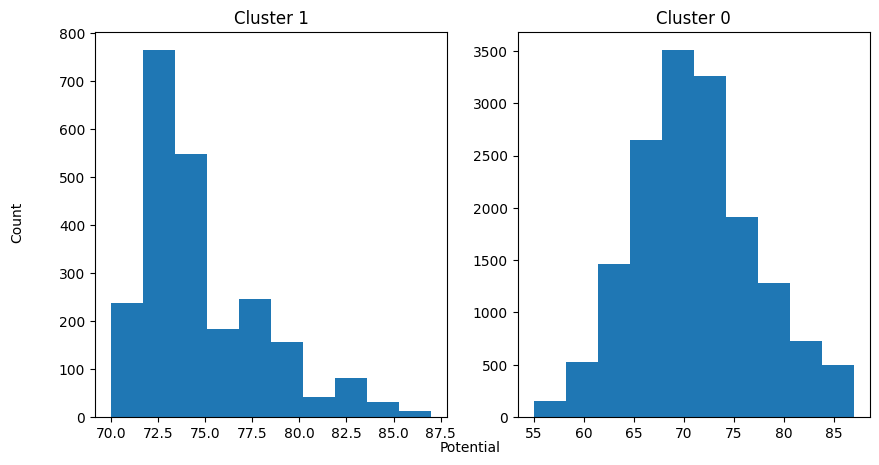

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(final_data2[final_data2['Cluster']==1]['potential'], bins = 10)
axs[0].set_title('Cluster 1')

axs[1].hist(final_data2[final_data2['Cluster']==0]['potential'], bins=10)
axs[1].set_title('Cluster 0')

fig.text(0.5, 0.04, 'Potential', ha = 'center')
fig.text(0.04, 0.5, 'Count', va= 'center', rotation= 'vertical')

plt.show()

we can see that the cluster labeled 1 has more player with greater potential

#### Player who has greater overall rating

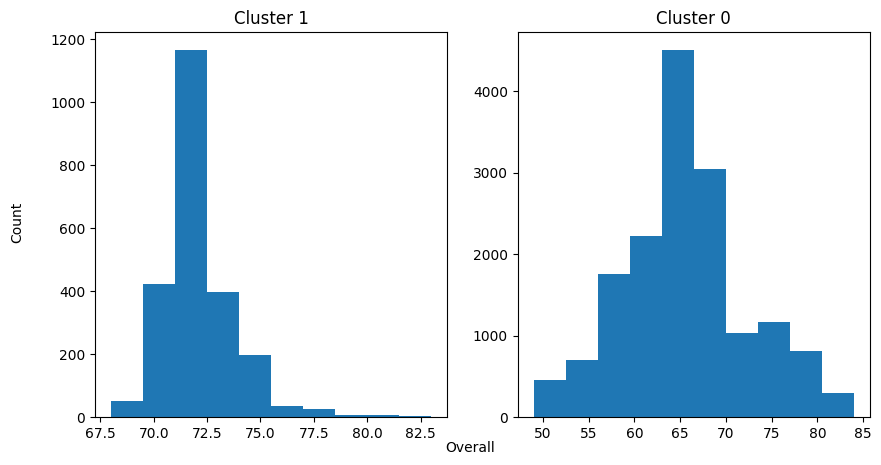

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(final_data2[final_data2['Cluster']==1]['overall'], bins = 10)
axs[0].set_title('Cluster 1')

axs[1].hist(final_data2[final_data2['Cluster']==0]['overall'], bins=10)
axs[1].set_title('Cluster 0')

fig.text(0.5, 0.04, 'Overall', ha = 'center')
fig.text(0.04, 0.5, 'Count', va= 'center', rotation= 'vertical')

plt.show()

here also cluster 1 has greater overall rating

### Features that are highly correlated with clusters

In [104]:
final_data2.corr()['Cluster'][:-2].sort_values()

team_position_RES          -0.099190
work_rate_Medium/Medium    -0.098829
jersey_number              -0.078149
team_position_SUB          -0.060494
nationality_England        -0.052665
                              ...   
overall                     0.322516
wage_eur                    0.377651
value_eur                   0.873302
international_reputation         NaN
weak_foot                        NaN
Name: Cluster, Length: 1584, dtype: float64

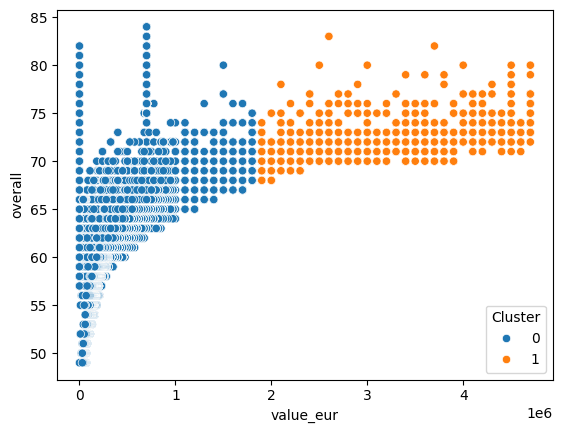

In [105]:
sns.scatterplot(data = final_data2, x = 'value_eur', y='overall', hue = 'Cluster');

We find that value_eur and overall rating are positively correlated to each other and as our overall rating and value_eur increases the chances of players being in cluster 1 is more.

### Ideal budget for competetive players

In [106]:
cat_cols1.drop('overall', axis = 1, inplace = True)

As we've got from our findings that cluster 1 have more potential and overall rating so we should take players from cluster 1 to form our team.

In [107]:
final_df = pd.concat([cat_cols1, num_cols, final_data2['Cluster']], axis = 1)
final_df = final_df[final_df['Cluster']==1]

In [108]:
final_df

nationality                    club player_positions preferred_foot  \
200         Italy                Juventus               GK          Right   
201         Spain                FC Porto               GK           Left   
286         Spain                   Milan               GK          Right   
489         Spain           Real Sociedad               GK          Right   
491     Argentina  Hebei China Fortune FC          CDM, CB          Right   
...           ...                     ...              ...            ...   
6639       Norway           FK Bodø/Glimt               RW           Left   
6643      England    West Bromwich Albion               RM           Left   
6646  Ivory Coast                 Perugia               CM          Right   
6648        Spain           Real Zaragoza          RM, CAM           Left   
6651      Nigeria                 Bologna      CM, CAM, CF          Right   

          work_rate body_type real_face team_position  Left Striker_overall  \
200   Medium/Medium    Normal       Yes           SUB                  66.0   
201   Medium/Medium    Normal       Yes           RES                  66.0   
286   Medium/Medium    Normal       Yes           SUB                  66.0   
489   Medium/Medium    Normal       Yes            GK                  66.0   
491        Low/High    Normal       Yes           CDM                  62.0   
...             ...       ...       ...           ...                   ...   
6639      High/High      Lean        No            RW                  61.0   
6643    High/Medium      Lean       Yes           SUB                  57.0   
6646    High/Medium    Normal        No           SUB                  67.0   
6648  Medium/Medium      Lean        No            RM                  64.0   
6651    High/Medium      Lean        No           SUB                  66.0   

      Left Striker_potential  Striker_overall  Striker_potential  \
200                     71.0             66.0               71.0   
201                     71.0             66.0               71.0   
286                     71.0             66.0               71.0   
489                     71.0             66.0               71.0   
491                     65.0             62.0               65.0   
...                      ...              ...                ...   
6639                    63.0             61.0               63.0   
6643                    59.0             57.0               59.0   
6646                    69.0             67.0               69.0   
6648                    66.0             64.0               66.0   
6651                    68.0             66.0               68.0   

      Right Striker_overall  Right Striker_potential  Left Winger_overall  \
200                    66.0                     71.0                 66.0   
201                    66.0                     71.0                 66.0   
286                    66.0                     71.0                 66.0   
489                    66.0                     71.0                 66.0   
491                    62.0                     65.0                 65.0   
...                     ...                      ...                  ...   
6639                   61.0                     63.0                 67.0   
6643                   57.0                     59.0                 66.0   
6646                   67.0                     69.0                 66.0   
6648                   64.0                     66.0                 66.0   
6651                   66.0                     68.0                 69.0   

      Left Winger_potential  Left Forward_overall  Left Forward_potential  \
200                    71.0                  66.0                    71.0   
201                    71.0                  66.0                    71.0   
286                    71.0                  66.0                    71.0   
489                    71.0                  66.0                    71.0   
491  

In [109]:
# Sorting values and bringing name of players back into our new dataset
final_df = final_df.sort_values(by=['value_eur', 'overall'], ascending=False)
final_df['Name'] = data['short_name']
final_df

nationality                    club player_positions  \
491            Argentina  Hebei China Fortune FC          CDM, CB   
563               Brazil              Fluminense          CDM, CM   
673             Slovakia                Atalanta               CB   
1146  Bosnia Herzegovina              Hertha BSC               ST   
1148             England      New York Red Bulls               ST   
...                  ...                     ...              ...   
6637            Scotland              Portsmouth      CDM, CB, RB   
6638               Wales           Oxford United      CAM, LW, ST   
6639              Norway           FK Bodø/Glimt               RW   
6646         Ivory Coast                 Perugia               CM   
6651             Nigeria                 Bologna      CM, CAM, CF   

     preferred_foot    work_rate body_type real_face team_position  \
491           Right     Low/High    Normal       Yes           CDM   
563           Right    High/High    Stocky        No           CDM   
673           Right  Medium/High    Normal       Yes           SUB   
1146          Right   Medium/Low    Normal        No            ST   
1148          Right  High/Medium    Normal       Yes           SUB   
...             ...          ...       ...       ...           ...   
6637          Right  Medium/High      Lean        No           RDM   
6638          Right  High/Medium    Normal       Yes           CAM   
6639           Left    High/High      Lean        No            RW   
6646          Right  High/Medium    Normal        No           SUB   
6651          Right  High/Medium      Lean        No           SUB   

      Left Striker_overall  Left Striker_potential  Striker_overall  \
491                   62.0                    65.0             62.0   
563                   66.0                    68.0             66.0   
673                   52.0                    55.0             52.0   
1146                  75.0                    77.0             75.0   
1148                  76.0                    78.0             76.0   
...                    ...                     ...              ...   
6637                  54.0                    56.0             54.0   
6638                  63.0                    65.0             63.0   
6639                  61.0                    63.0             61.0   
6646                  67.0                    69.0             67.0   
6651                  66.0                    68.0             66.0   

      Striker_potential  Right Striker_overall  Right Striker_potential  \
491                65.0                   62.0                     65.0   
563                68.0                   66.0                     68.0   
673                55.0                   52.0                     55.0   
1146               77.0                   75.0                     77.0   
1148               78.0                   76.0                     78.0   
...                 ...                    ...                      ...   
6637               56.0                   54.0                     56.0   
6638               65.0                   63.0                     65.0   
6639               63.0                   61.0                     63.0   
6646               69.0                   67.0                     69.0   
6651               68.0                   66.0                     68.0   

      Left Winger_overall  Left Winger_potential  Left Forward_overall  \
491                  65.0                   68.0                  64.0   
563                  70.0                   72.0                  69.0   
673                  47.0                   50.0                  48.0   
1146                 70.0                   72.0                  73.0   
1148                 72.0                   74.0                  74.0   
...                   ...                    ...                   ...   
6637                 56.0                   58.0                  55.0 

In [110]:
# columns selecting to find best players
df3 = final_df[["Name", "club", "team_position", "overall", "value_eur"]]
df3

Name                    club team_position  overall  \
491        J. Mascherano  Hebei China Fortune FC           CDM     80.0   
563       Everton Andrão              Fluminense           CDM     80.0   
673            M. Škrtel                Atalanta           SUB     79.0   
1146         V. Ibišević              Hertha BSC            ST     77.0   
1148  B. Wright-Phillips      New York Red Bulls           SUB     77.0   
...                  ...                     ...           ...      ...   
6637         R. McCrorie              Portsmouth           RDM     68.0   
6638         B. Woodburn           Oxford United           CAM     68.0   
6639            H. Evjen           FK Bodø/Glimt            RW     68.0   
6646            C. Kouan                 Perugia           SUB     68.0   
6651          K. Michael                 Bologna           SUB     68.0   

      value_eur  
491   4700000.0  
563   4700000.0  
673   4700000.0  
1146  4700000.0  
1148  4700000.0  
...         ...  
6637  1900000.0  
6638  1900000.0  
6639  1900000.0  
6646  1900000.0  
6651  1900000.0  

[2302 rows x 5 columns]

In [111]:
# positions required to fill to form a team

positions = ['GK', 'LB', 'CB', 'RB', 'CDM', 'CM', 'CAM', 'LW', 'ST', 'RW']

In [112]:
selected_players = pd.DataFrame(index = df3.index)

for i in positions:
  row = df3[df3['team_position'] == i].head(1)
  selected_players = selected_players.append(row)

selected_players = selected_players.dropna()
selected_players

Name                           club team_position  overall  \
1954   S. Grytebust                   FC København            GK     75.0   
2765       N. Murru                      Sampdoria            LB     73.0   
2769   H. Magnússon                PFC CSKA Moscow            CB     73.0   
2777      F. Campos                      Colo-Colo            RB     73.0   
491   J. Mascherano         Hebei China Fortune FC           CDM     80.0   
2880       M. Abeid                      FC Nantes            CM     73.0   
2919      P. Kasami                        FC Sion           CAM     73.0   
3359   S. Adegbenro                   Rosenborg BK            LW     72.0   
1146    V. Ibišević                     Hertha BSC            ST     77.0   
1546      G. Moreno  Shanghai Greenland Shenhua FC            RW     76.0   

      value_eur  
1954  4700000.0  
2765  4700000.0  
2769  4700000.0  
2777  4700000.0  
491   4700000.0  
2880  4300000.0  
2919  4600000.0  
3359  4600000.0  
1146  4700000.0  
1546  4700000.0

### Budget for our ideal team

In [113]:
print(f'Total budget for our ideal team is: {selected_players.value_eur.sum()}')

Total budget for our ideal team is: 46400000.0


### Hierarchical Clustering


#### Hierarchical Clustering with Average Linkage

In [114]:
names = data['short_name'].tolist()

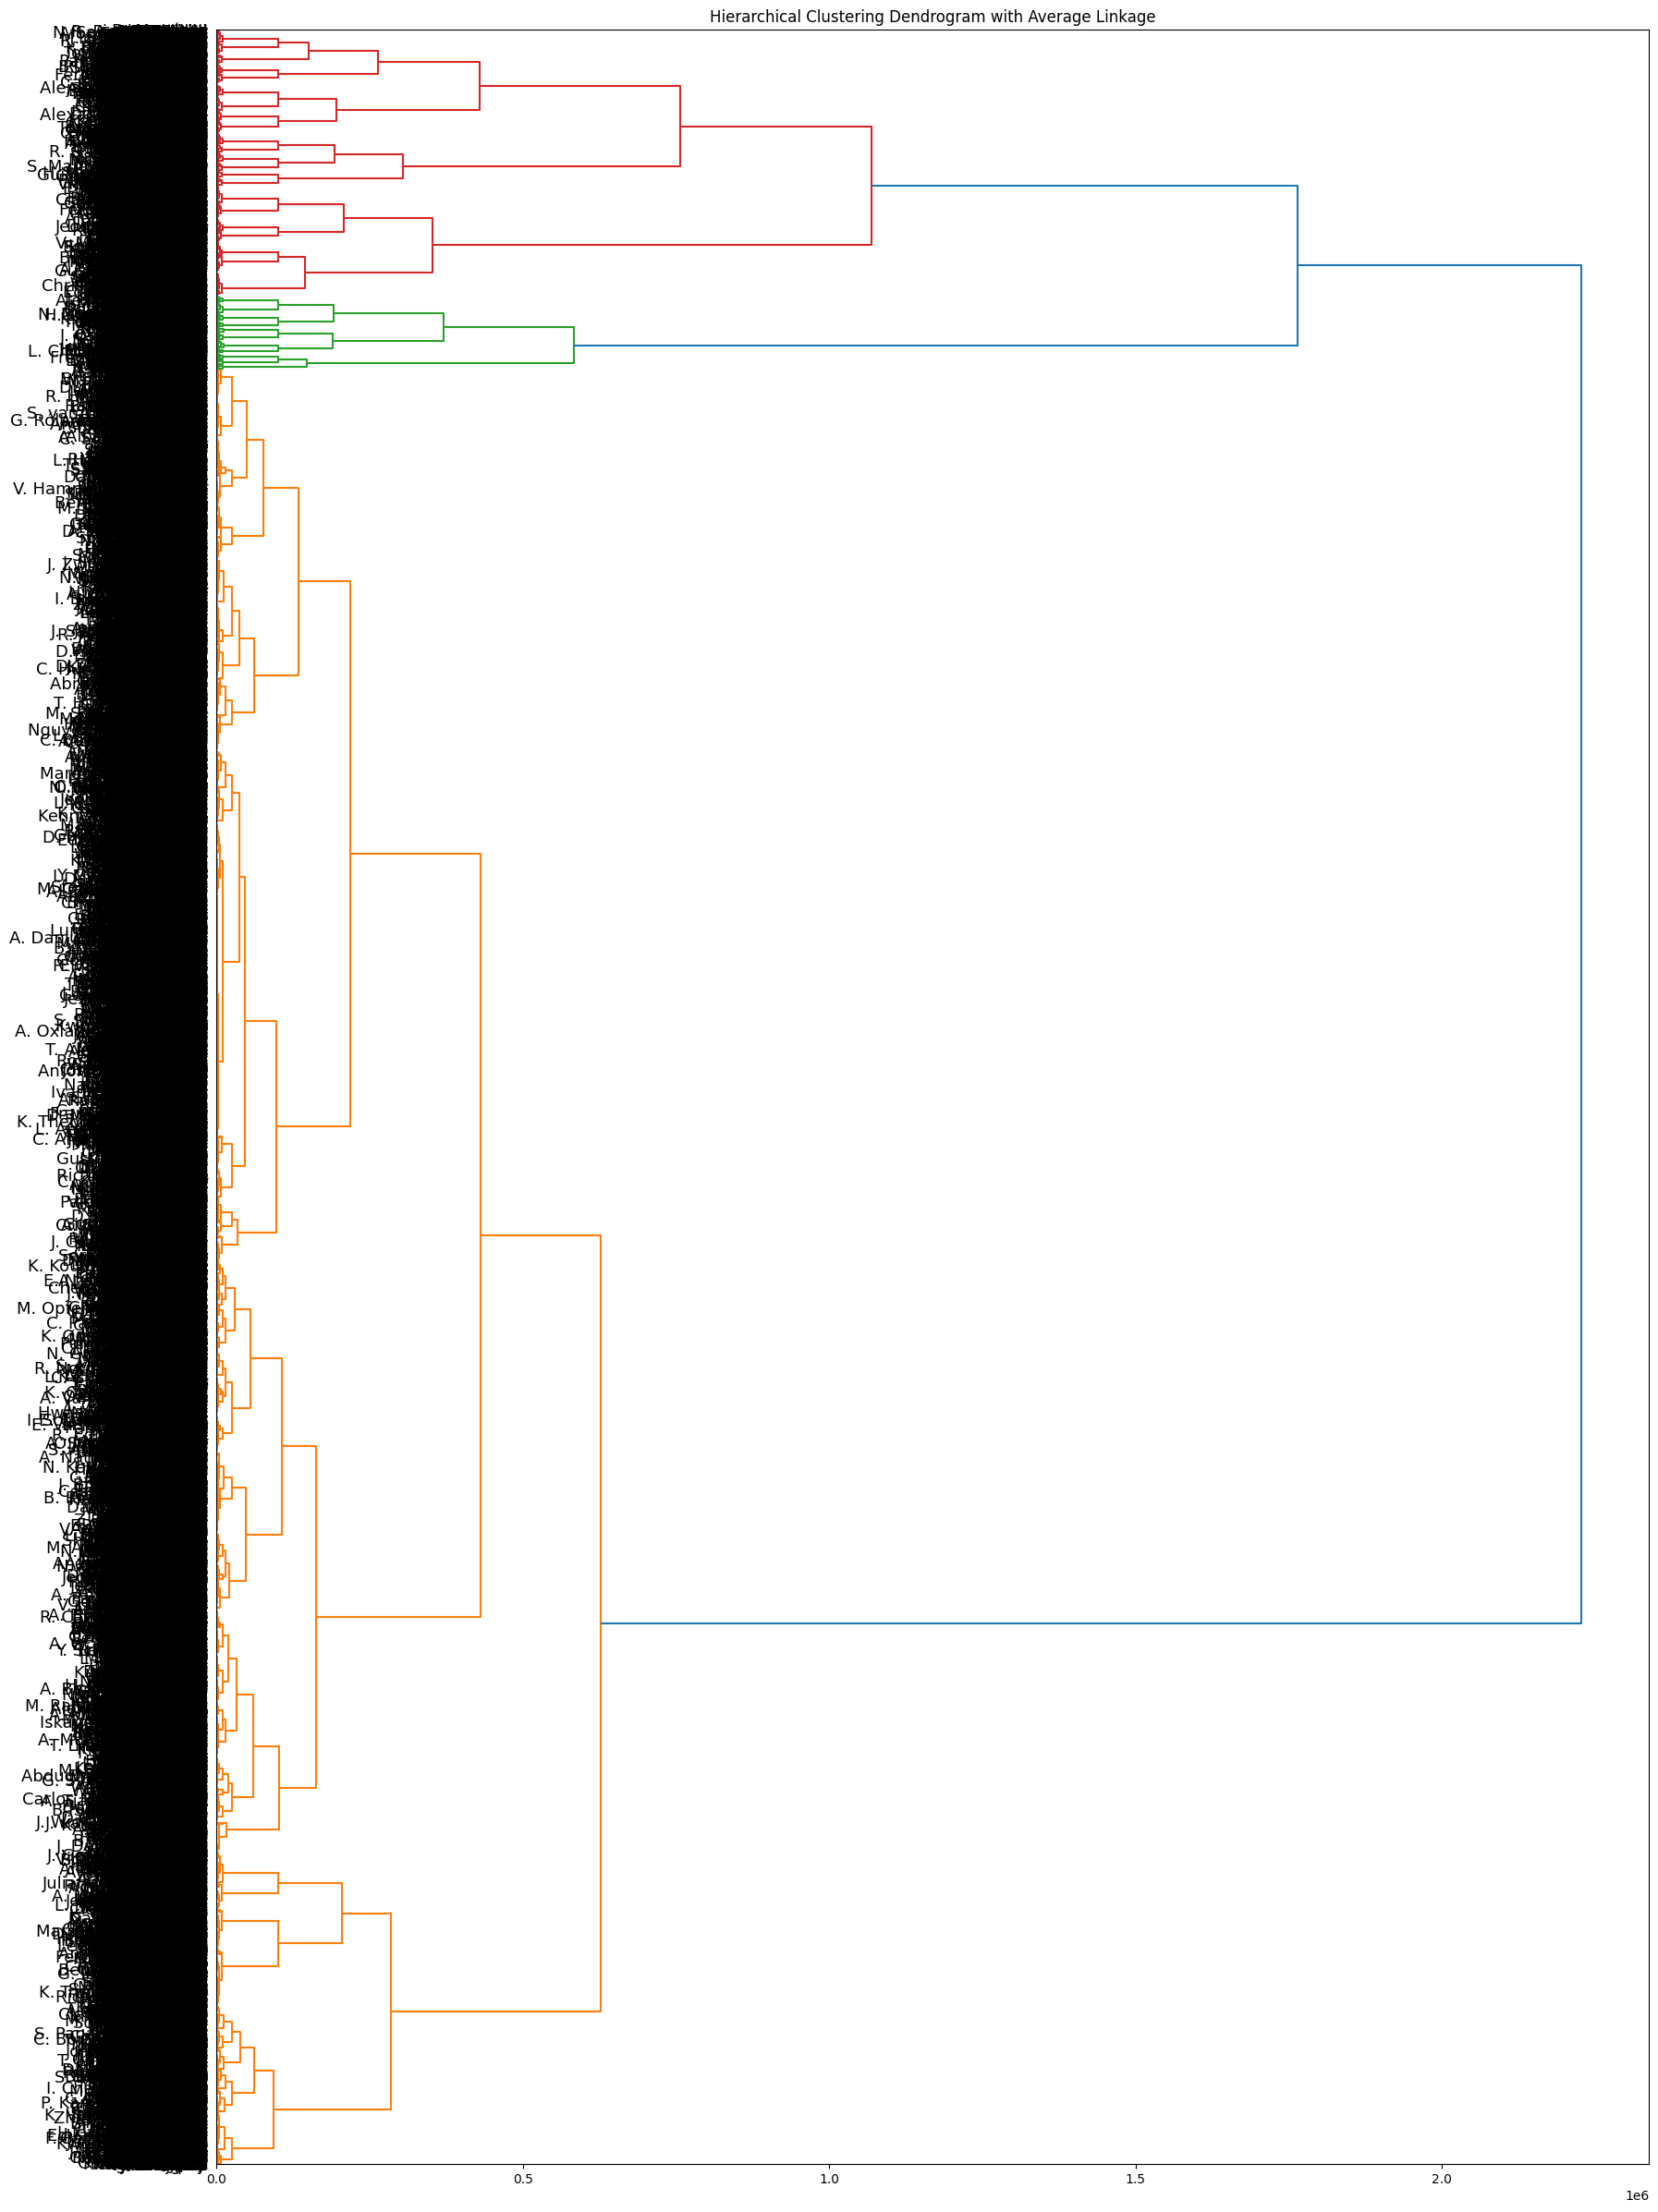

In [115]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20,30))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
dendogram = sch.dendrogram(sch.linkage(final_data2, method="average"), labels = names, leaf_font_size = 13, orientation='right')

#### Centroid Linkage

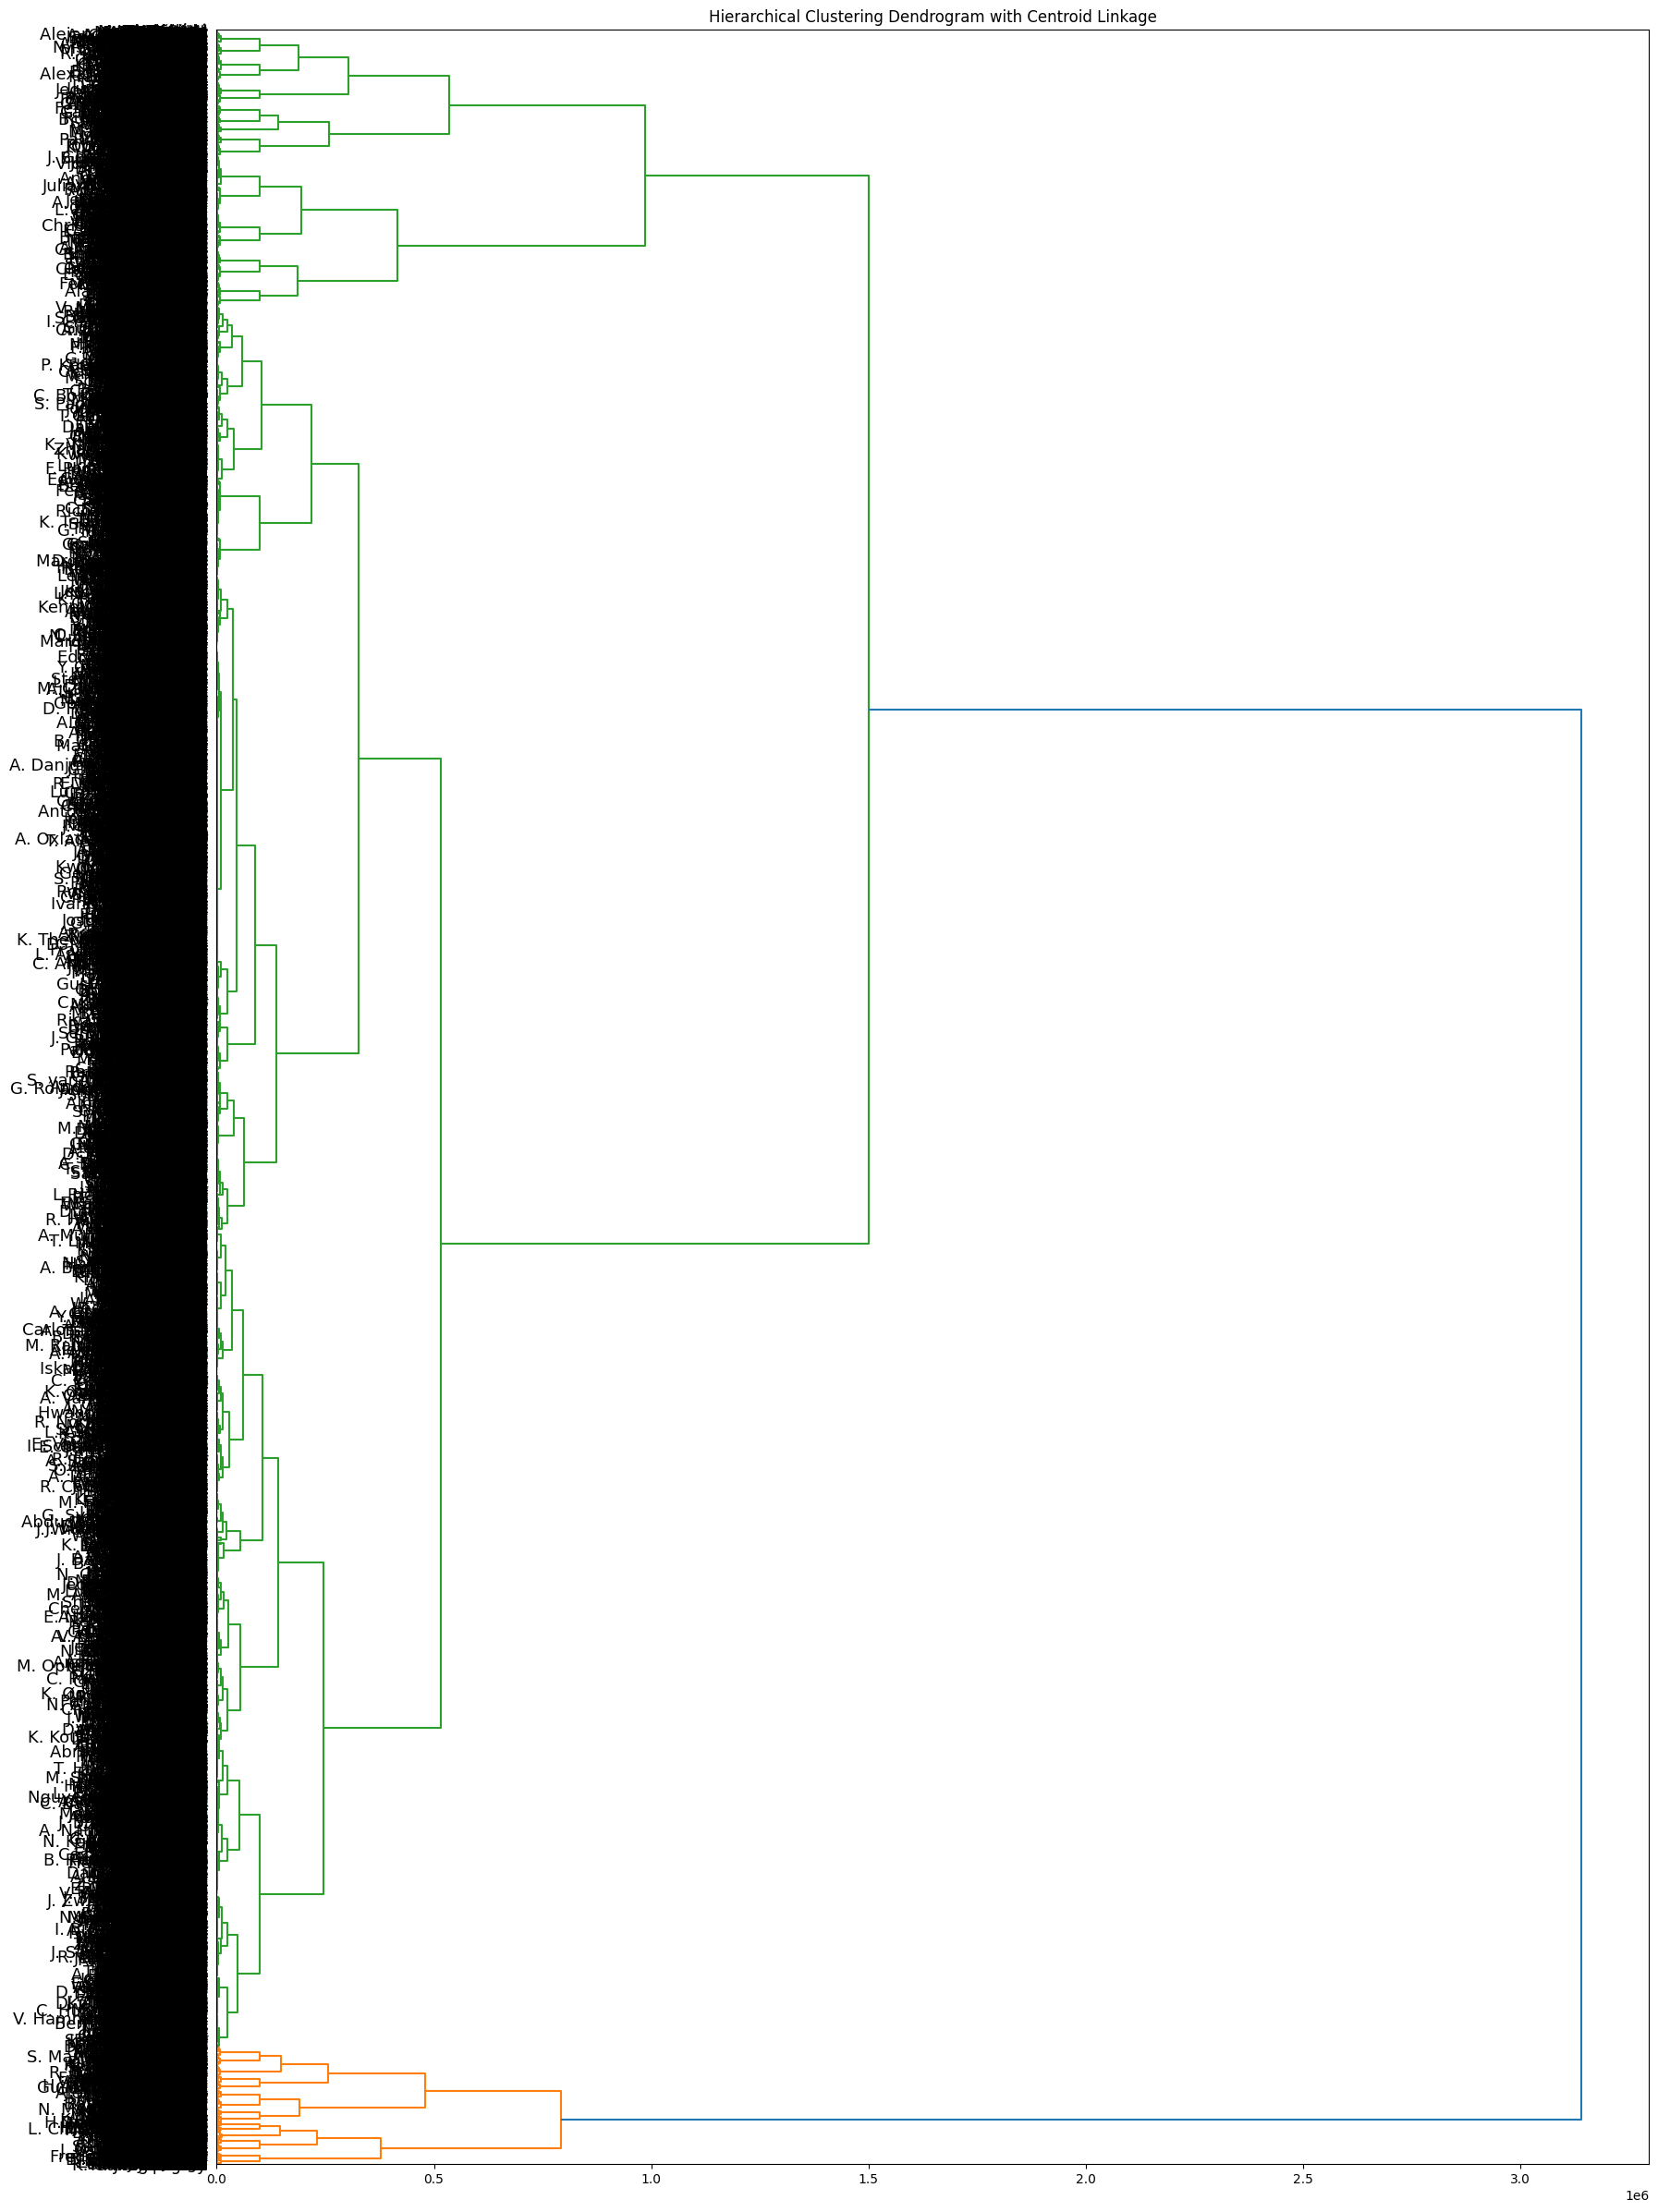

In [116]:
plt.figure(figsize=(20,30))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')
dendogram = sch.dendrogram(sch.linkage(final_data2, method="centroid"), labels = names, leaf_font_size = 13, orientation='right')

#### Complete Linkage

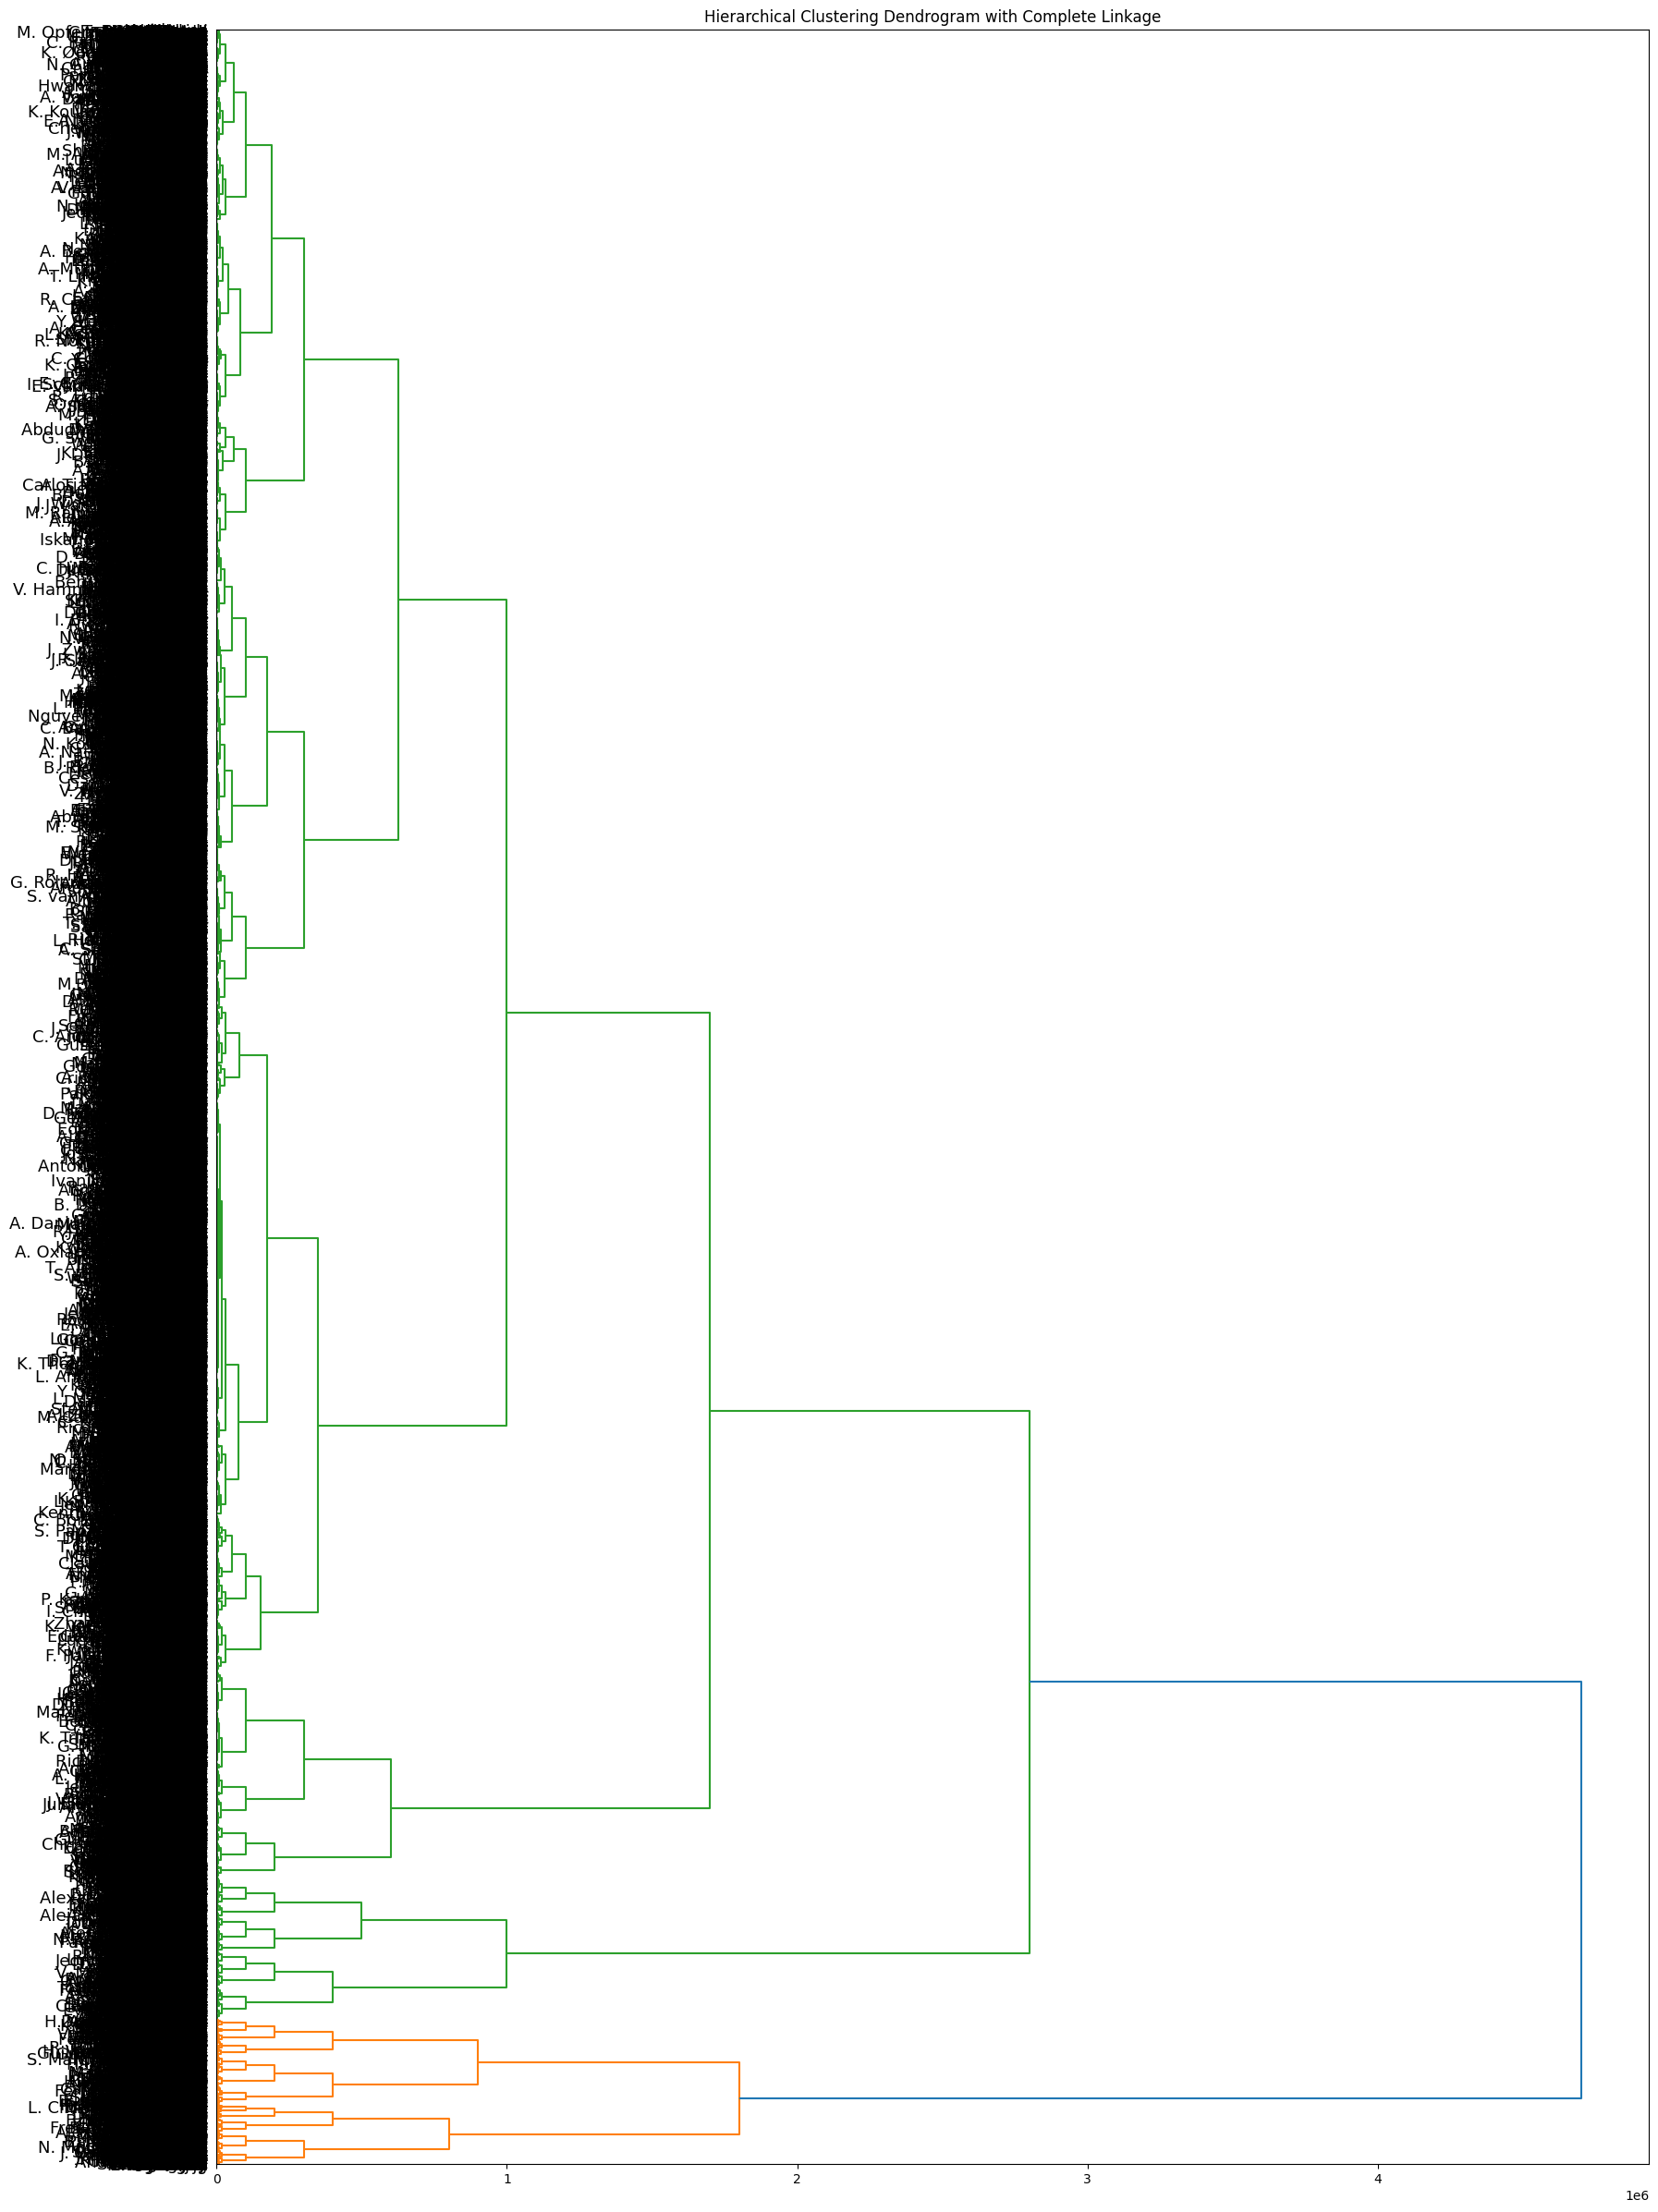

In [117]:
plt.figure(figsize = (20,30))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
dendogram = sch.dendrogram(sch.linkage(final_data2, method="complete"), labels = names, leaf_font_size = 13, orientation='right')

In [118]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit_predict(X)
labels1 = agg_clustering.labels_


In [119]:
cluster_counts = pd.Series(labels1).value_counts()

cluster_counts

0    16097
1     2181
dtype: int64

In [120]:
final_data2 = final_data2.drop('Cluster', axis = 1)
final_data2['Cluster_H'] = labels1


#### player who has greater potential rating

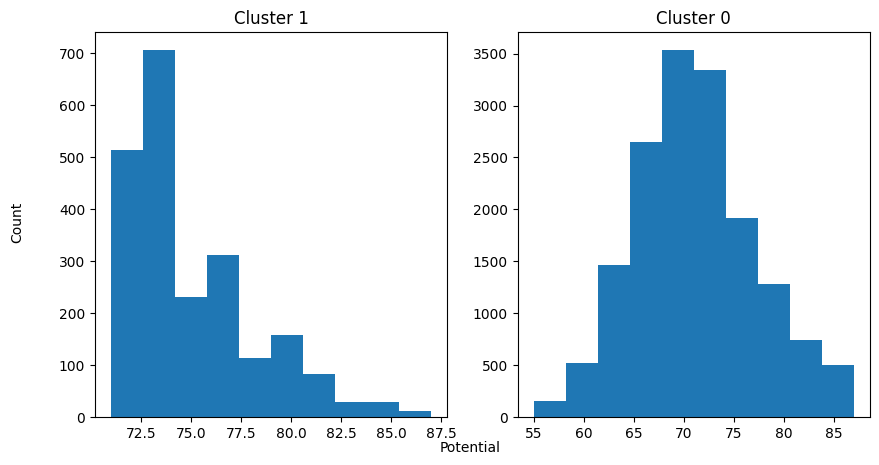

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].hist(final_data2[final_data2['Cluster_H']==1]['potential'], bins = 10)
axs[0].set_title('Cluster 1')

axs[1].hist(final_data2[final_data2['Cluster_H']==0]['potential'], bins = 10)
axs[1].set_title('Cluster 0')

fig.text(0.5, 0.04, 'Potential', ha = 'center')
fig.text(0.04, 0.5, 'Count', va = 'center', rotation = 'vertical')

plt.show()

#### player who has greater overall rating

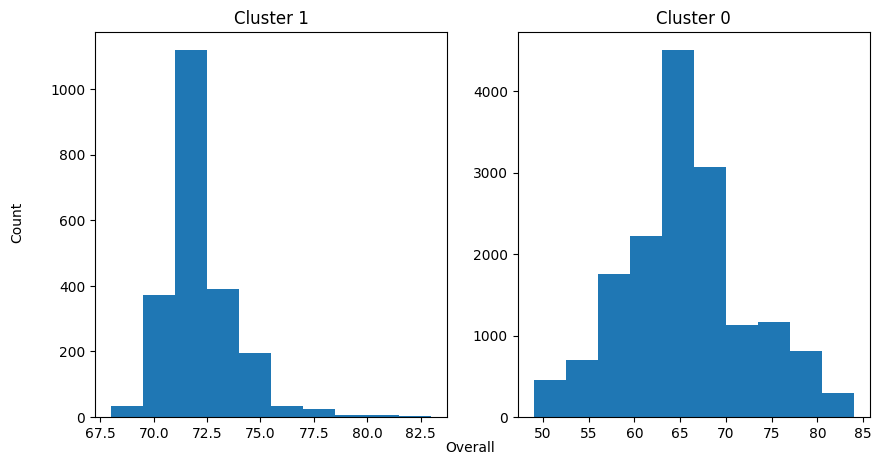

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].hist(final_data2[final_data2['Cluster_H']==1]['overall'], bins = 10)
axs[0].set_title('Cluster 1')

axs[1].hist(final_data2[final_data2['Cluster_H']==0]['overall'], bins = 10)
axs[1].set_title('Cluster 0')

fig.text(0.5, 0.04, 'Overall', ha = 'center')
fig.text(0.04, 0.5, 'Count', va= 'center', rotation = 'vertical')

plt.show()

### Features that are highly correlated with clusters

In [123]:
final_data2.corr()['Cluster_H'][:-2].sort_values()

team_position_RES          -0.095297
work_rate_Medium/Medium    -0.094591
jersey_number              -0.076033
team_position_SUB          -0.058286
nationality_England        -0.049778
                              ...   
overall                     0.316822
wage_eur                    0.369988
value_eur                   0.872354
international_reputation         NaN
weak_foot                        NaN
Name: Cluster_H, Length: 1584, dtype: float64

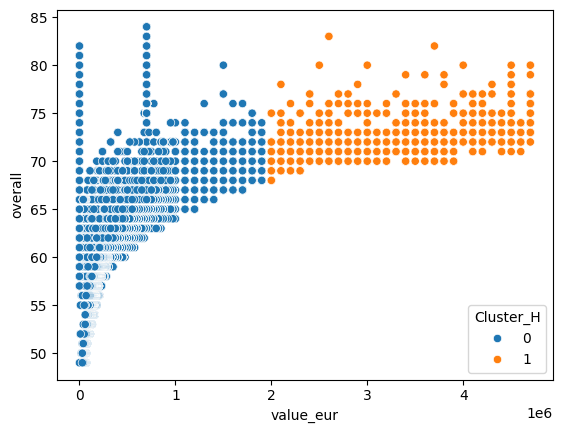

In [124]:
sns.scatterplot(data = final_data2, x = 'value_eur', y='overall', hue = 'Cluster_H');

Here we can see that both K Means Clustering and Hierarchical giving us almost similar results

## Task3:- Explore the data and attempt all the below asked questions in a step by step manner:

### 1. Prepare a rank ordered list of top 10 countries with most players. Which Countries are producing the most footballers that play at this level?

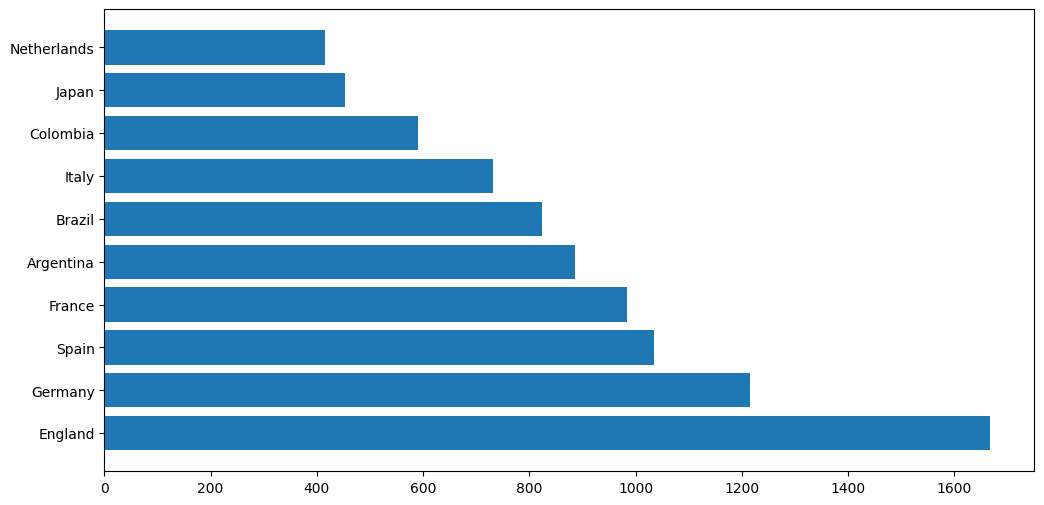

In [125]:
plt.figure(figsize = (12,6))
plt.barh(data['nationality'].value_counts()[:10].keys(), data['nationality'].value_counts()[:10]);

From graph we get **'England' and 'Germany' are producing most footballers**

### 2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

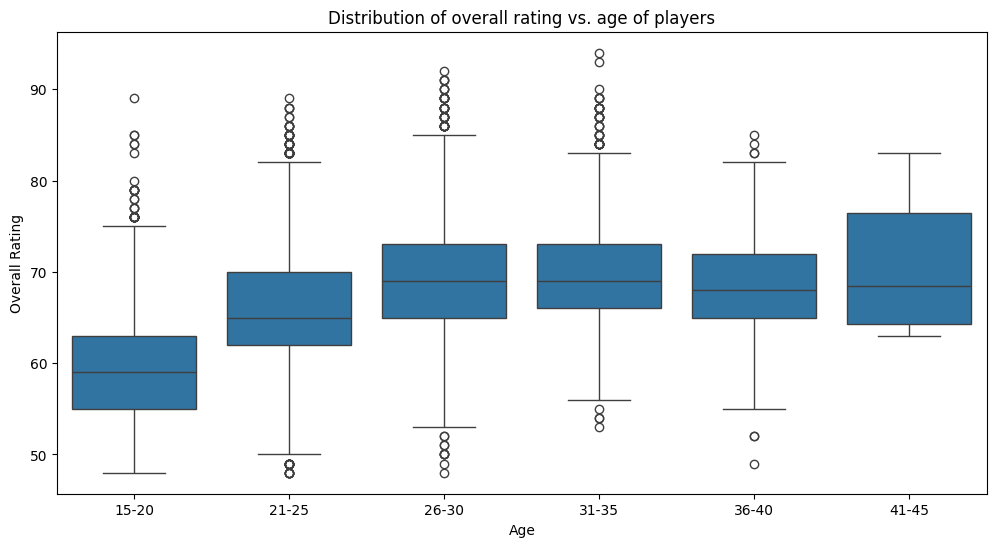

In [126]:
fifa_data = data.copy()
fifa_data = fifa_data.sort_values(by = 'age')
fifa_data['Age_Group'] = pd.cut(fifa_data['age'], bins = [15,20,25,30,35,40,45], labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])

plt.figure(figsize = (12,6))
sns.boxplot(x= fifa_data['Age_Group'], y = fifa_data['overall'])
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Distribution of overall rating vs. age of players')
plt.show()


we can conclude that, after age of **30-35 years of overall rating, player stops improving**

### Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

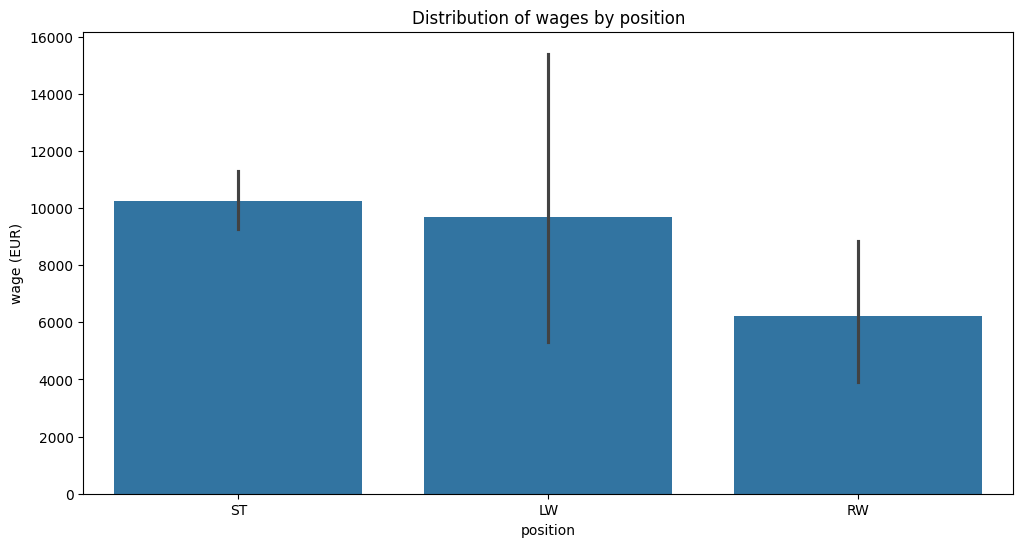

In [127]:
plt.figure(figsize = (12,6))

forwards_df = fifa_data[(fifa_data['player_positions'] == 'LW') | (fifa_data['player_positions'] == 'RW') | (fifa_data['player_positions'] == 'ST')]

sns.barplot(x = 'player_positions', y = 'wage_eur', data = forwards_df)
plt.xlabel('position')
plt.ylabel('wage (EUR)')
plt.title('Distribution of wages by position')
plt.show()

from the barplot above we can summarize that the **striker players are getting paid the most**

## Model Comparison Report

For our fifa20 dataset we have attempted to cluster similar types of players using KMeans clustering and hierarchical clustering. In both instances we have seen similar results.

So we are suggesting KMeans Clustering with number of cluster = 2, is best for clustering this dataset.

## Report on Challenges faced
The challenges we faced during this project are as follows:

The fifa20 dataset is a huge dataset with 104 columns as such we needed to handle the features a bit differently; we splitted our dataset into numerical and categorical features and then we handled each feature.

The dataset contained lots of extreme outliers in some features of the dataset which was giving us incorrect results; we had to handle these outliers by making a separate function and run the function on those features.

In case of scaling the categorical data we used one hot encoding, as a result our features were increased to almost 1585. We had to do PCA to decrease these features into 732

## Conclusion

The fifa20 dataset is a challenging dataset where one has to do unsupervised machine learning; meaning there were no target or label in the dataset. Two main takeaways of this project is: clustering the players based on their features and finding the most important features to group these players on. As it is an unsupervised machine learning one has to do a lot of assumptions. In our case we also had to make a lot of assumptions but all of our assumptions were backed by facts and numbers. As we have seen that in order to cluster the players using KMeans; we selected number of cluster equal to 2, and this cluster number was selected by best score of elbow method, silhouettee score and Davis Bouldin score.

Using the clusters we have divided our dataset into 2 cluster and we assumed that players in cluster 1 were more likely to have greater potential to get picked to build an ideal team. We also found that the players' value in euro is highly correlated with these clusters; so we grouped players that have greater value in euro and overall rating and based on their positions we tried to form a team which can be formed with the minimum budget.

**Our overall suggestion for clustering this dataset is using KMeans Clustering with number of cluster = 2**

**To build an ideal team the minimum budget should be 46,400,000**